Apple_stock_Forecast Machine Learning Project

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV data as pandas DataFrame

In [103]:
df = pd.read_csv(r"C:\Users\vimal\OneDrive\Desktop\Apple stock Forecast\NoteBook\data\AAPL.csv")
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

In [104]:
df

Date        Open        High         Low       Close   Adj Close  \
0     2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
1     2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2     2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
3     2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
4     2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...          ...         ...         ...         ...         ...         ...   
2006  2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2007  2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2008  2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2009  2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2010  2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
0     75555200  
1     65005500  
2     67817400  
3     79573200  
4     98506100  
...        ...  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600  

[2011 rows x 7 columns]

In [105]:
#Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [106]:
#Descrptive summary of the dataset
df.describe()

Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08

In [107]:
df.shape

(2011, 7)

In [108]:
##List down all the columns names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [109]:
df["Close"].unique()

array([ 58.747143,  59.062859,  59.718571, ..., 289.910004, 289.799988,
       291.519989])

In [110]:
df["Close"].value_counts()

Close
99.620003     3
126.599998    3
100.750000    3
97.339996     3
172.500000    3
             ..
90.360001     1
90.279999     1
90.830002     1
90.910004     1
291.519989    1
Name: count, Length: 1912, dtype: int64

In [111]:
## Missing values in the dataset

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [112]:
##Duplicated records
df[df.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

In [113]:
df.duplicated().sum()

0

In [114]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# **Date is columns its reflect as object type. however, it should be date and time data type so that we need to change the data type before doing the EDA part**. 

# **Data type conversion**

In [115]:
df["Date"]

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

In [116]:
df["Date"].unique

<bound method Series.unique of 0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object>

In [117]:
df["Date"].value_counts()

Date
2012-01-03    1
2017-04-26    1
2017-05-15    1
2017-05-12    1
2017-05-11    1
             ..
2014-08-26    1
2014-08-25    1
2014-08-22    1
2014-08-21    1
2019-12-30    1
Name: count, Length: 2011, dtype: int64

In [118]:
# Convert the date column 
df["Date"] =pd.to_datetime(df["Date"])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# Drop columns

We need to get rid of all the uneccesary columns or else it will be very complex data.

In [119]:
df.drop(columns=["Adj Close"], inplace=True)

In [120]:
df

Date        Open        High         Low       Close    Volume
0    2012-01-03   58.485714   58.928570   58.428570   58.747143  75555200
1    2012-01-04   58.571430   59.240002   58.468571   59.062859  65005500
2    2012-01-05   59.278572   59.792858   58.952858   59.718571  67817400
3    2012-01-06   59.967144   60.392857   59.888573   60.342857  79573200
4    2012-01-09   60.785713   61.107143   60.192856   60.247143  98506100
...         ...         ...         ...         ...         ...       ...
2006 2019-12-23  280.529999  284.250000  280.369995  284.000000  24643000
2007 2019-12-24  284.690002  284.890015  282.920013  284.269989  12119700
2008 2019-12-26  284.820007  289.980011  284.700012  289.910004  23280300
2009 2019-12-27  291.119995  293.970001  288.119995  289.799988  36566500
2010 2019-12-30  289.459991  292.690002  285.220001  291.519989  36028600

[2011 rows x 6 columns]

# Outlier detection

    - There are multiple approaches to detect outliers in the dataset.
        - Histogram
        - Boxplot
        - Descriptive stats for df

In [121]:
df.describe

<bound method NDFrame.describe of            Date        Open        High         Low       Close    Volume
0    2012-01-03   58.485714   58.928570   58.428570   58.747143  75555200
1    2012-01-04   58.571430   59.240002   58.468571   59.062859  65005500
2    2012-01-05   59.278572   59.792858   58.952858   59.718571  67817400
3    2012-01-06   59.967144   60.392857   59.888573   60.342857  79573200
4    2012-01-09   60.785713   61.107143   60.192856   60.247143  98506100
...         ...         ...         ...         ...         ...       ...
2006 2019-12-23  280.529999  284.250000  280.369995  284.000000  24643000
2007 2019-12-24  284.690002  284.890015  282.920013  284.269989  12119700
2008 2019-12-26  284.820007  289.980011  284.700012  289.910004  23280300
2009 2019-12-27  291.119995  293.970001  288.119995  289.799988  36566500
2010 2019-12-30  289.459991  292.690002  285.220001  291.519989  36028600

[2011 rows x 6 columns]>

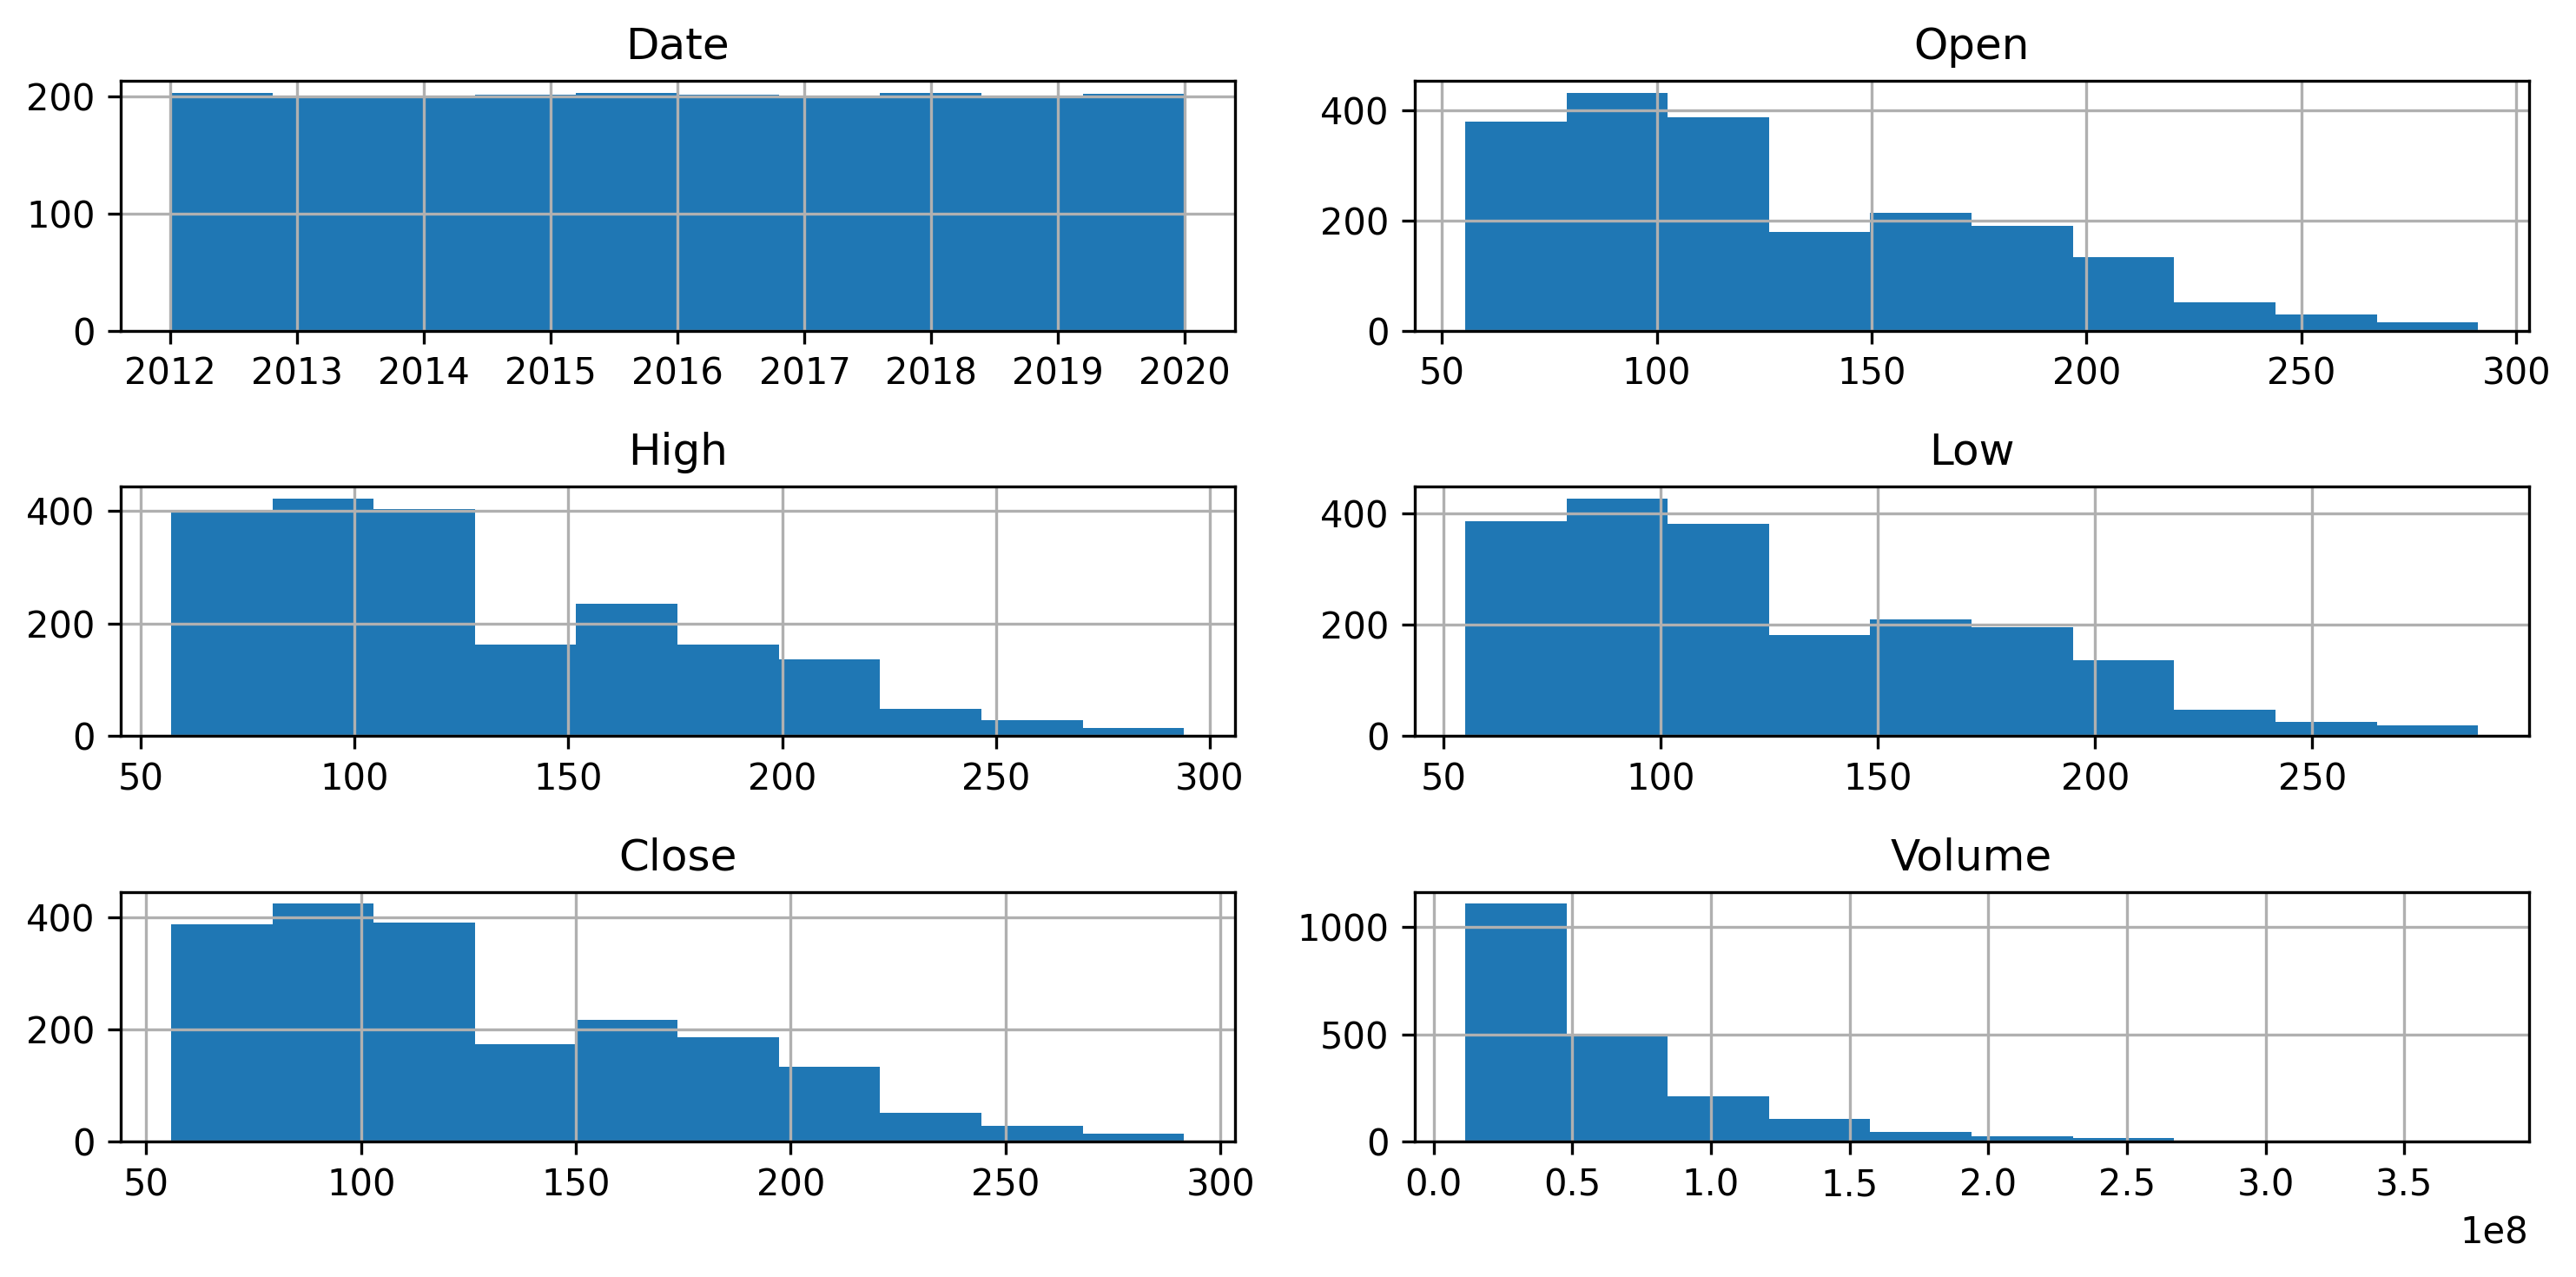

In [122]:
df.hist()
plt.tight_layout()

<Axes: >

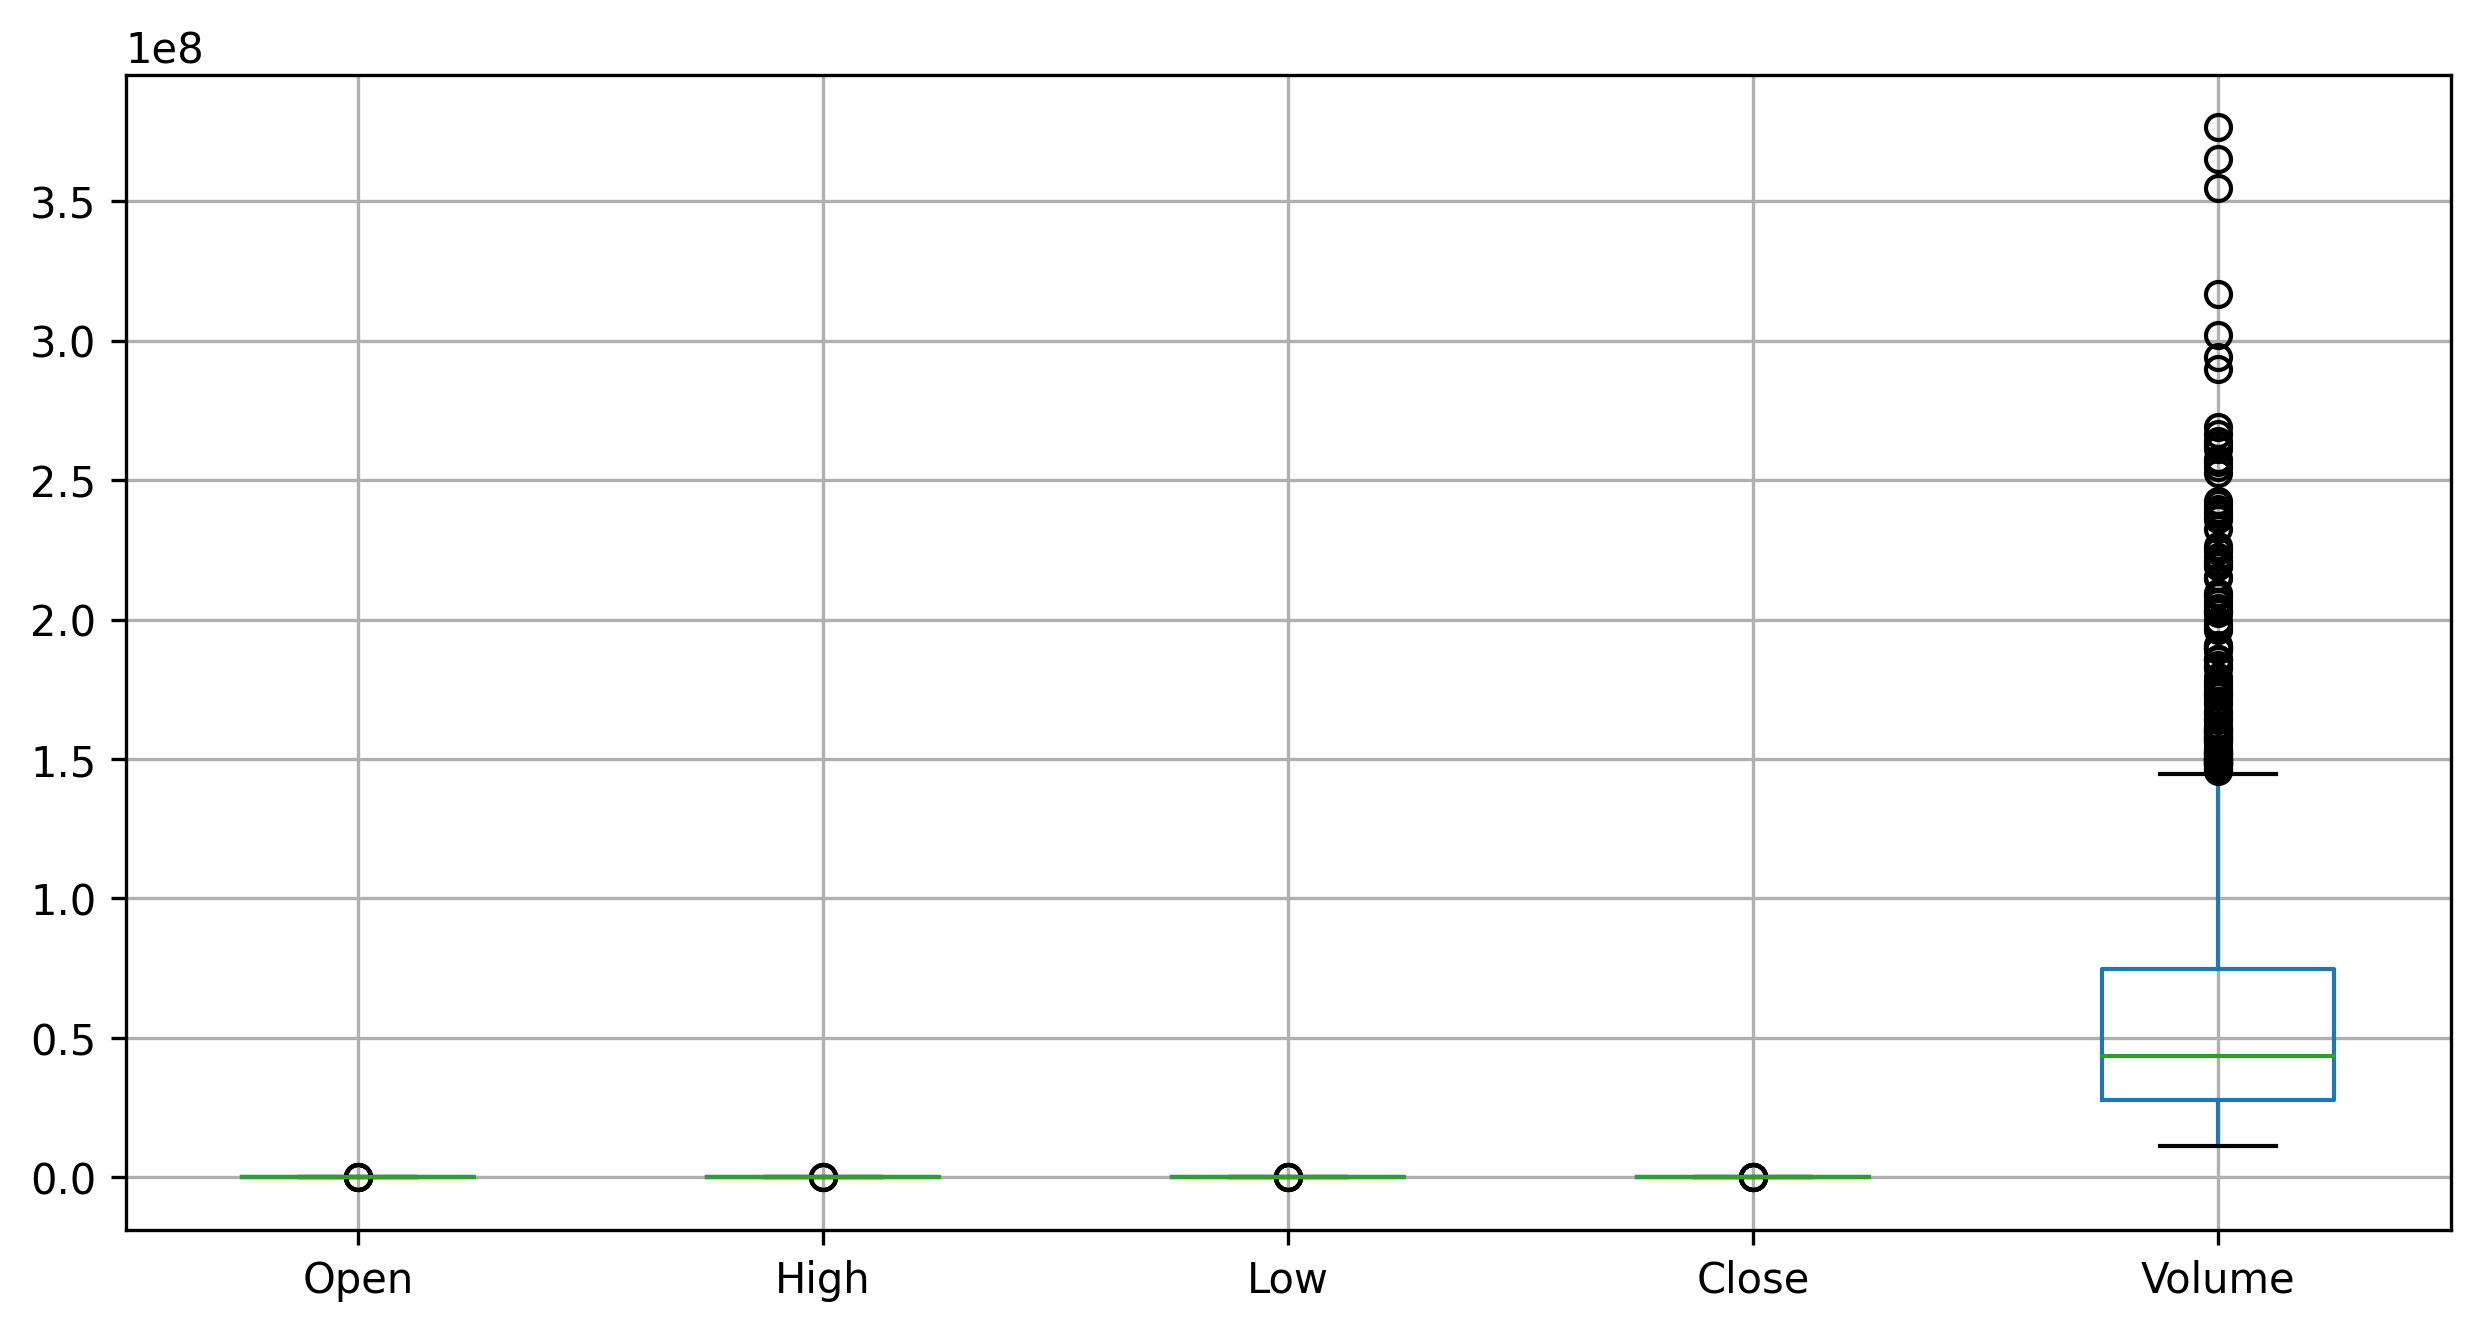

In [123]:
df.boxplot()

# Outlier detection function

In [124]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)

    iqr = q3-q1

    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)

    return lower,upper

In [125]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

<Axes: xlabel='Date'>

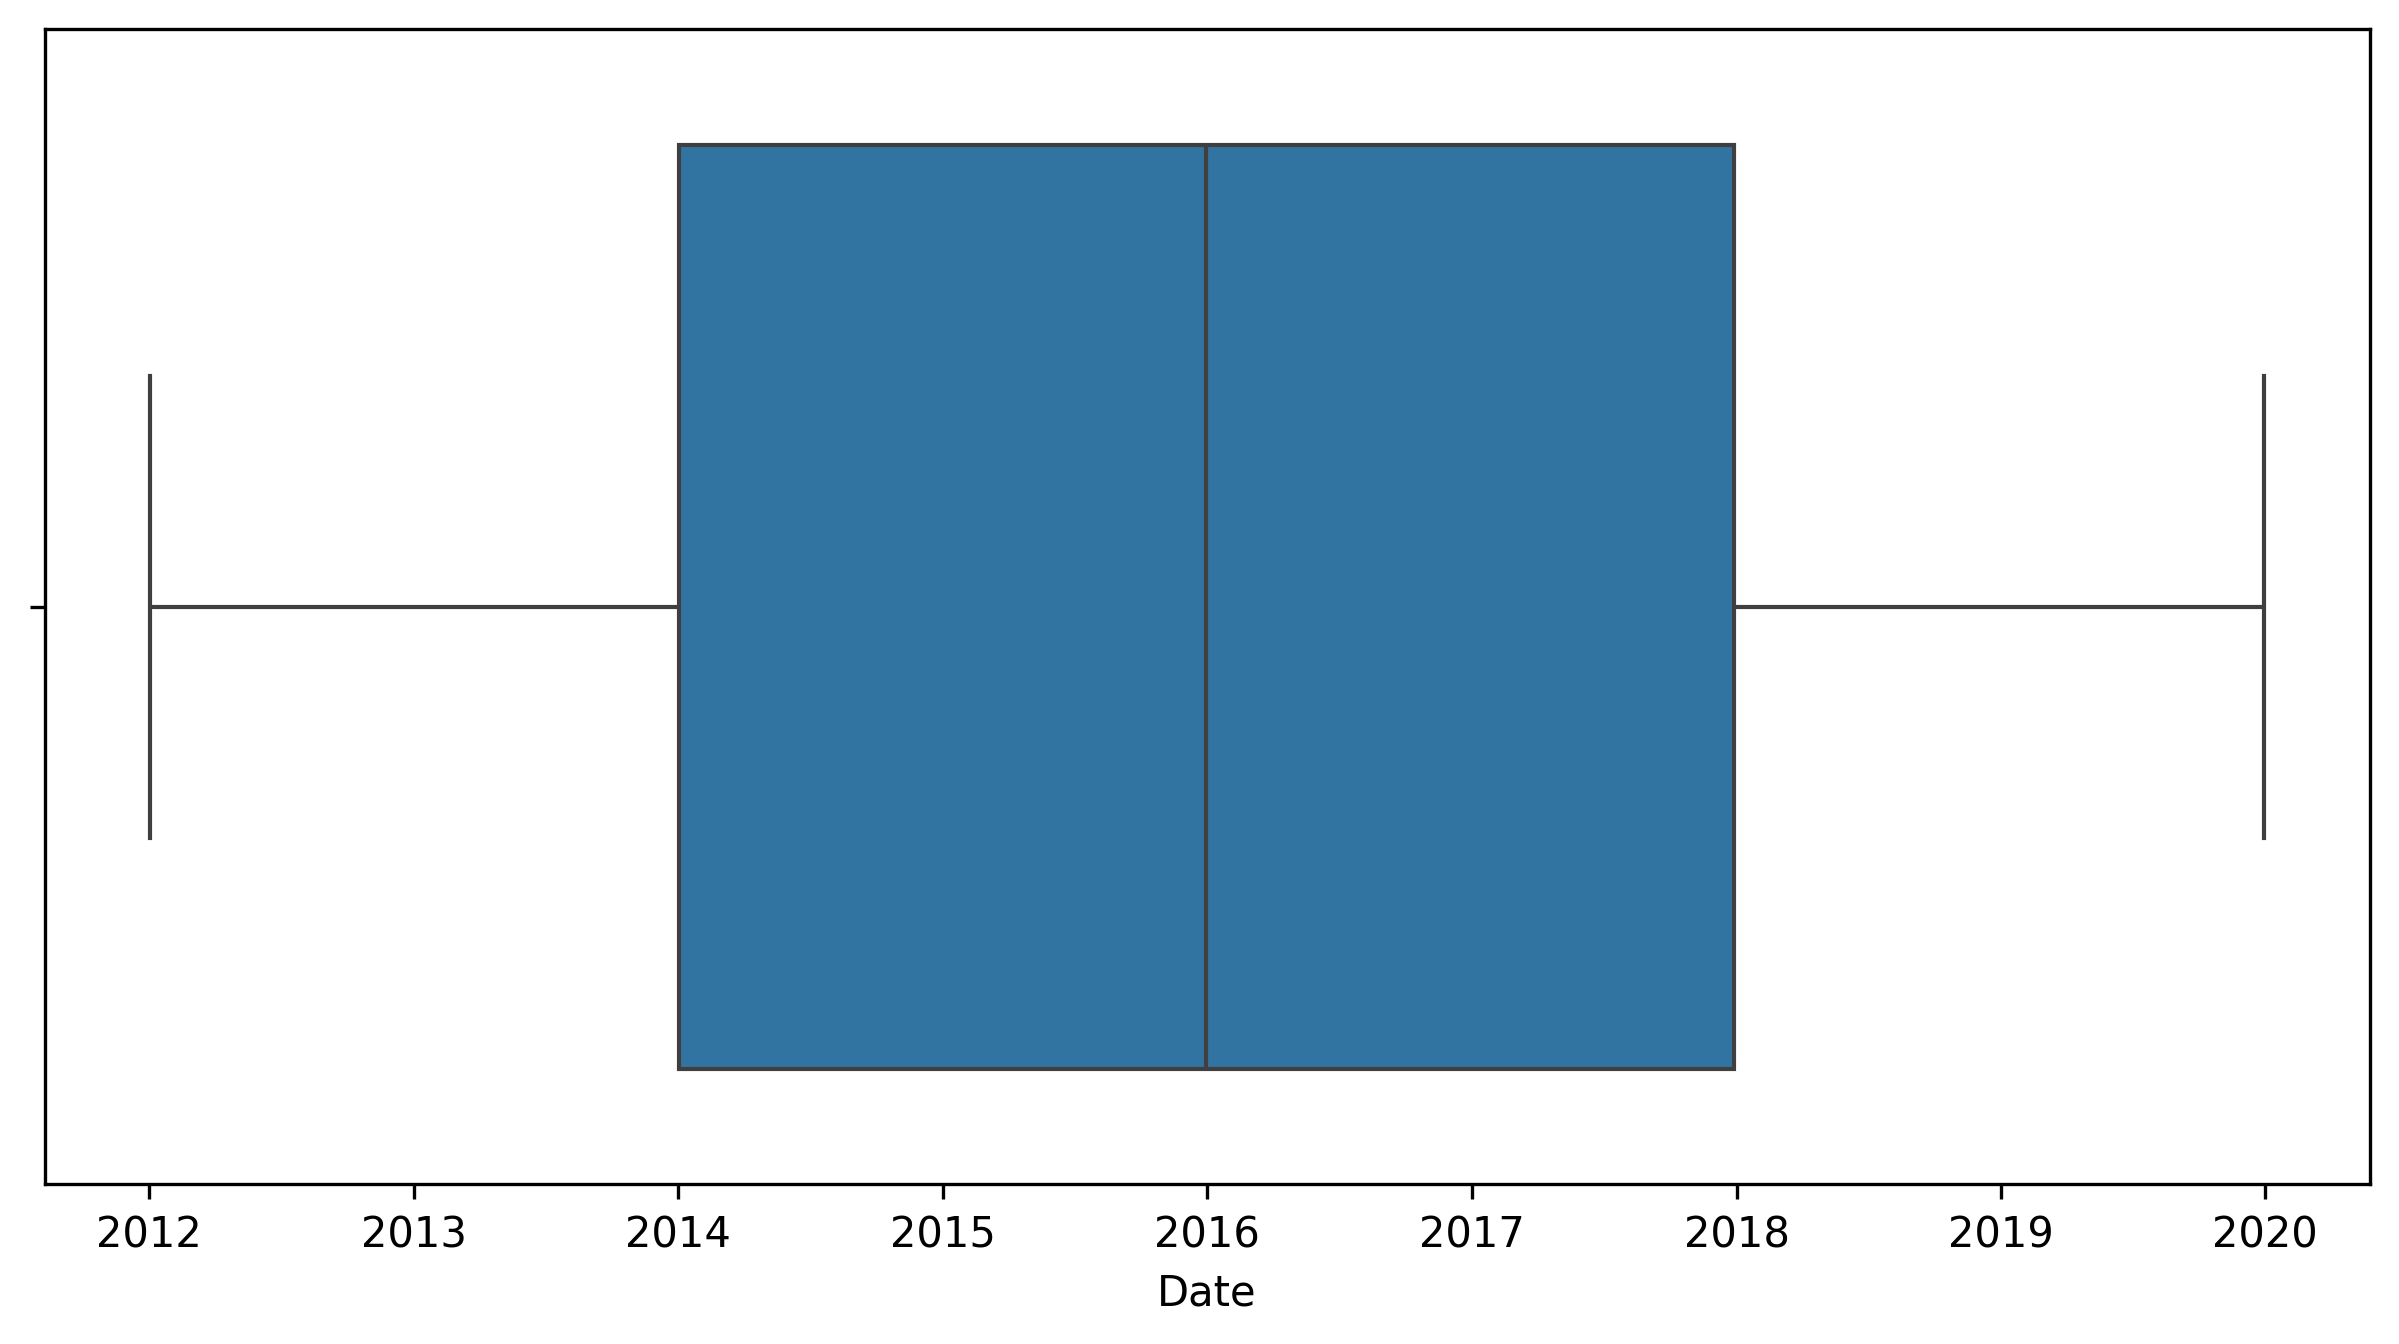

In [126]:
sns.boxplot(x=df["Date"])

Text(0.5, 1.0, 'Before the outlier replaced with upper extreme values')

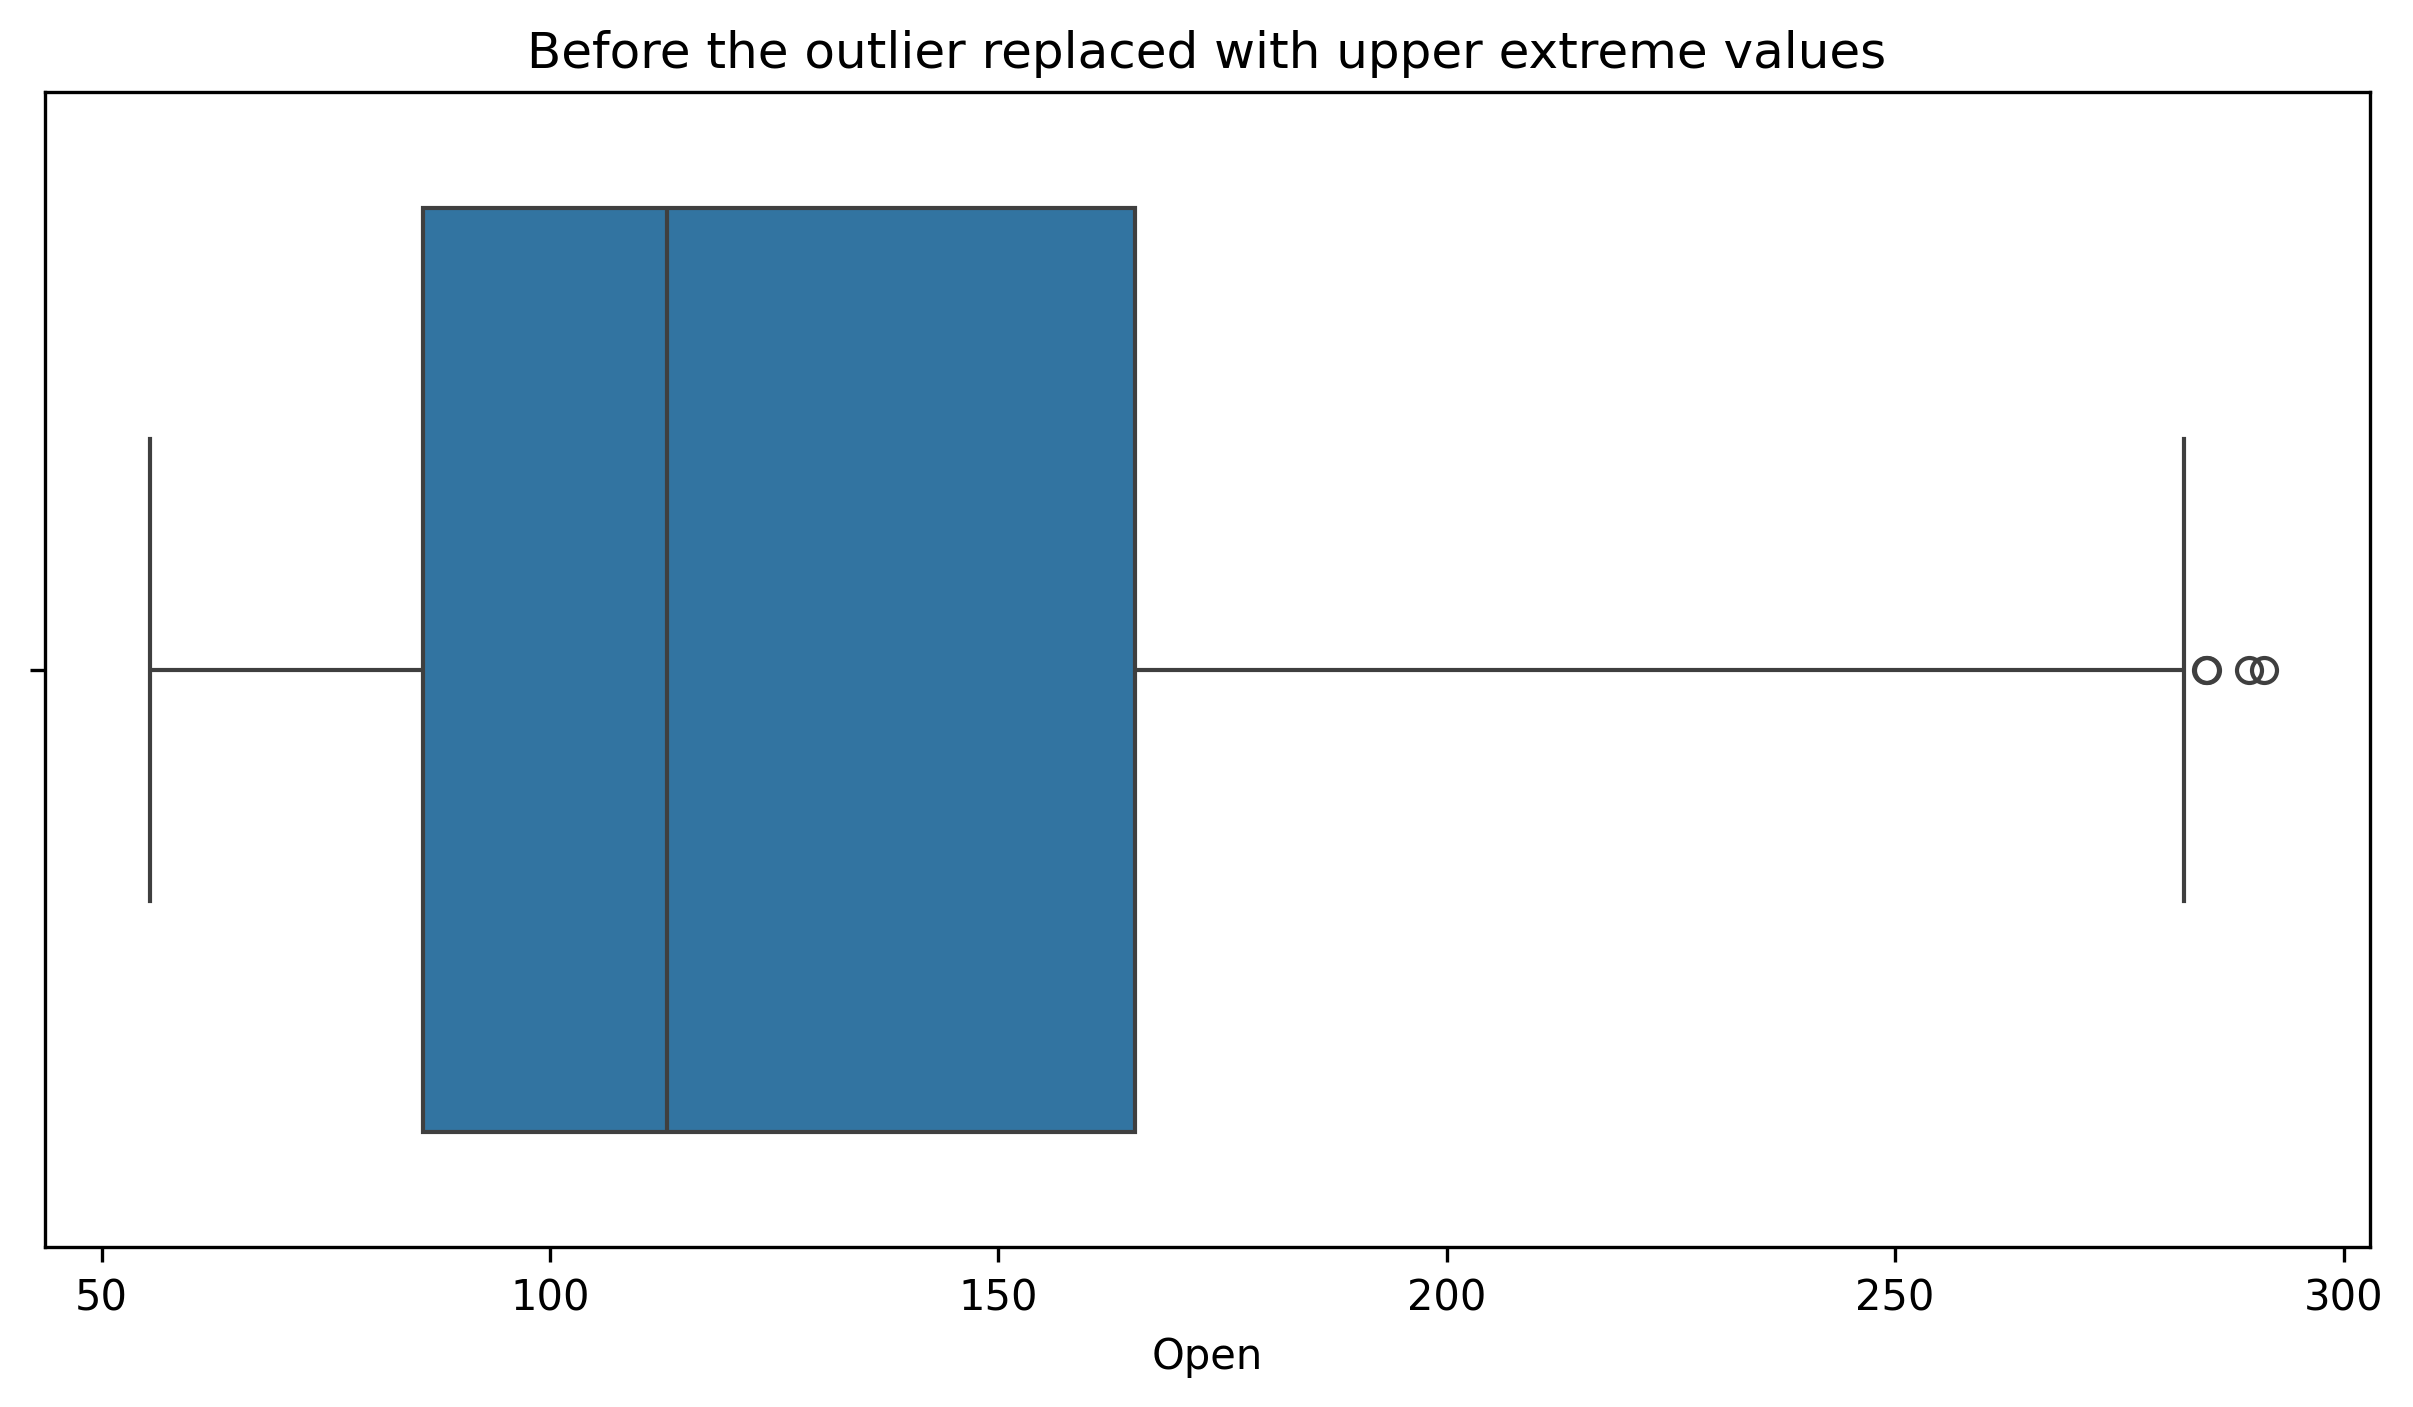

In [127]:
sns.boxplot(x=df["Open"])
plt.xlabel("Open")
plt.title("Before the outlier replaced with upper extreme values")

In [128]:
outlier_detection(df, "Open")

(-33.07785749999999, 284.1507185)

In [129]:
df.loc[df["Open"]>284.1507185, "Open"] = 284.1507185

Text(0.5, 1.0, 'After outliers replaced with the upper extreme values')

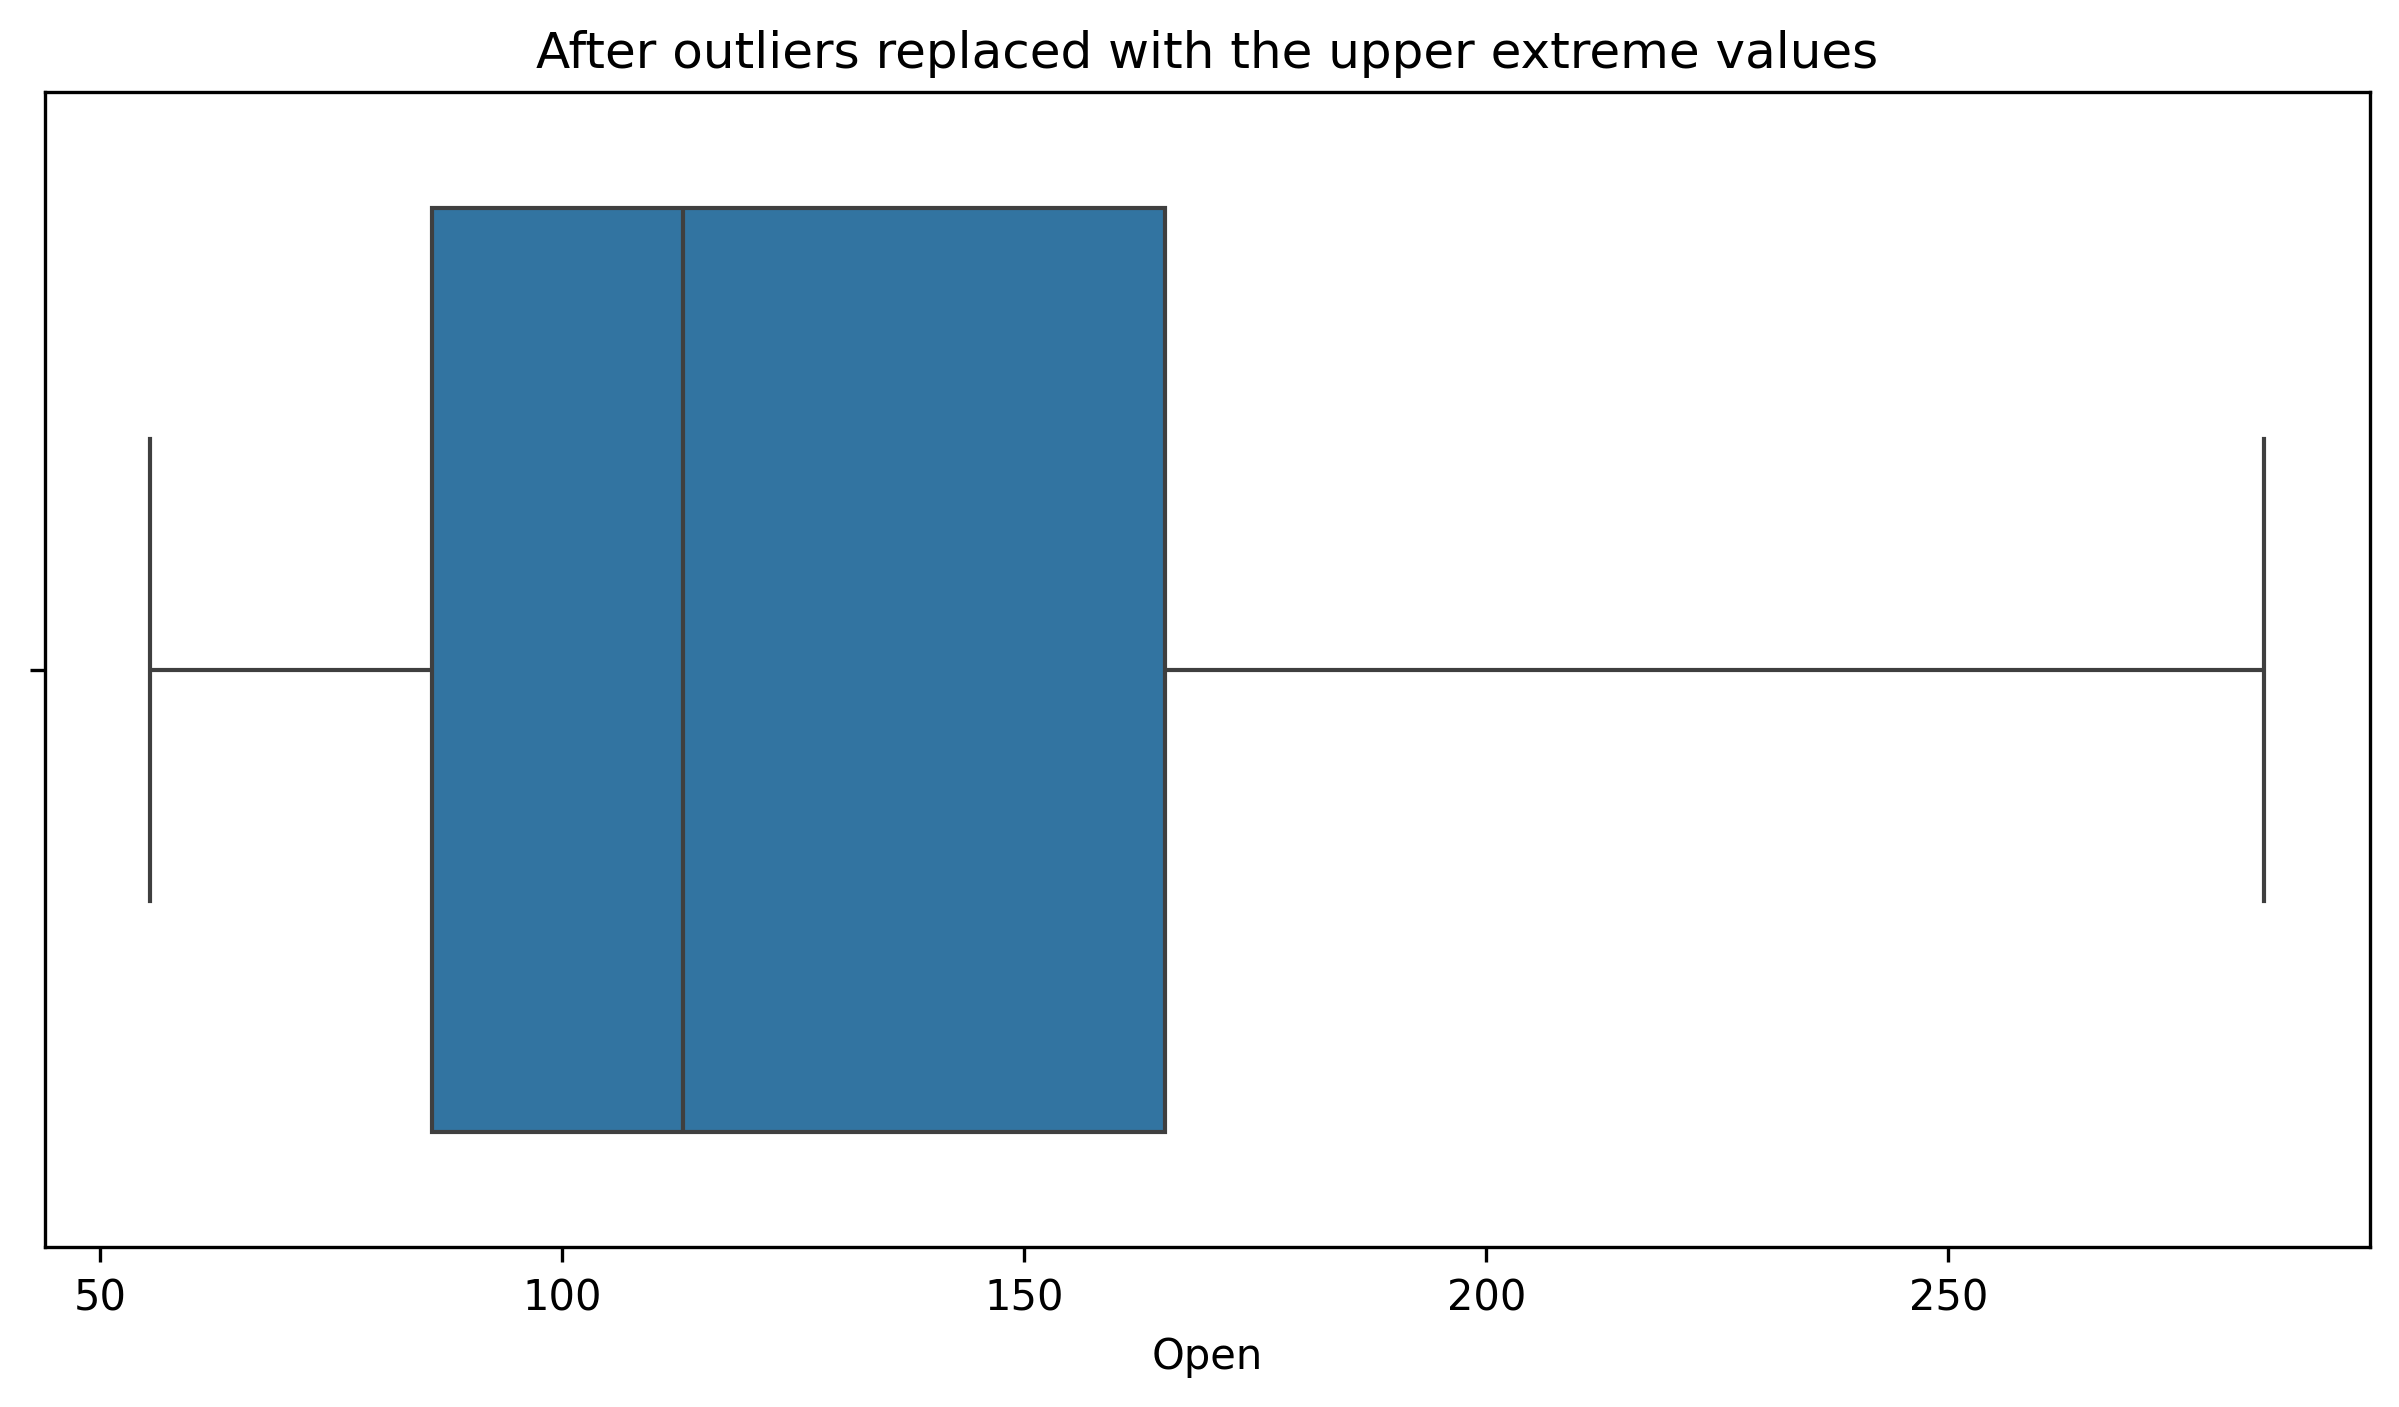

In [130]:
sns.boxplot(x=df["Open"])
plt.xlabel("Open")
plt.title("After outliers replaced with the upper extreme values")

Text(0.5, 1.0, 'Before the outliers replaced with upper extreme values')

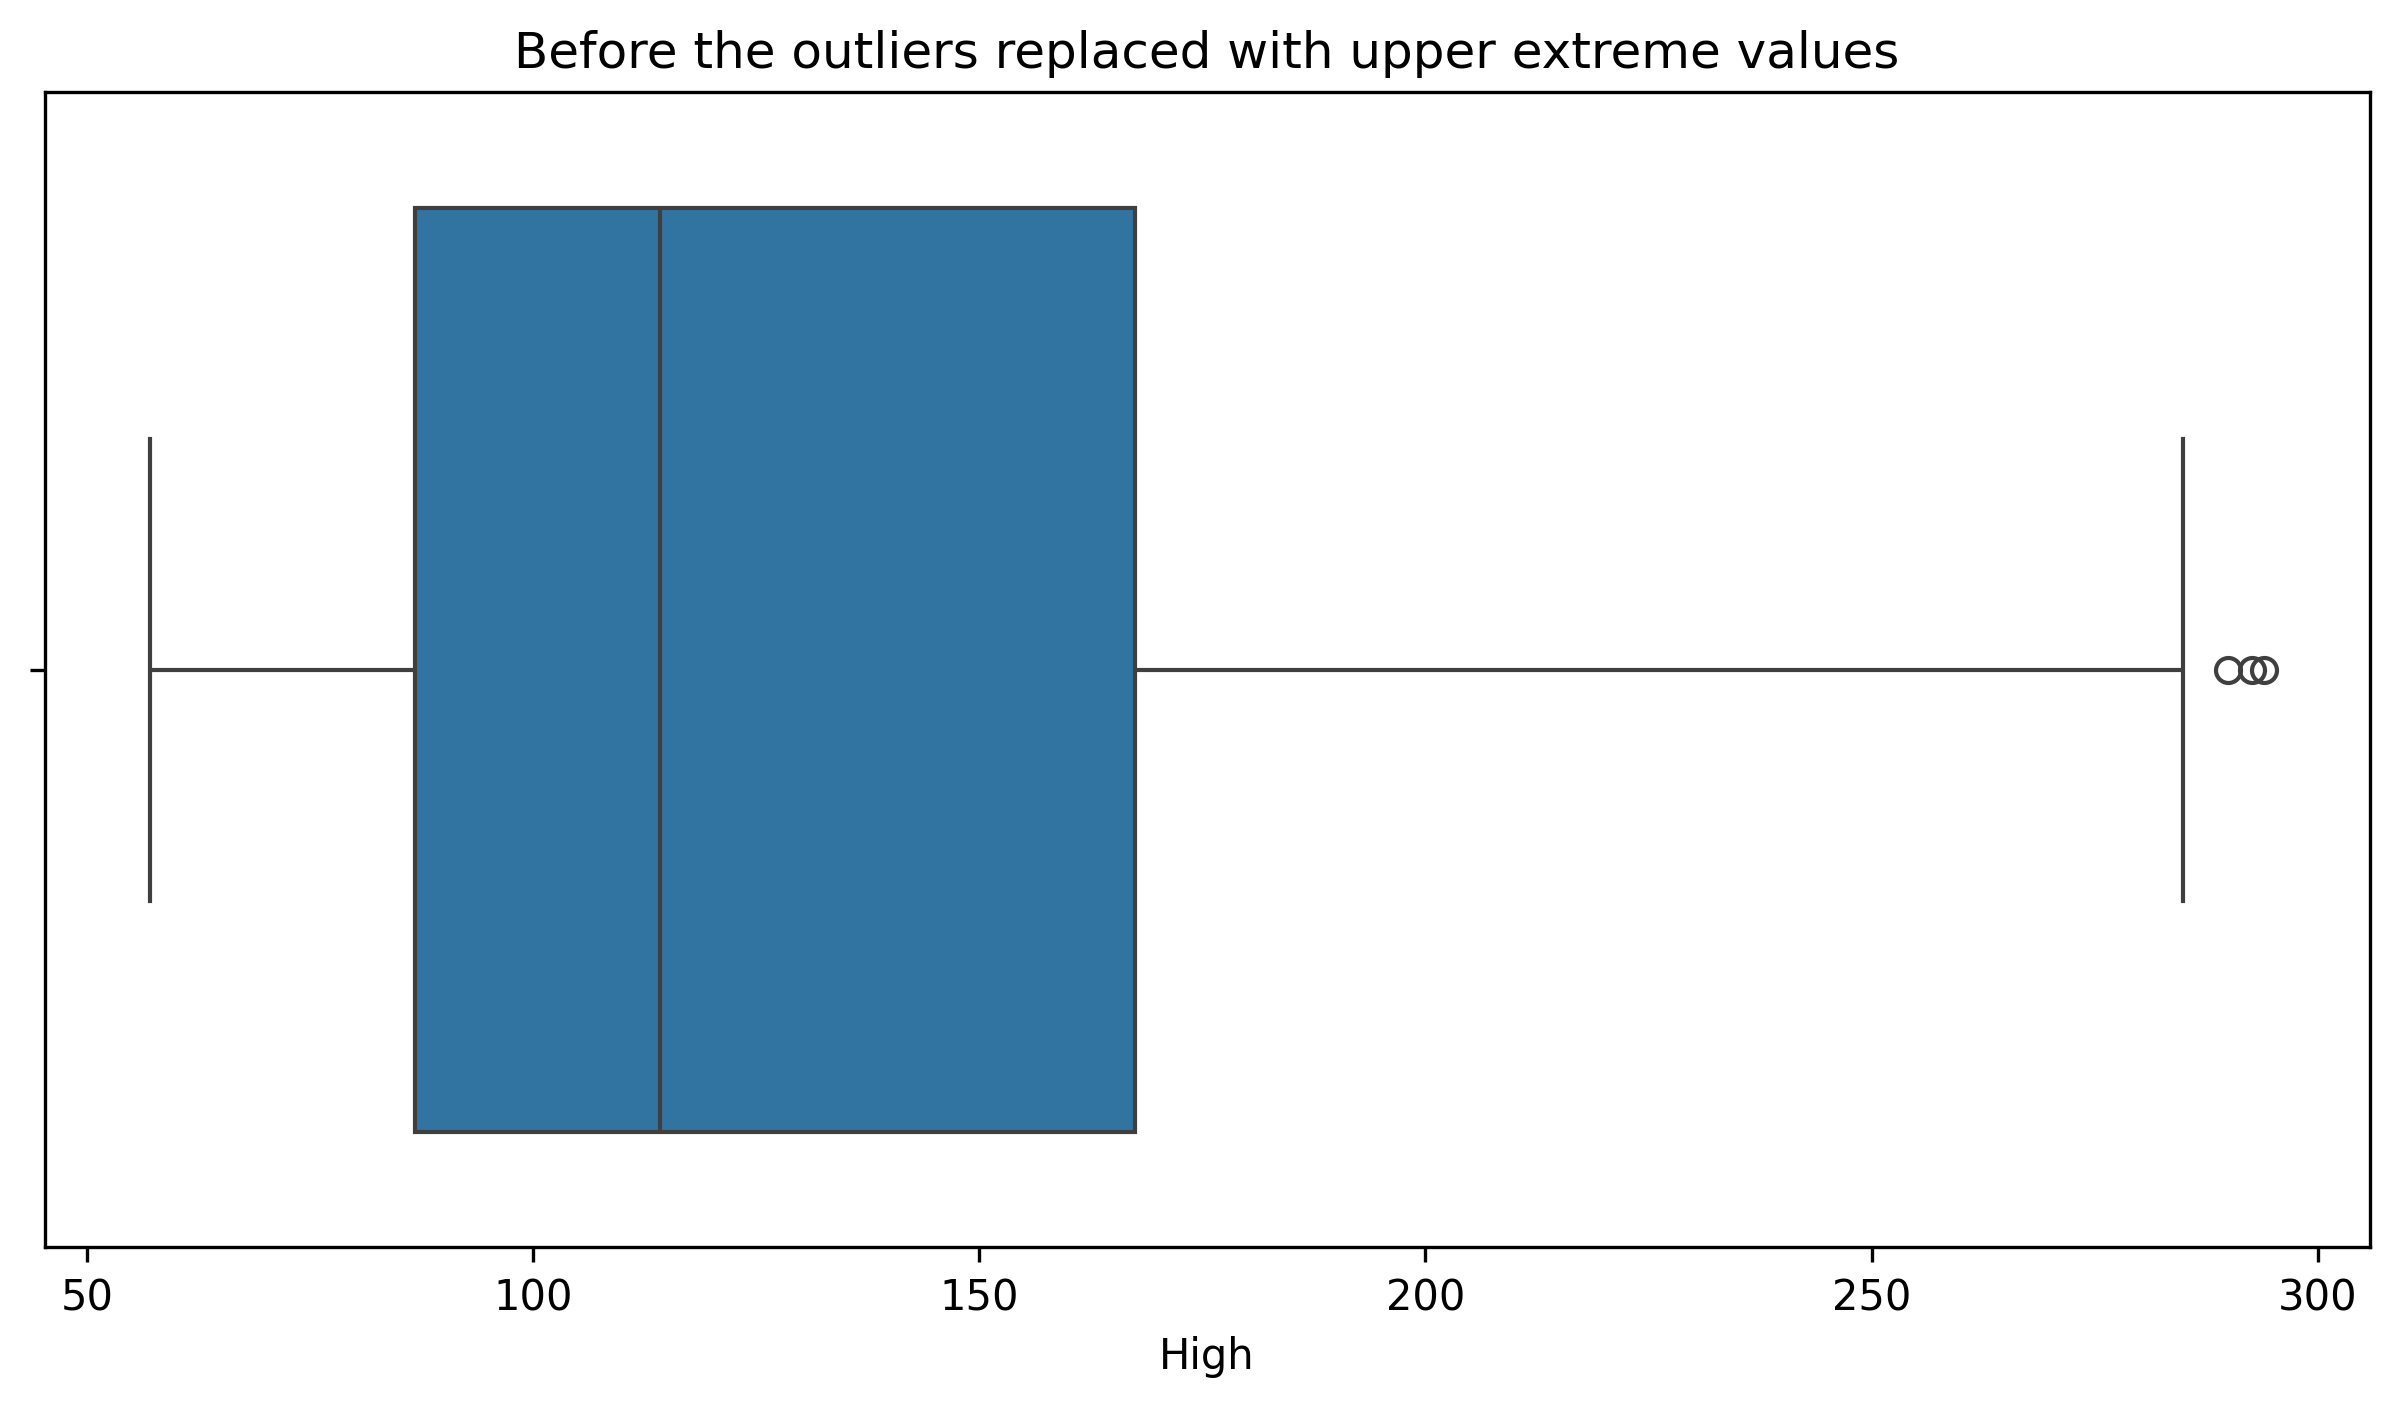

In [131]:
sns.boxplot(x=df["High"])
plt.xlabel("High")
plt.title("Before the outliers replaced with upper extreme values")

In [132]:
outlier_detection(df, "High")

(-34.32035024999995, 288.44820374999995)

In [133]:
df.loc[df["High"]>288.44820374999995, "High"] = 288.44820374999995

Text(0.5, 1.0, 'After the outliers replaced with upper extreme values')

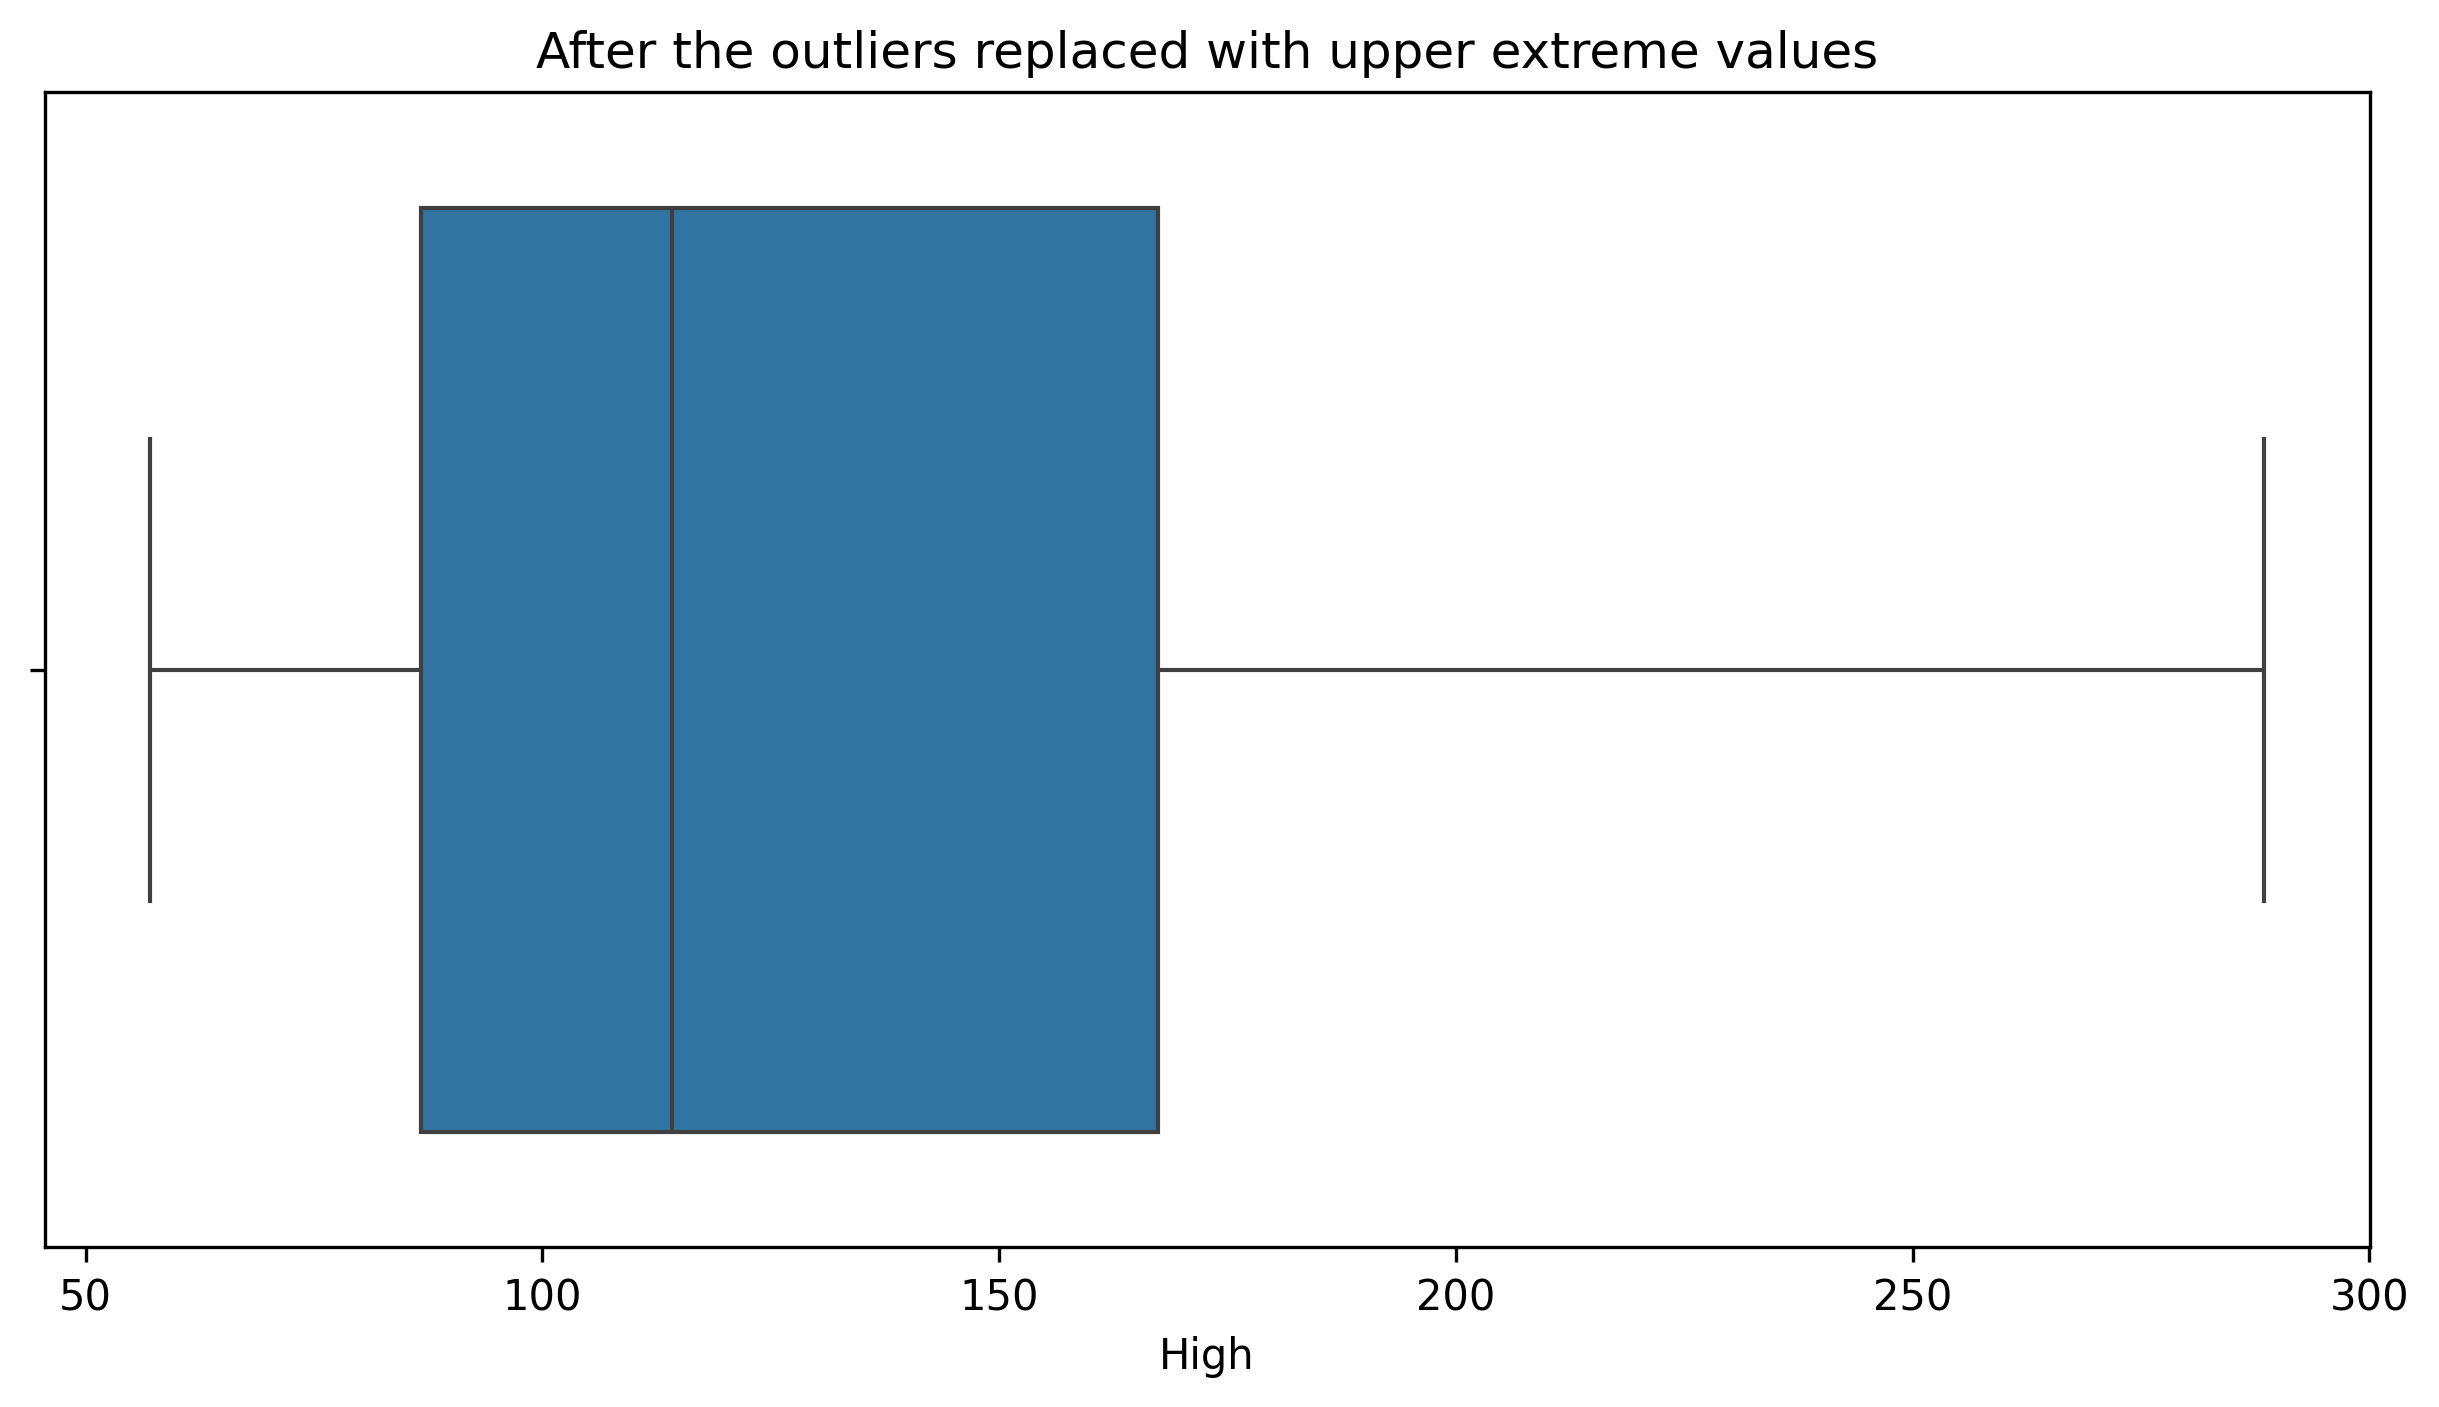

In [134]:
sns.boxplot(x=df["High"])
plt.xlabel("High")
plt.title("After the outliers replaced with upper extreme values")

Text(0.5, 1.0, 'Before the outliers replaced with upper extreme values')

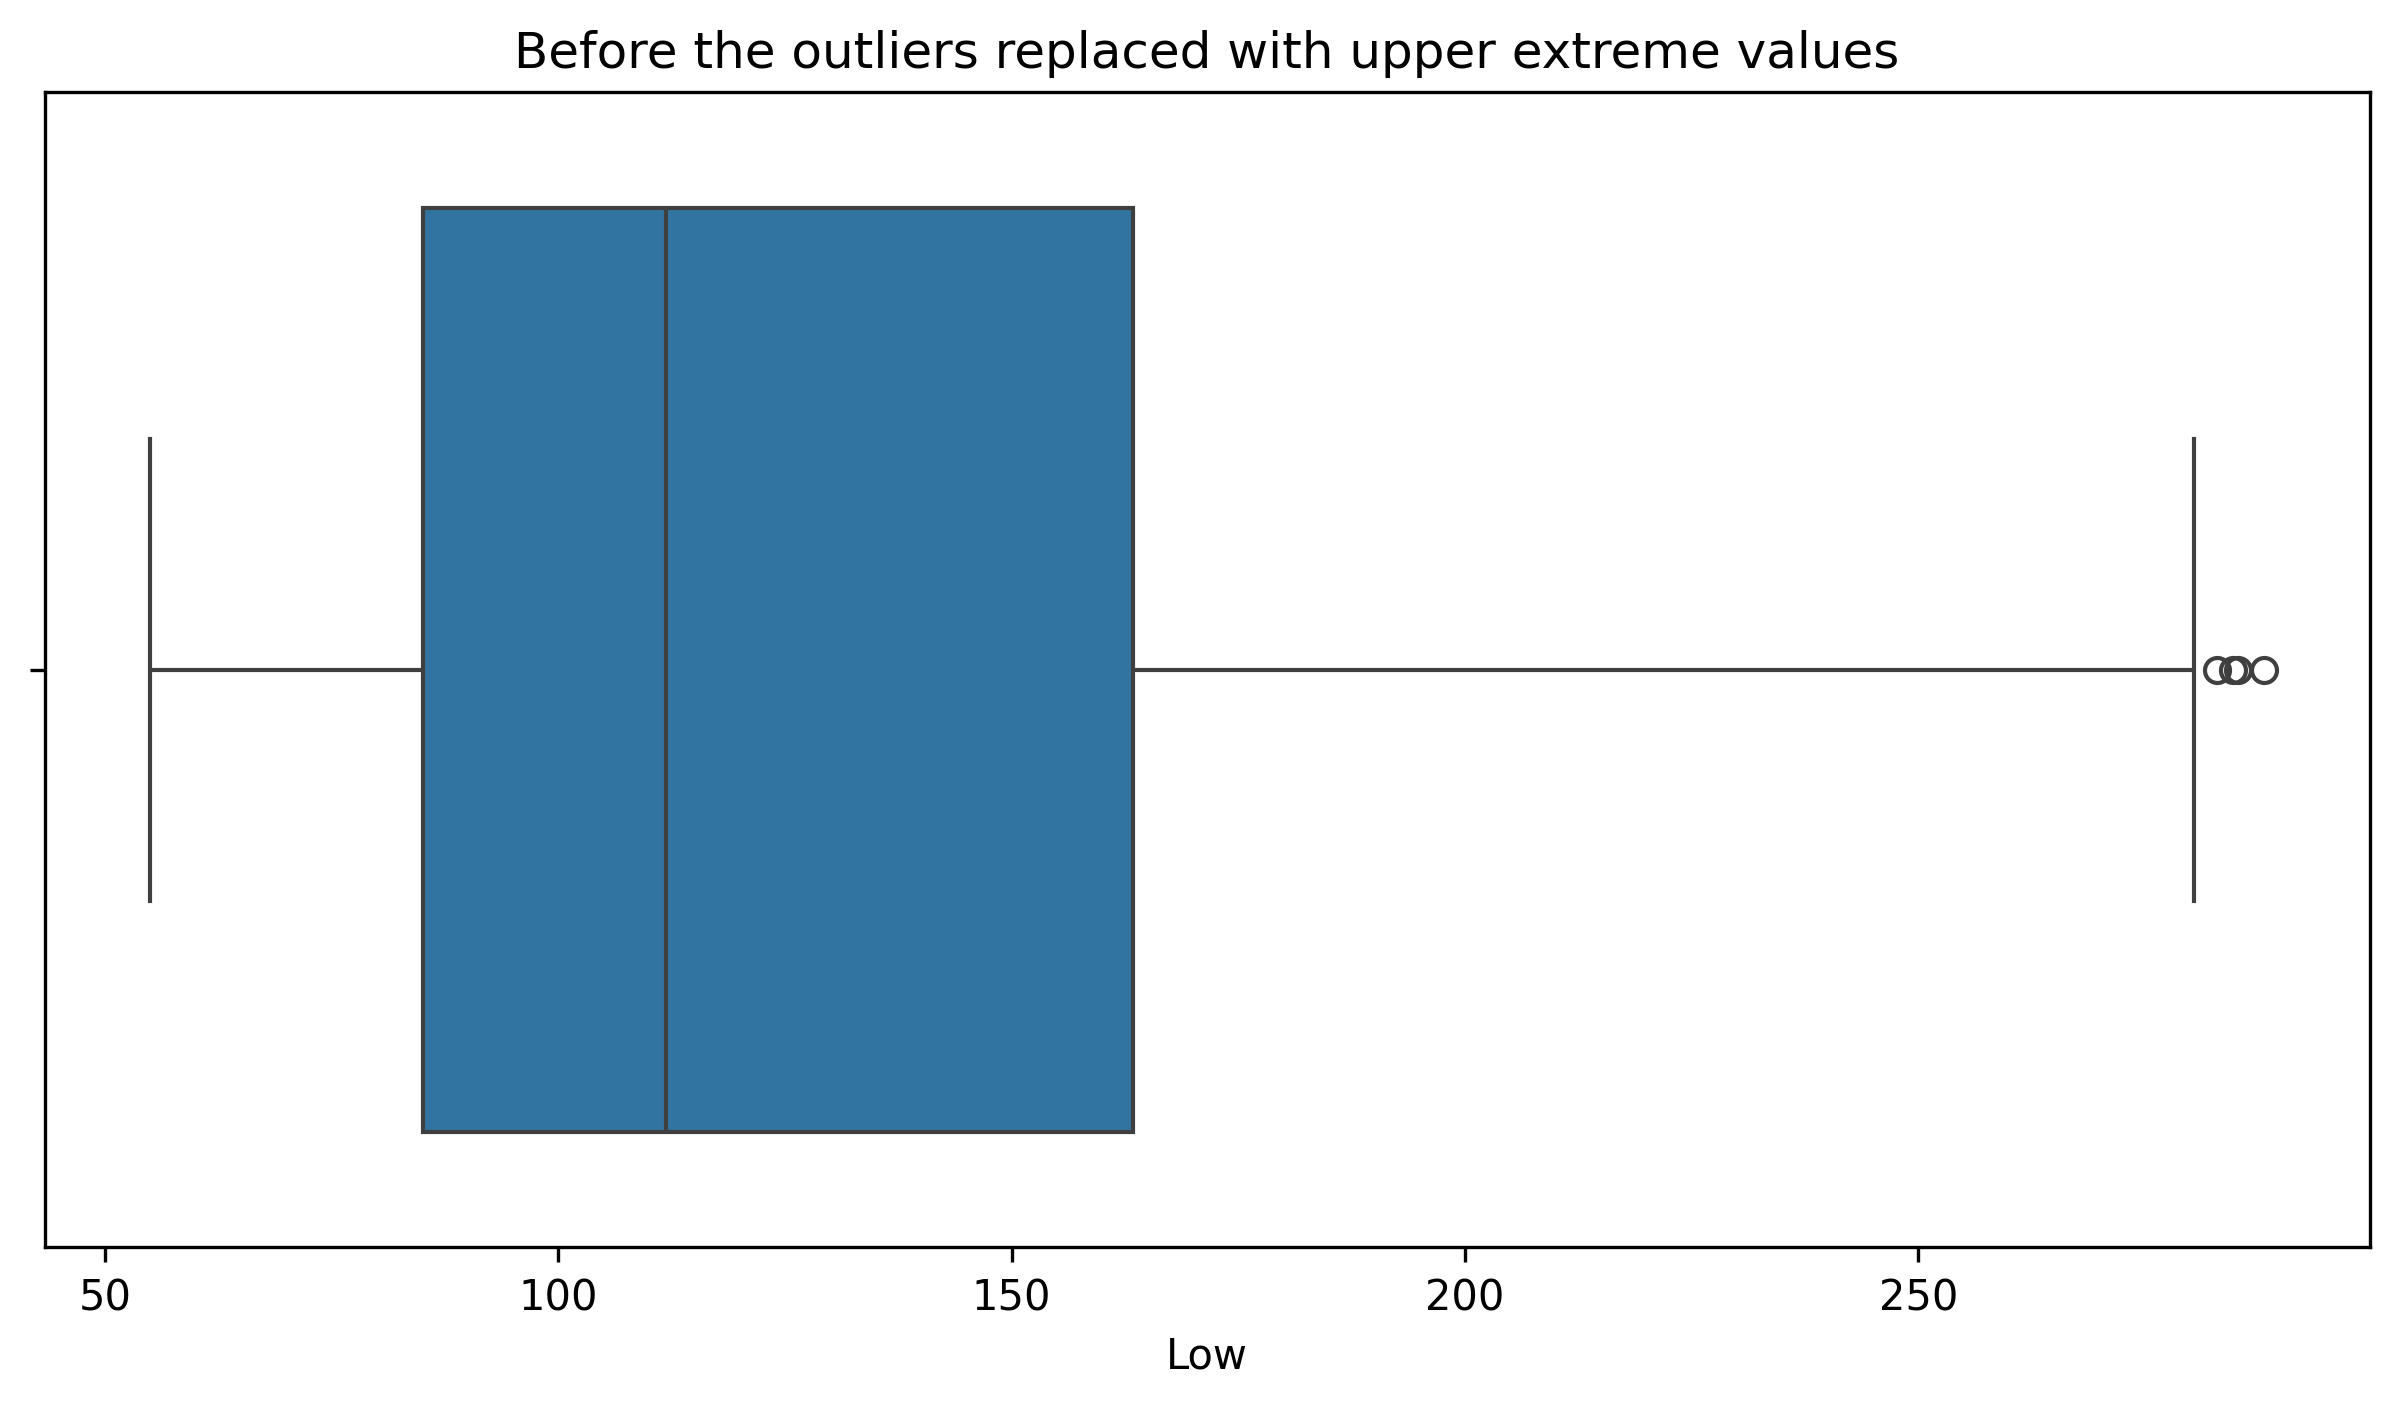

In [135]:
sns.boxplot(x=df["Low"])
plt.xlabel("Low")
plt.title("Before the outliers replaced with upper extreme values")

In [136]:
outlier_detection(df, "Low")

(-32.49642575, 280.97784824999997)

In [137]:
df.loc[df["Low"]>280.97784824999997, "Low"] = 280.97784824999997

Text(0.5, 1.0, 'After the outliers replaced with upper extreme values')

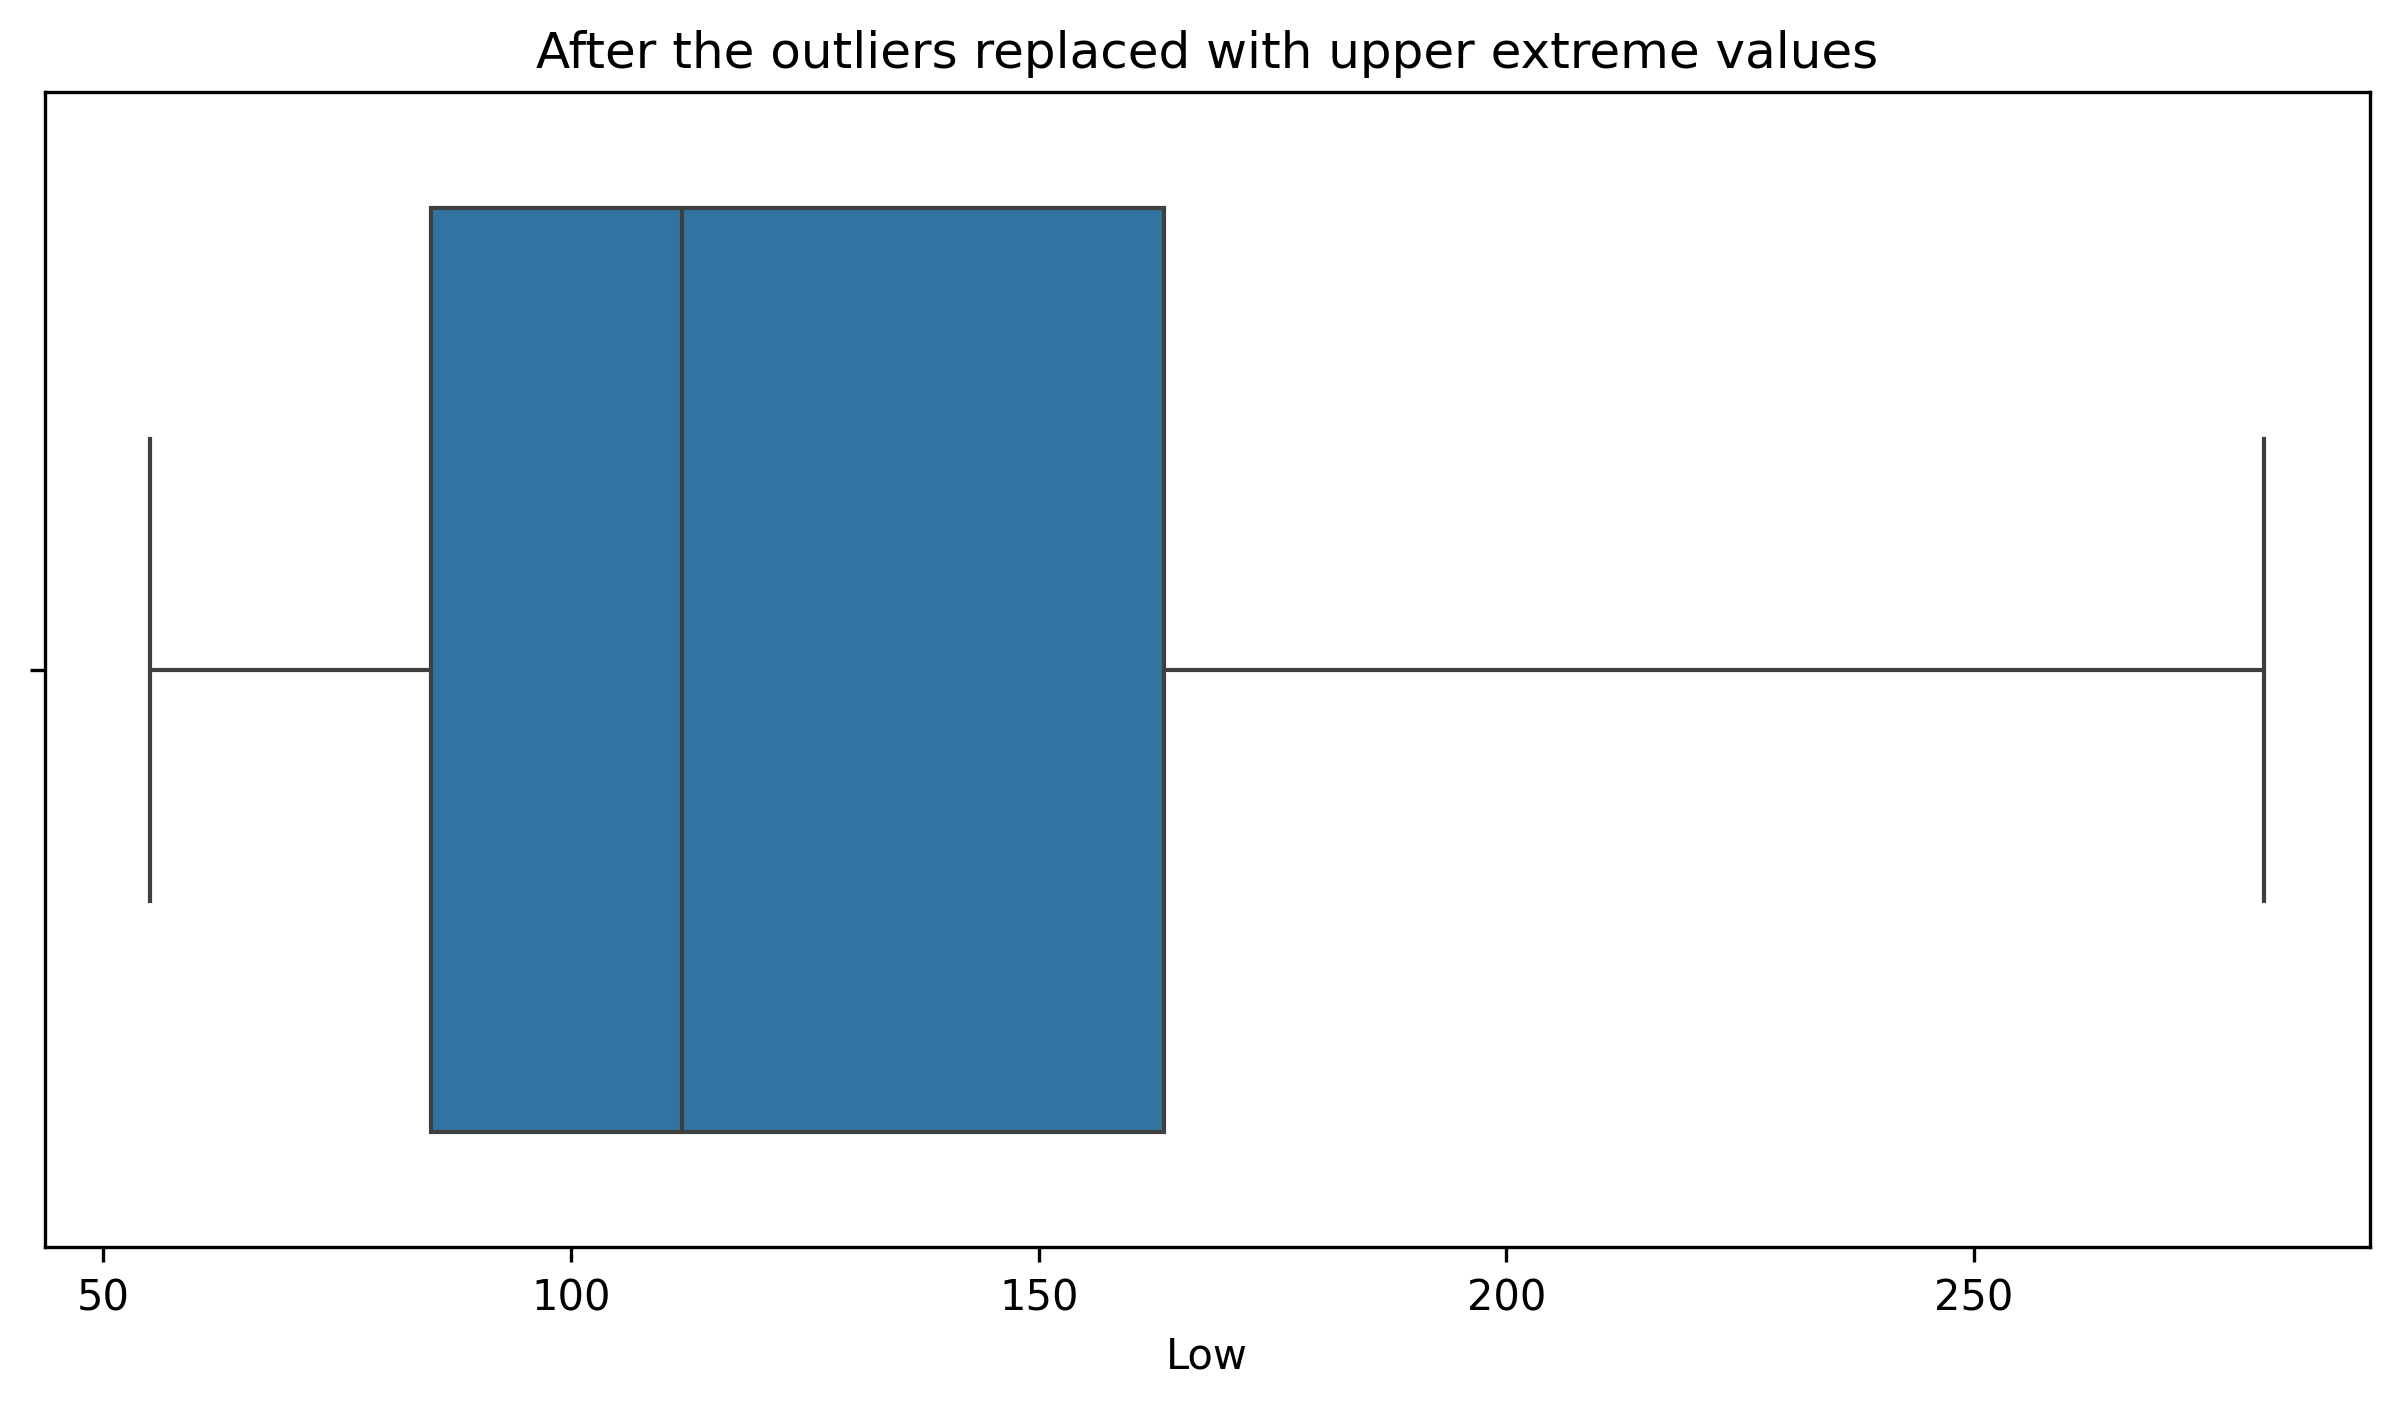

In [138]:
sns.boxplot(x=df["Low"])
plt.xlabel("Low")
plt.title("After the outliers replaced with upper extreme values")

Text(0.5, 1.0, 'Before the outliers replaced with upper extreme values')

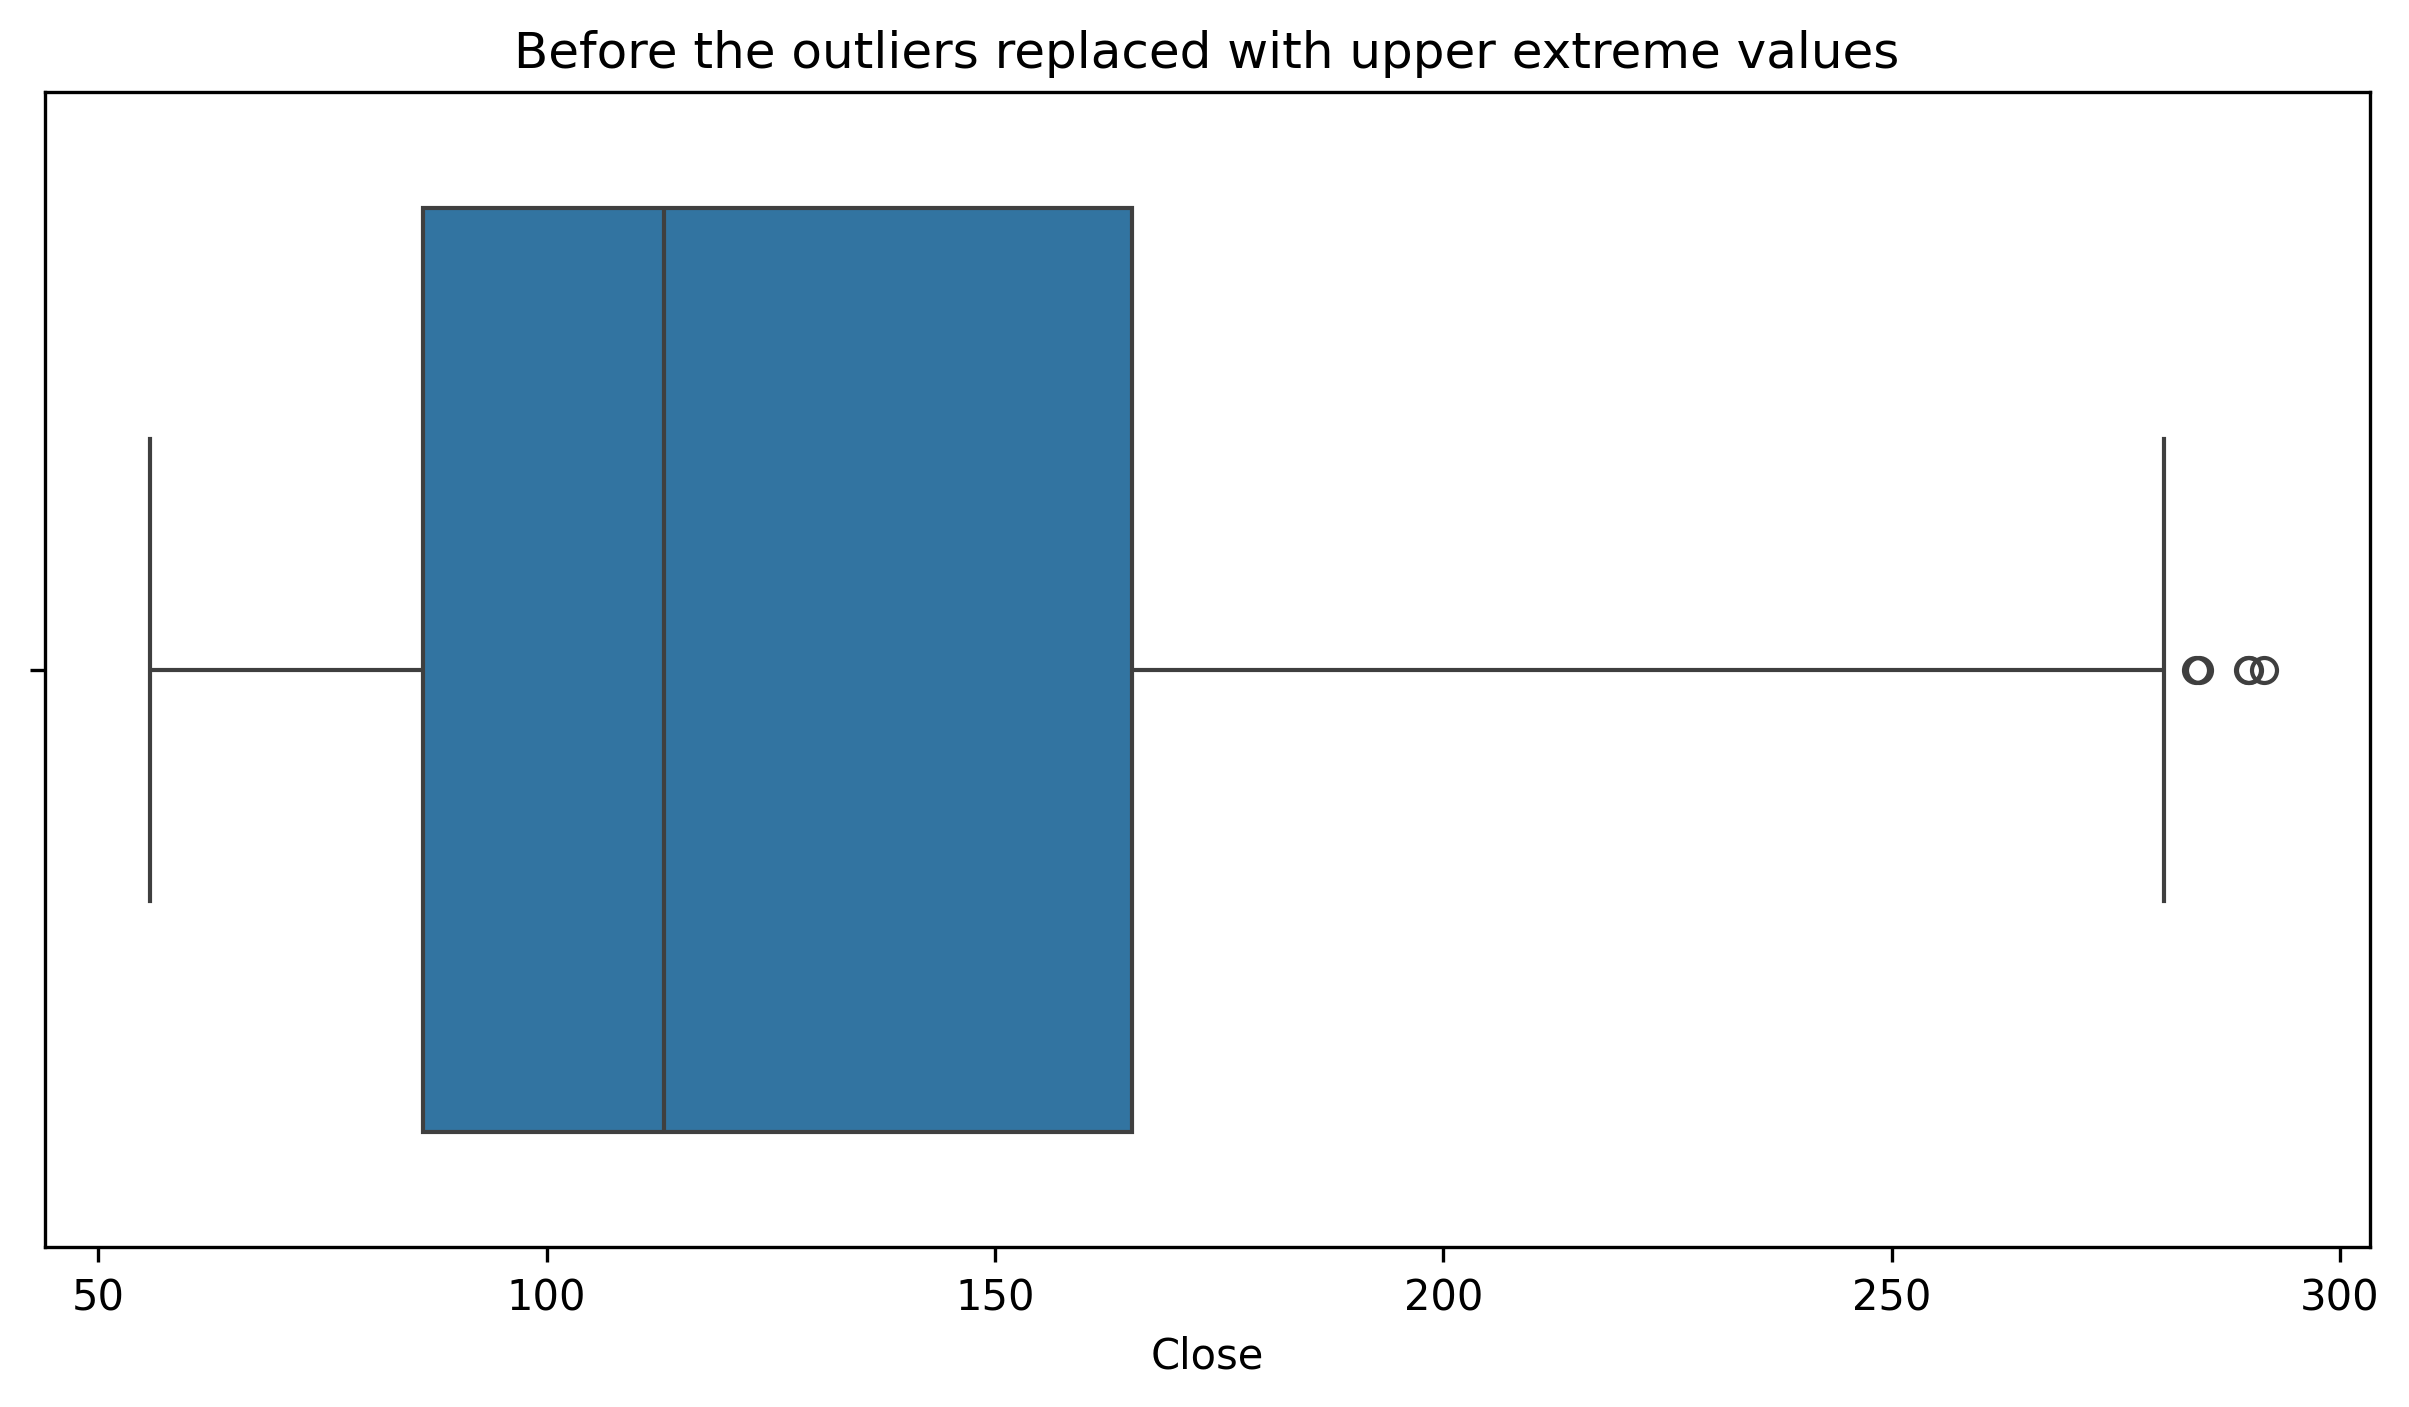

In [139]:
sns.boxplot(x=df["Close"])
plt.xlabel("Close")
plt.title("Before the outliers replaced with upper extreme values")

In [140]:
outlier_detection(df,"Close")

(-32.36214249999999, 283.8092895)

In [141]:
df.loc[df["Close"]>283.8092895, "Close"] = 283.8092895

Text(0.5, 1.0, 'After the outliers replaced with upper extreme values')

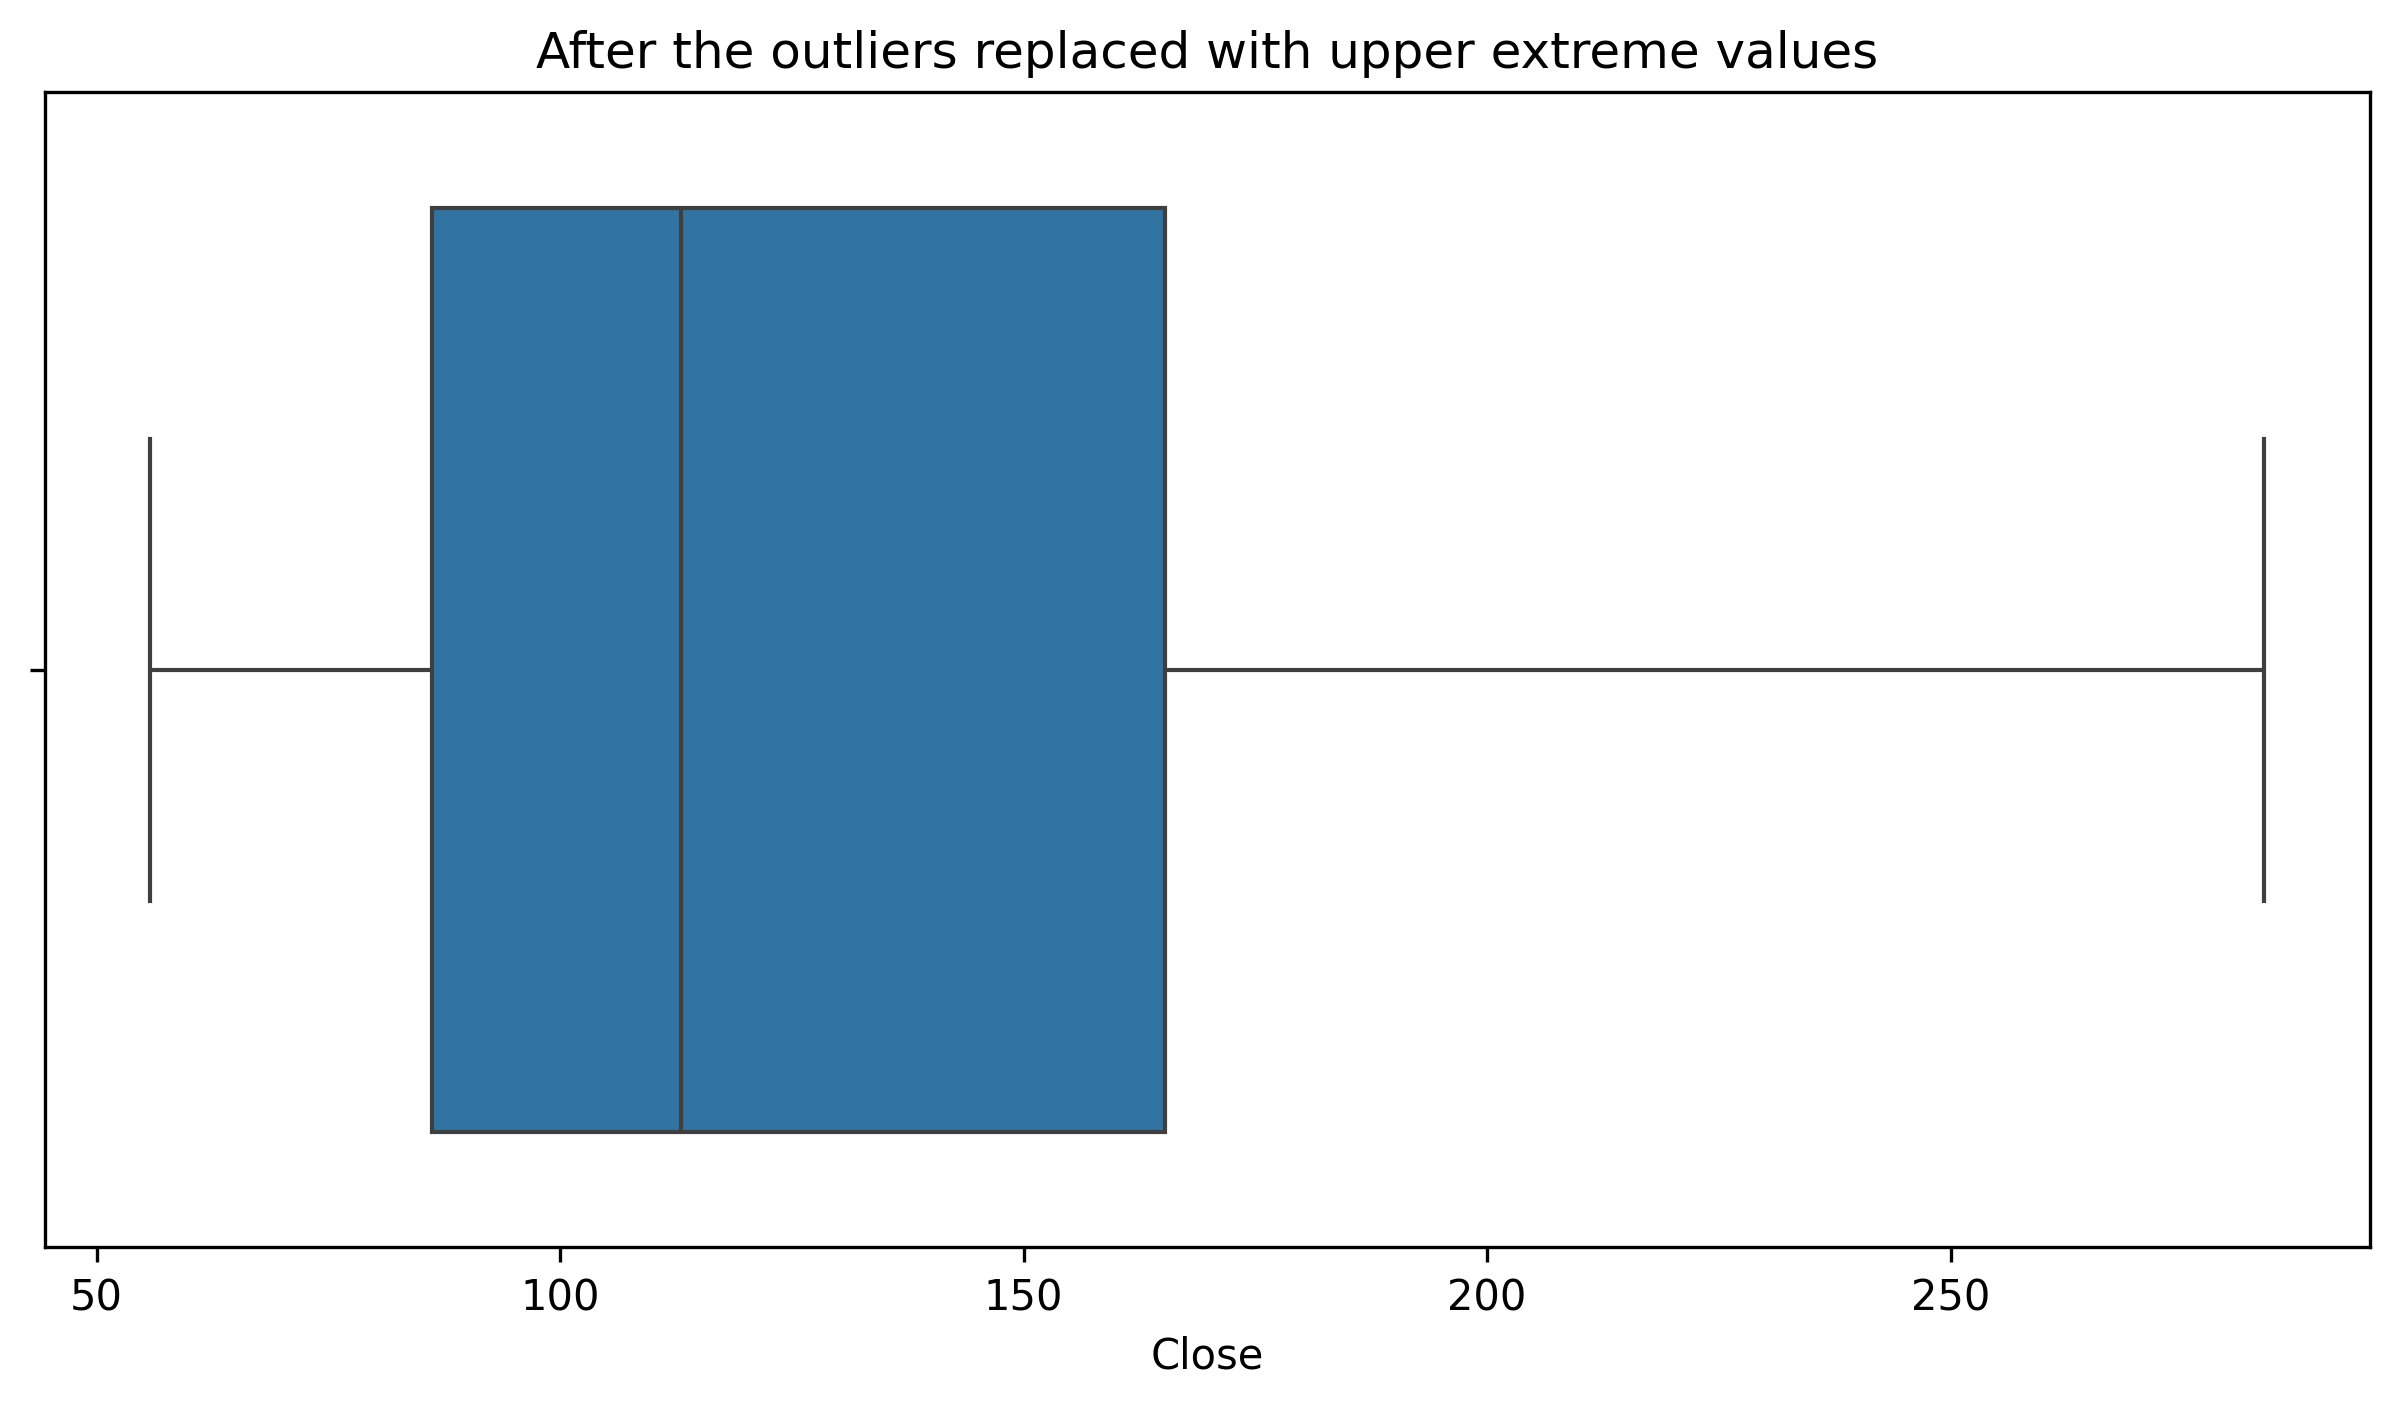

In [142]:
sns.boxplot(x=df["Close"])
plt.xlabel("Close")
plt.title("After the outliers replaced with upper extreme values")

Text(0.5, 1.0, 'Before the outliers replaced with upper extreme values')

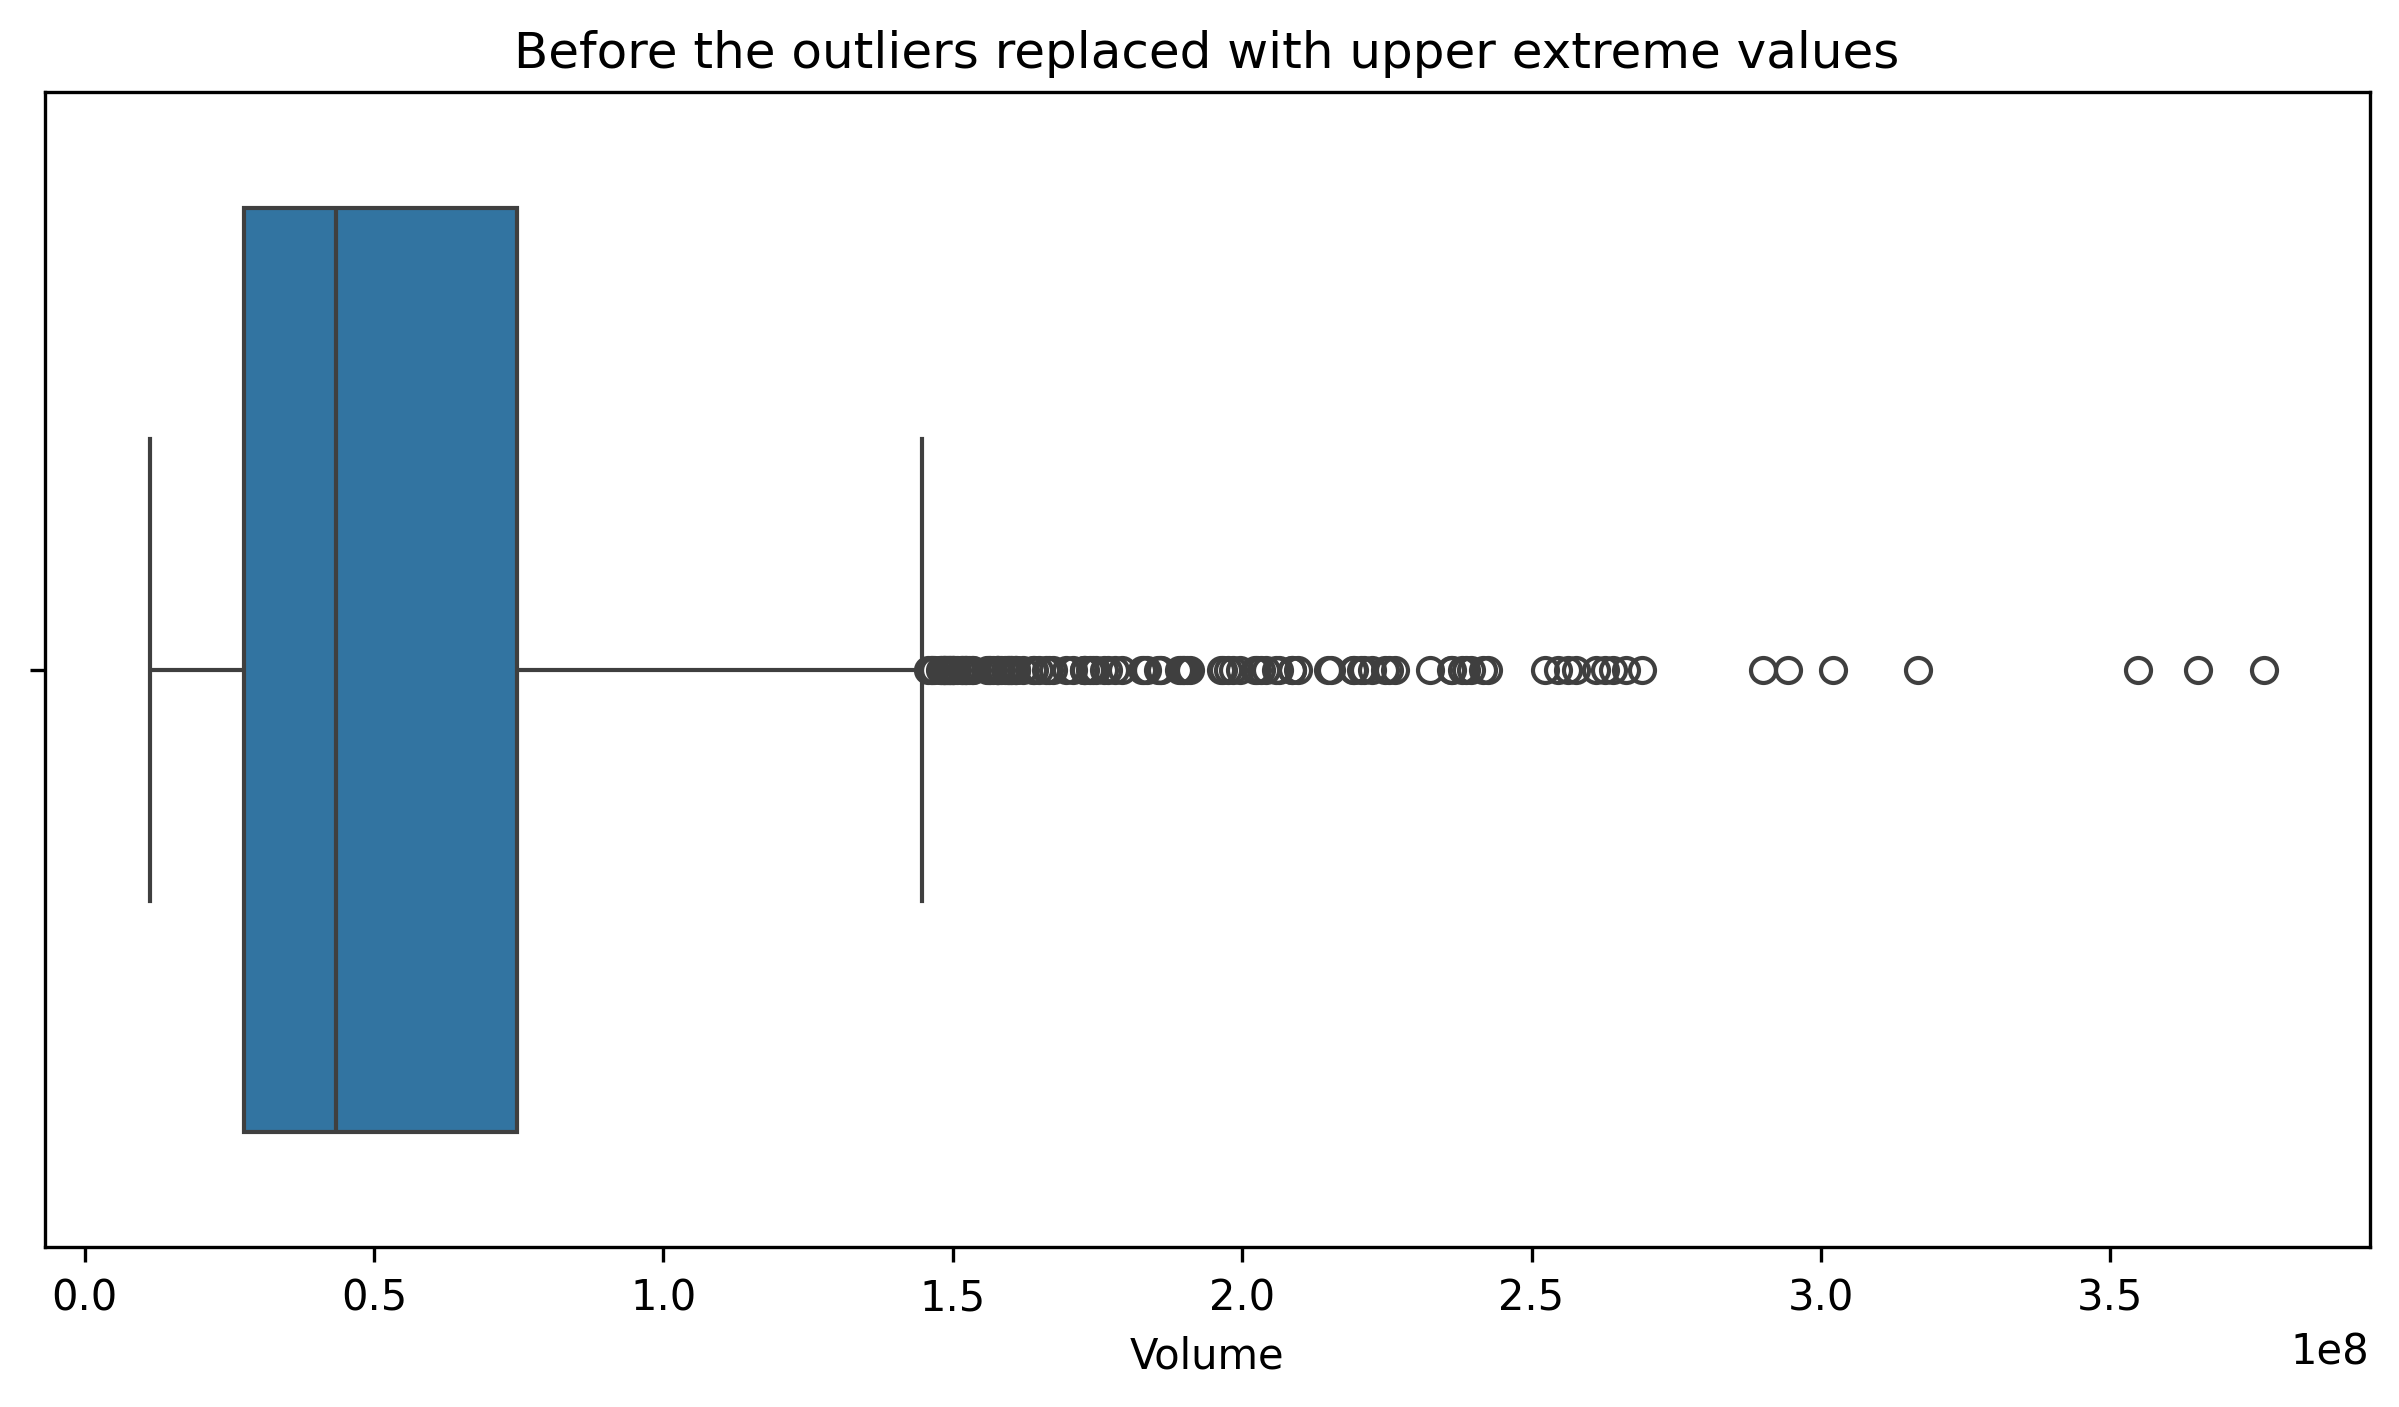

In [143]:
sns.boxplot(x=df["Volume"])
plt.xlabel("Volume")
plt.title("Before the outliers replaced with upper extreme values")

In [144]:
outlier_detection(df, "Volume")

(-43101325.0, 145397275.0)

In [145]:
df.loc[df["Volume"]>145397275.0, "Volume"] = 145397275.0

Text(0.5, 1.0, 'After the outliers replaced with upper extreme values')

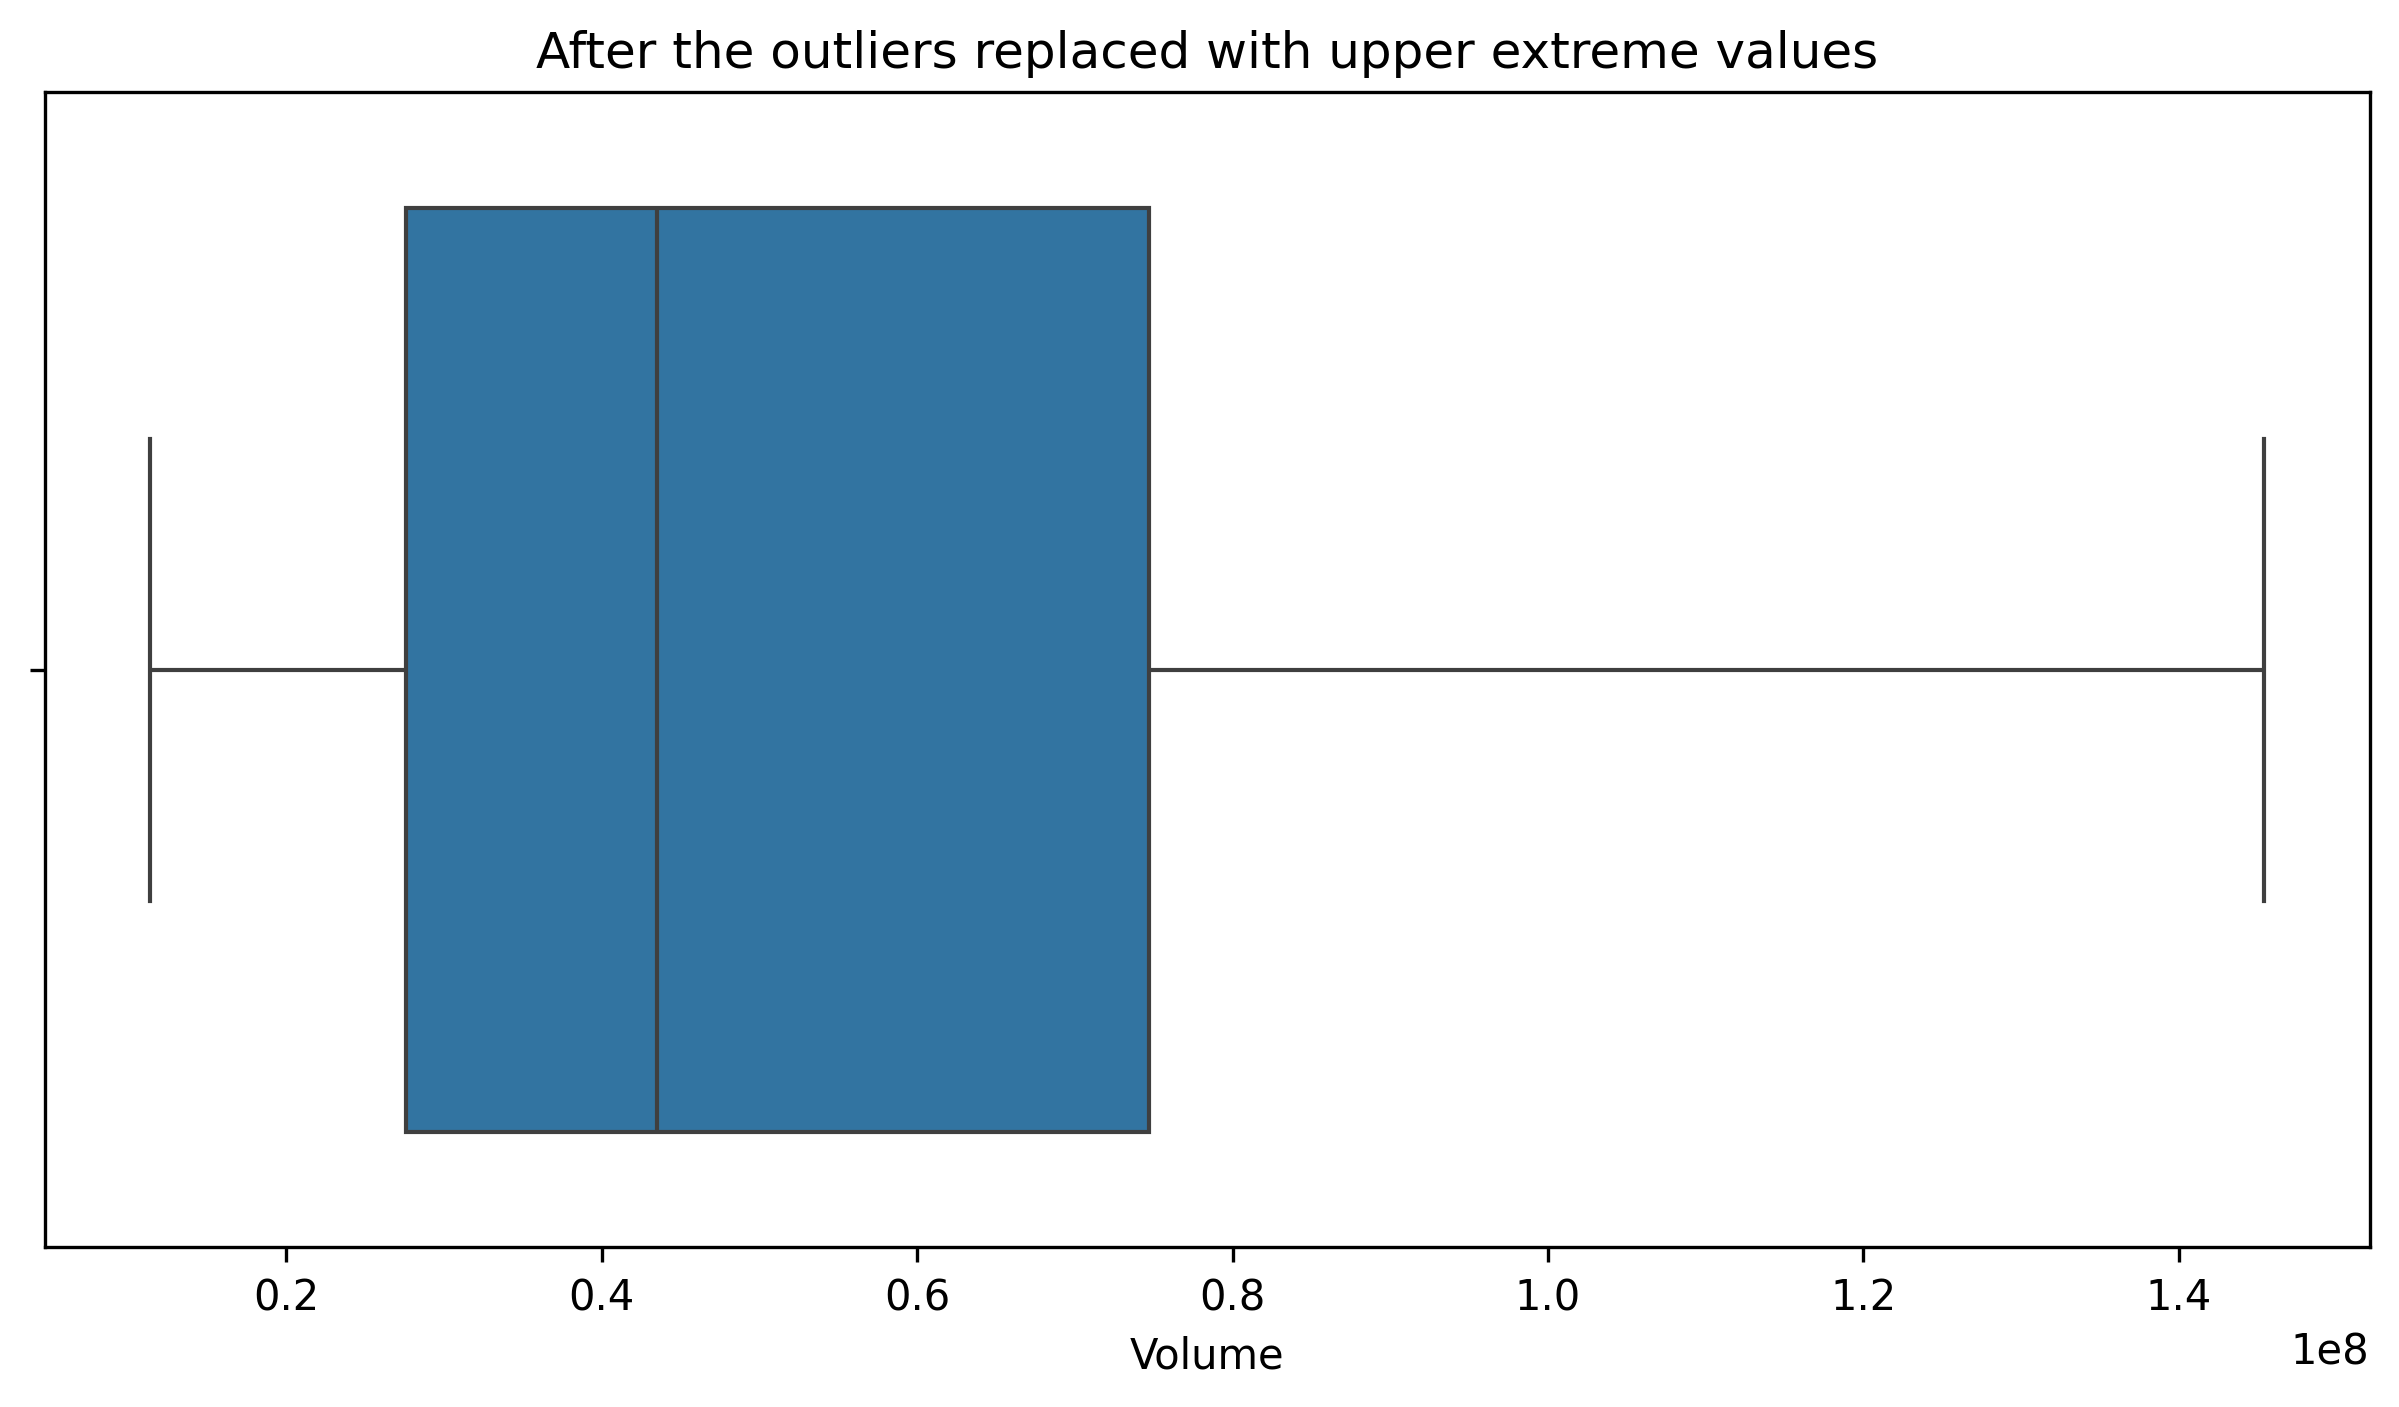

In [146]:
sns.boxplot(x=df["Volume"])
plt.xlabel("Volume")
plt.title("After the outliers replaced with upper extreme values")

<Axes: >

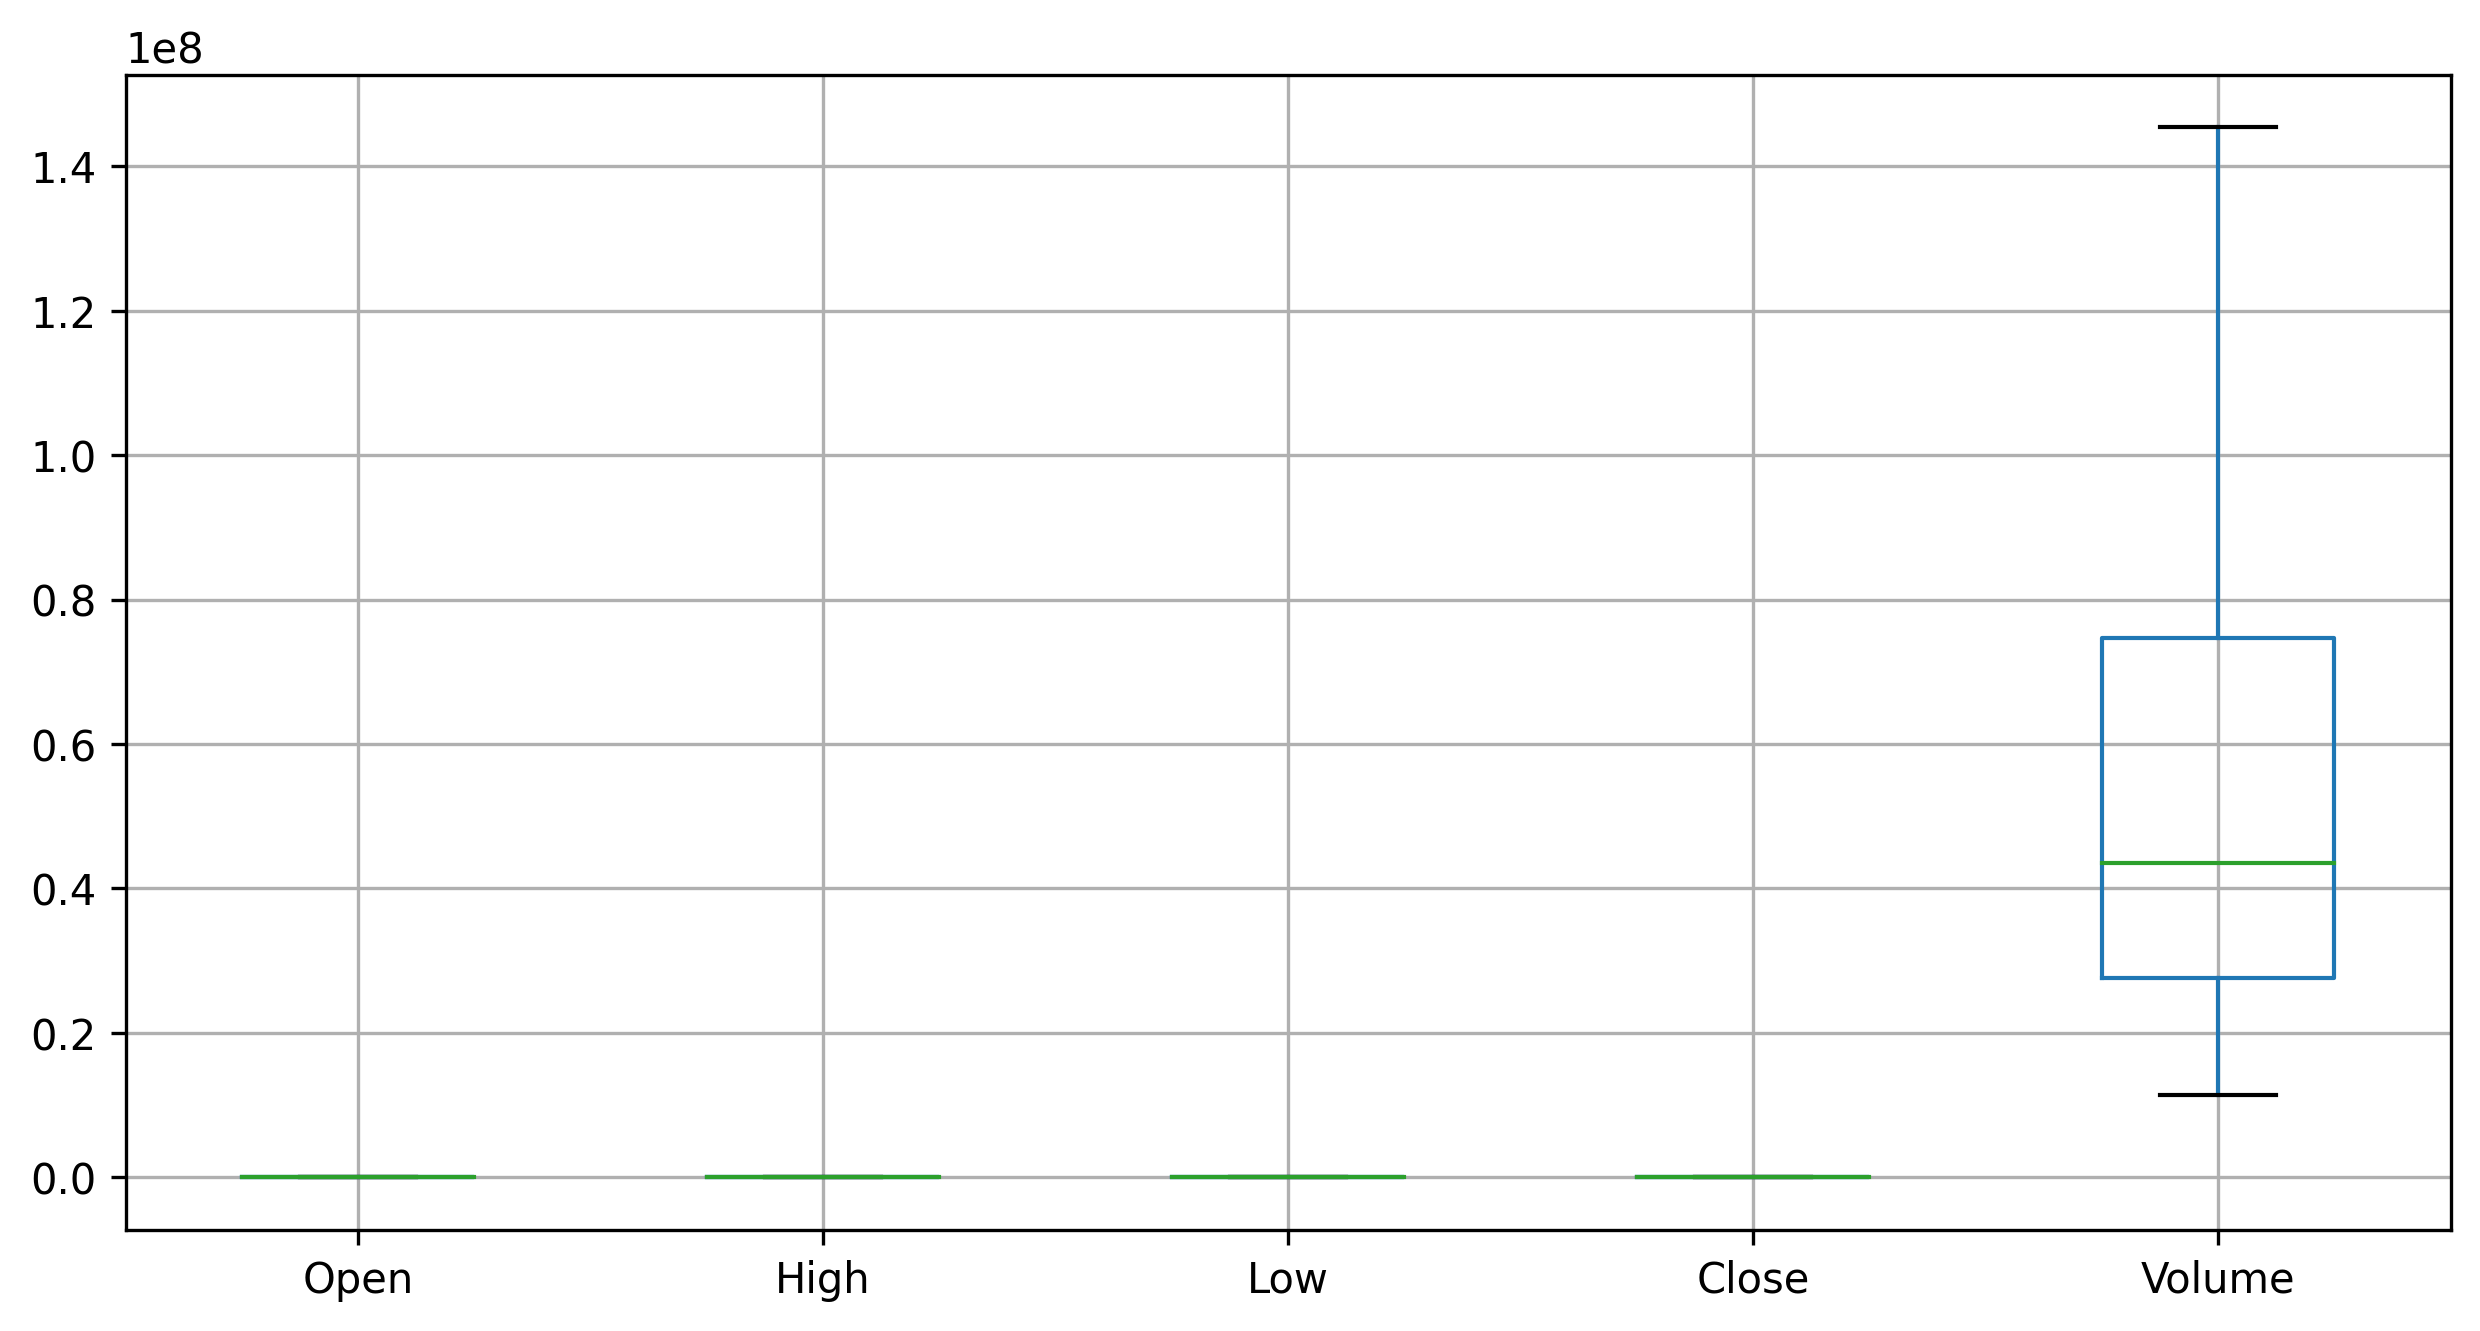

In [147]:
df.boxplot()

# Scatter Plot and Correlation

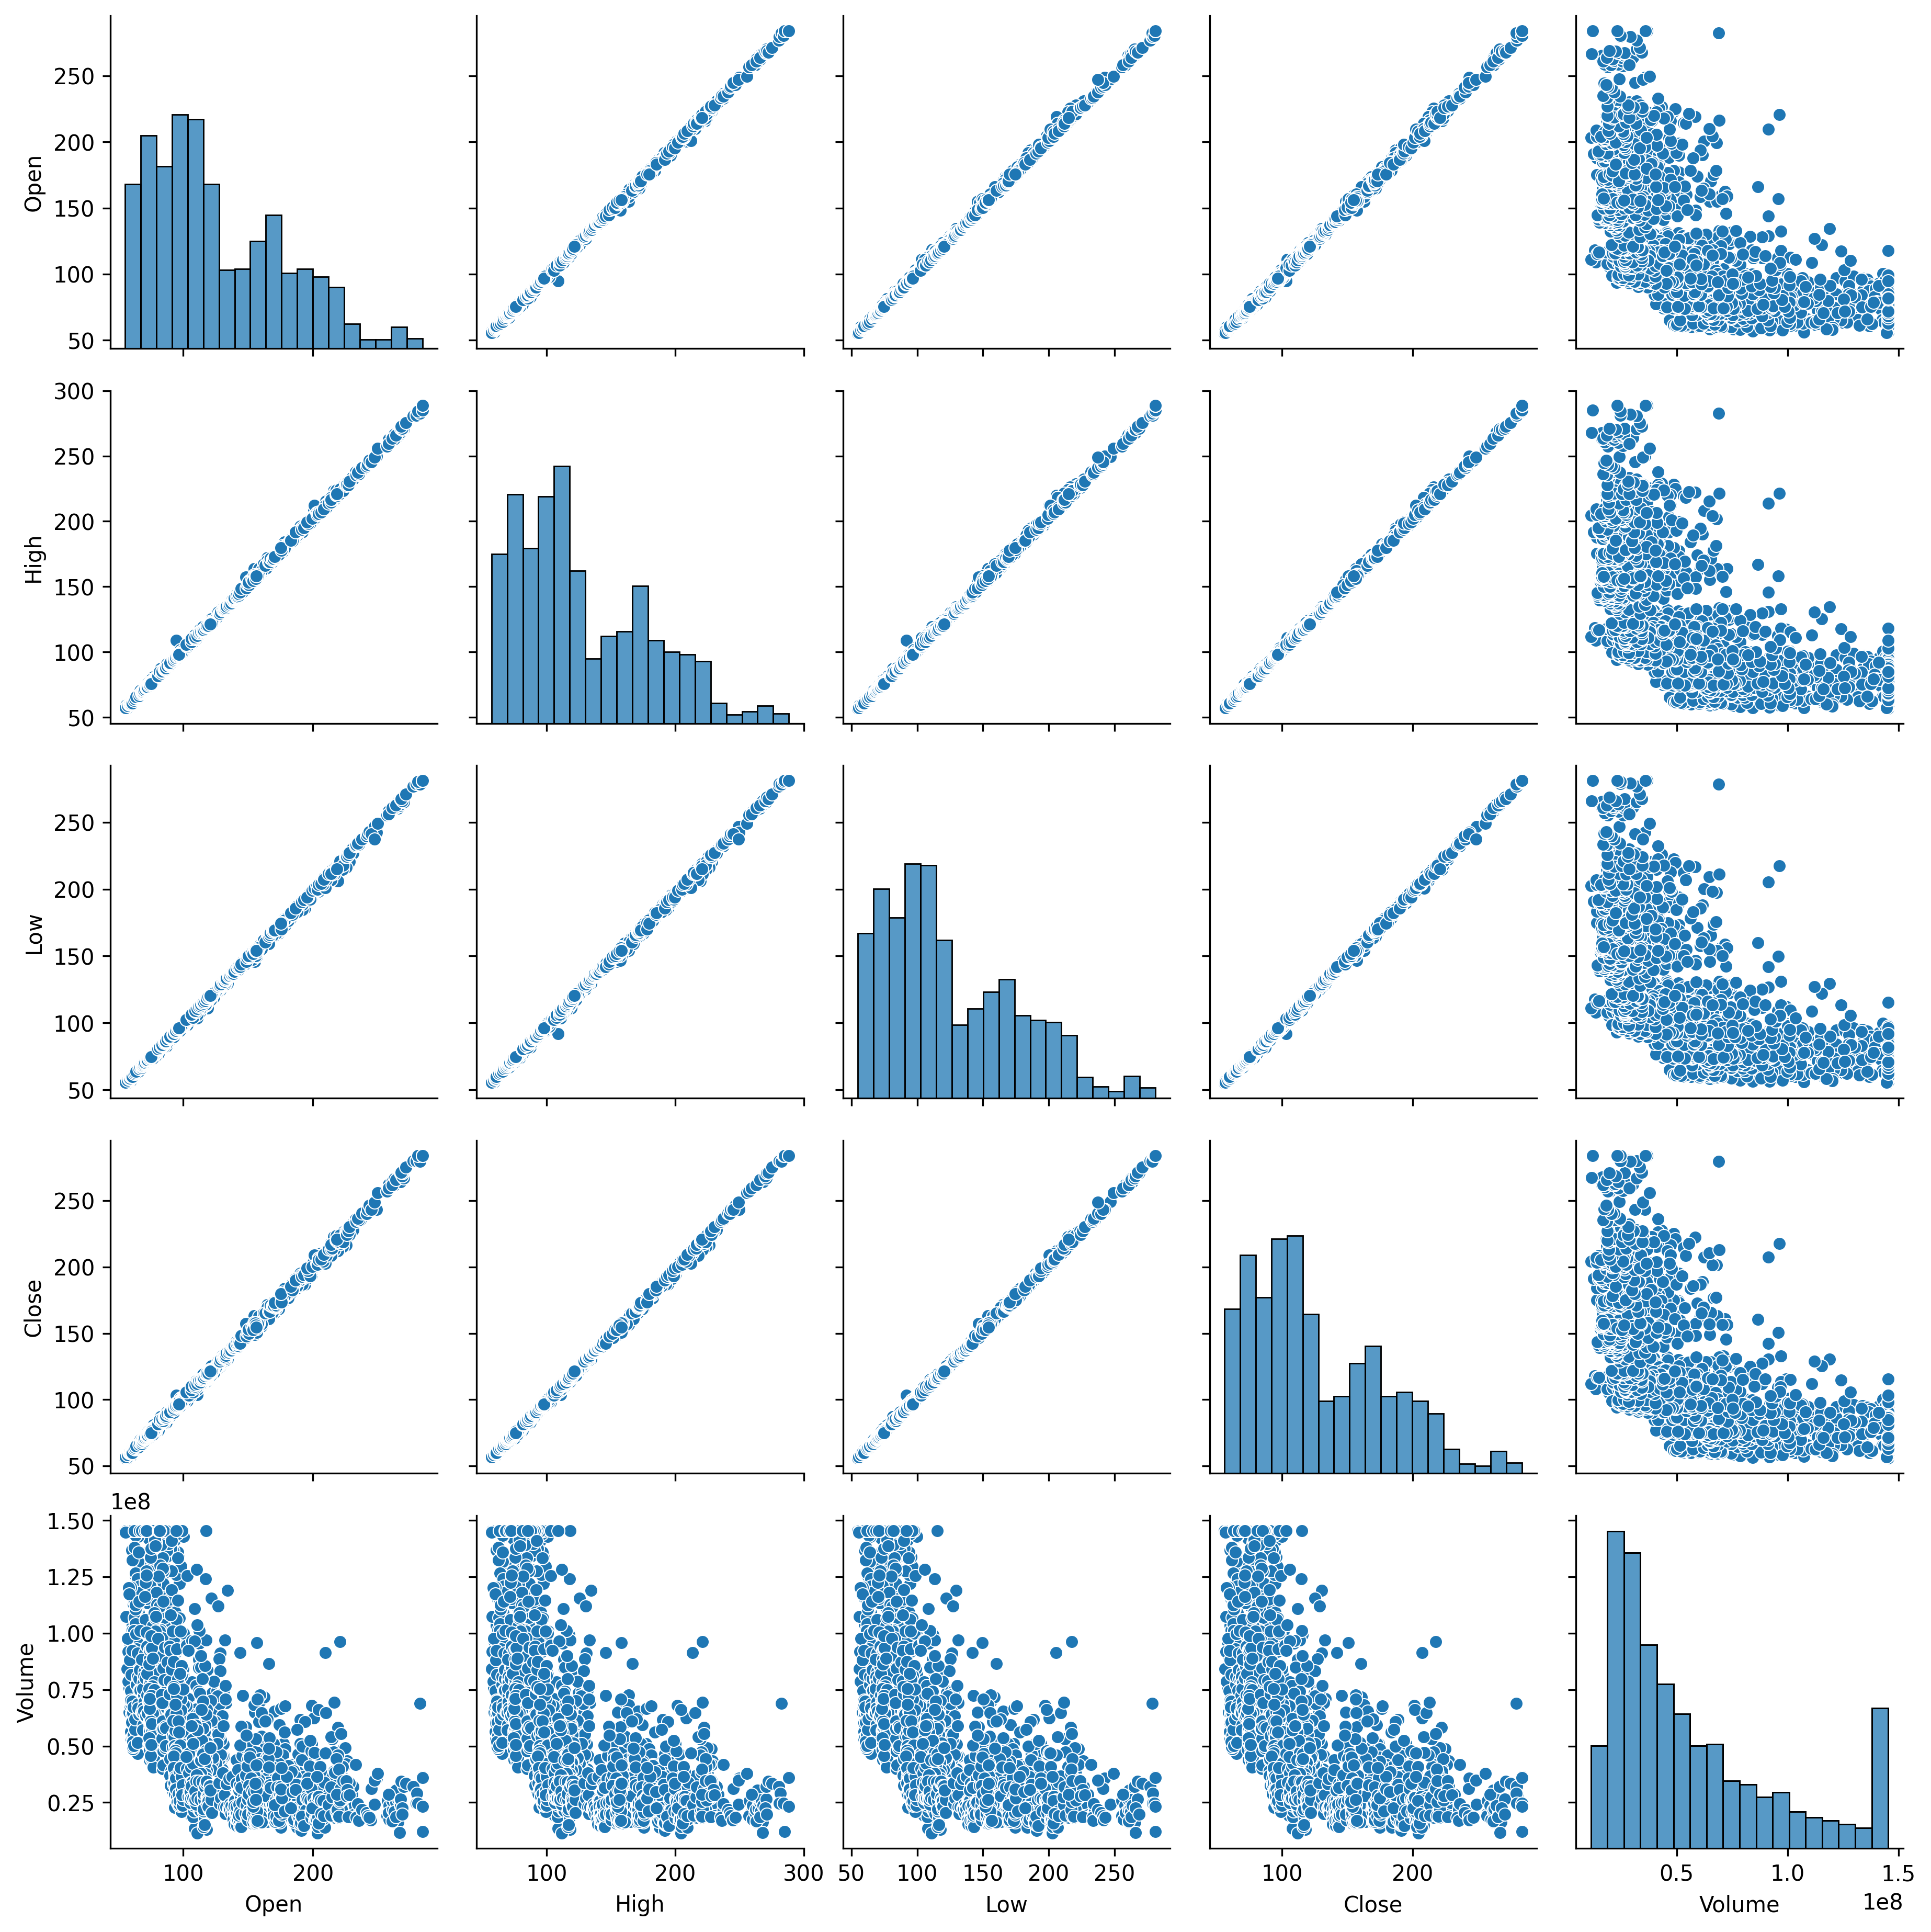

In [148]:
sns.pairplot(df)

**Correlation coefficient**

In [149]:
df.corr(numeric_only=True)

Open      High       Low     Close    Volume
Open    1.000000  0.999782  0.999719  0.999498 -0.623331
High    0.999782  1.000000  0.999656  0.999747 -0.620143
Low     0.999719  0.999656  1.000000  0.999771 -0.628784
Close   0.999498  0.999747  0.999771  1.000000 -0.624962
Volume -0.623331 -0.620143 -0.628784 -0.624962  1.000000

<Axes: >

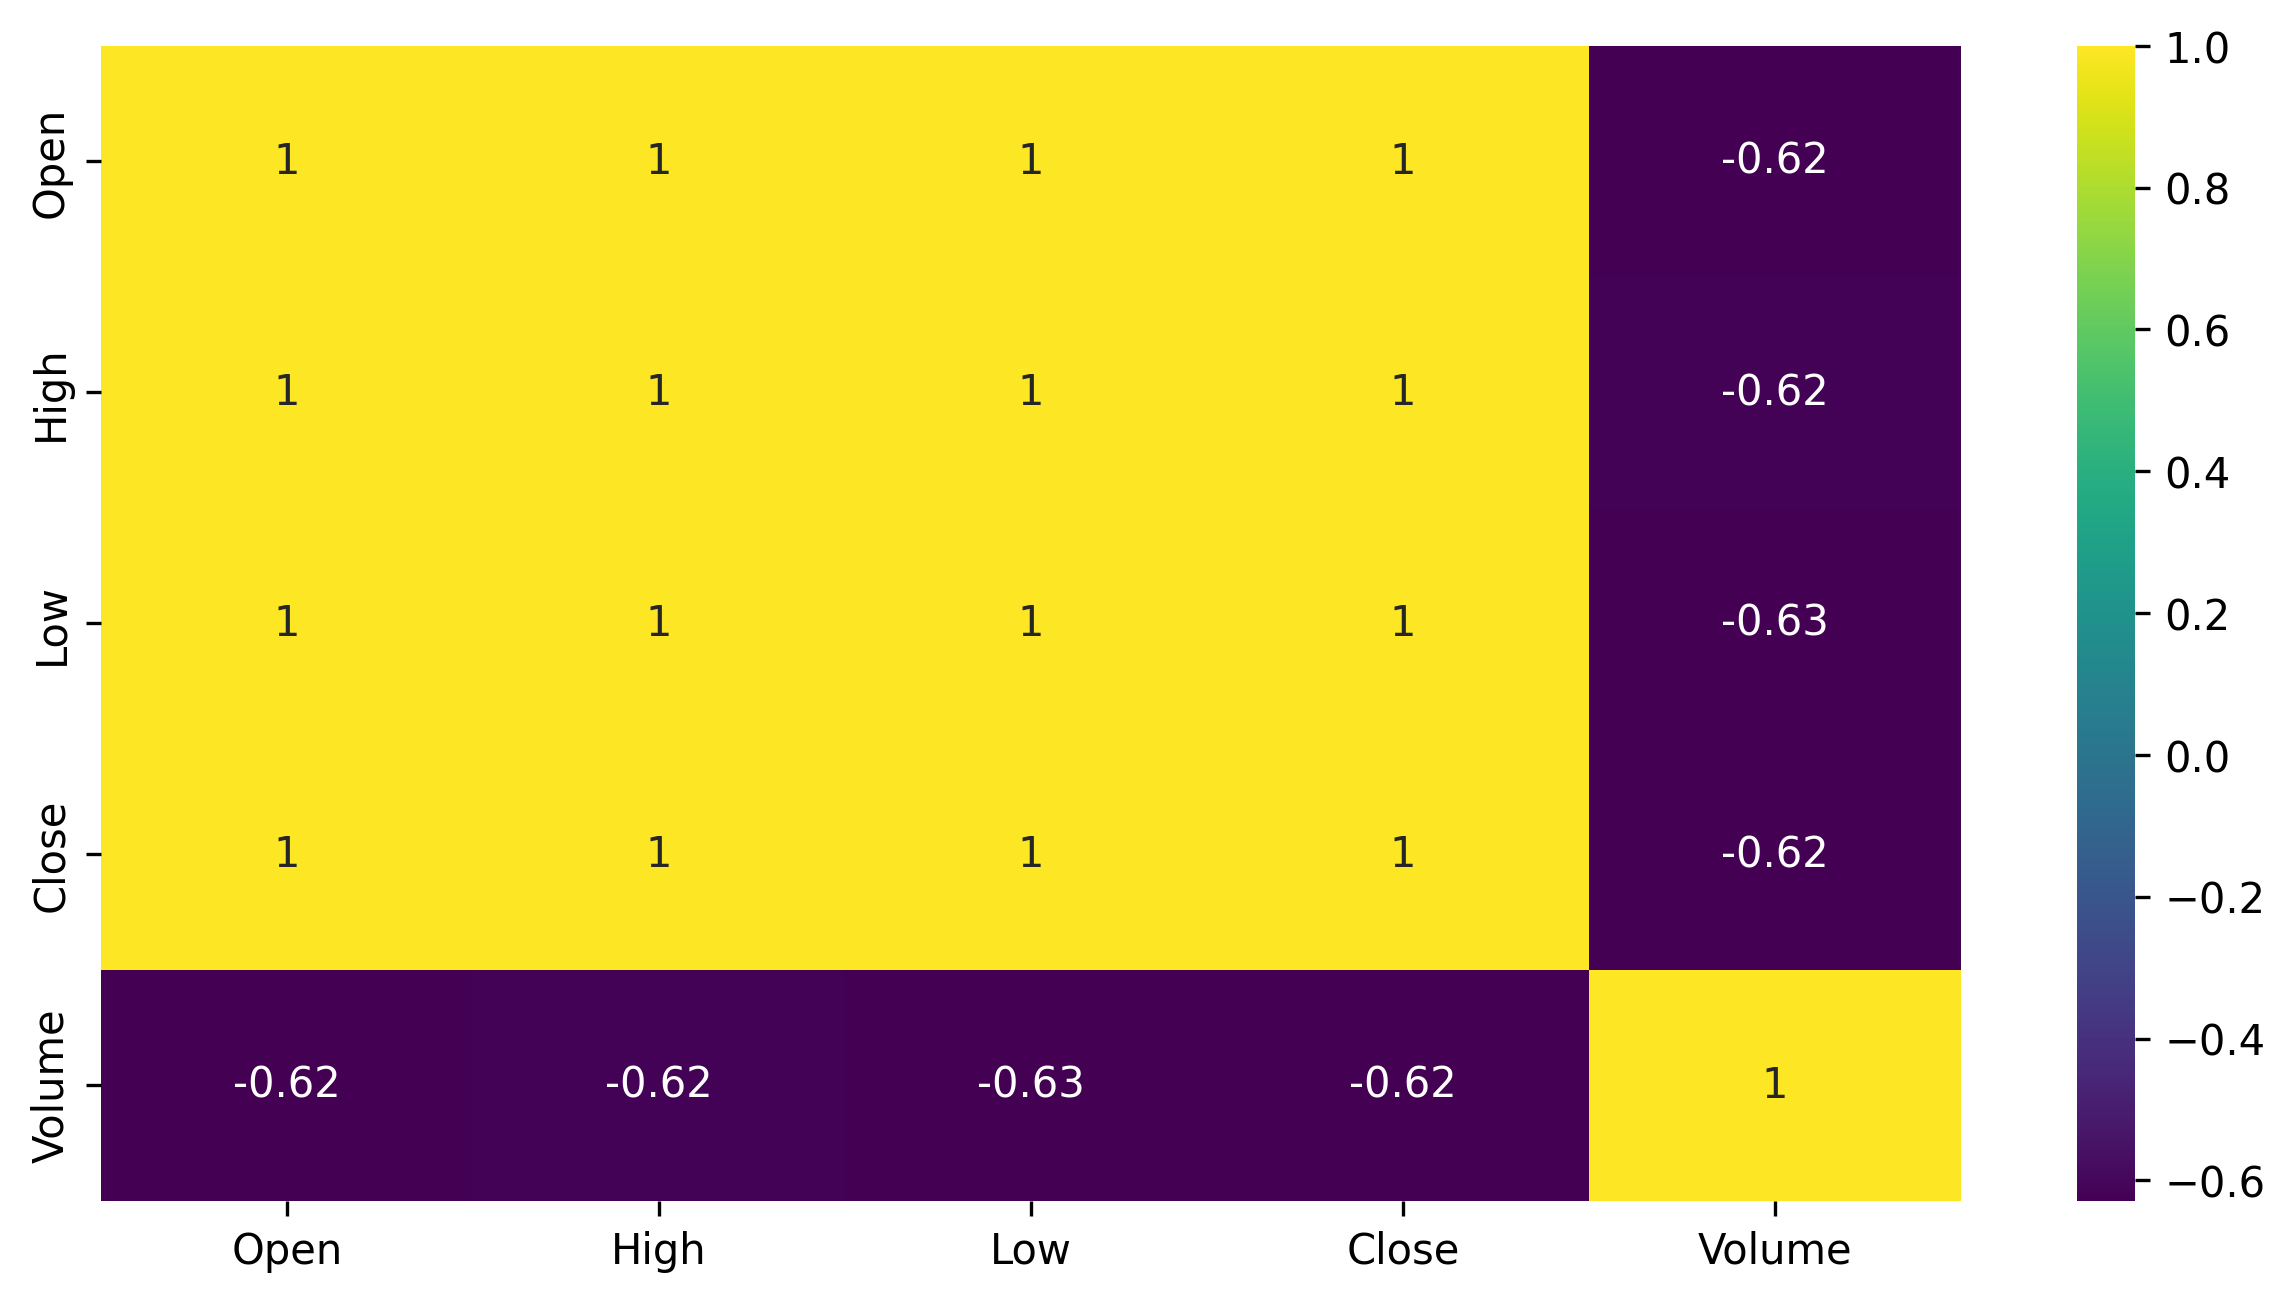

In [150]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="viridis")

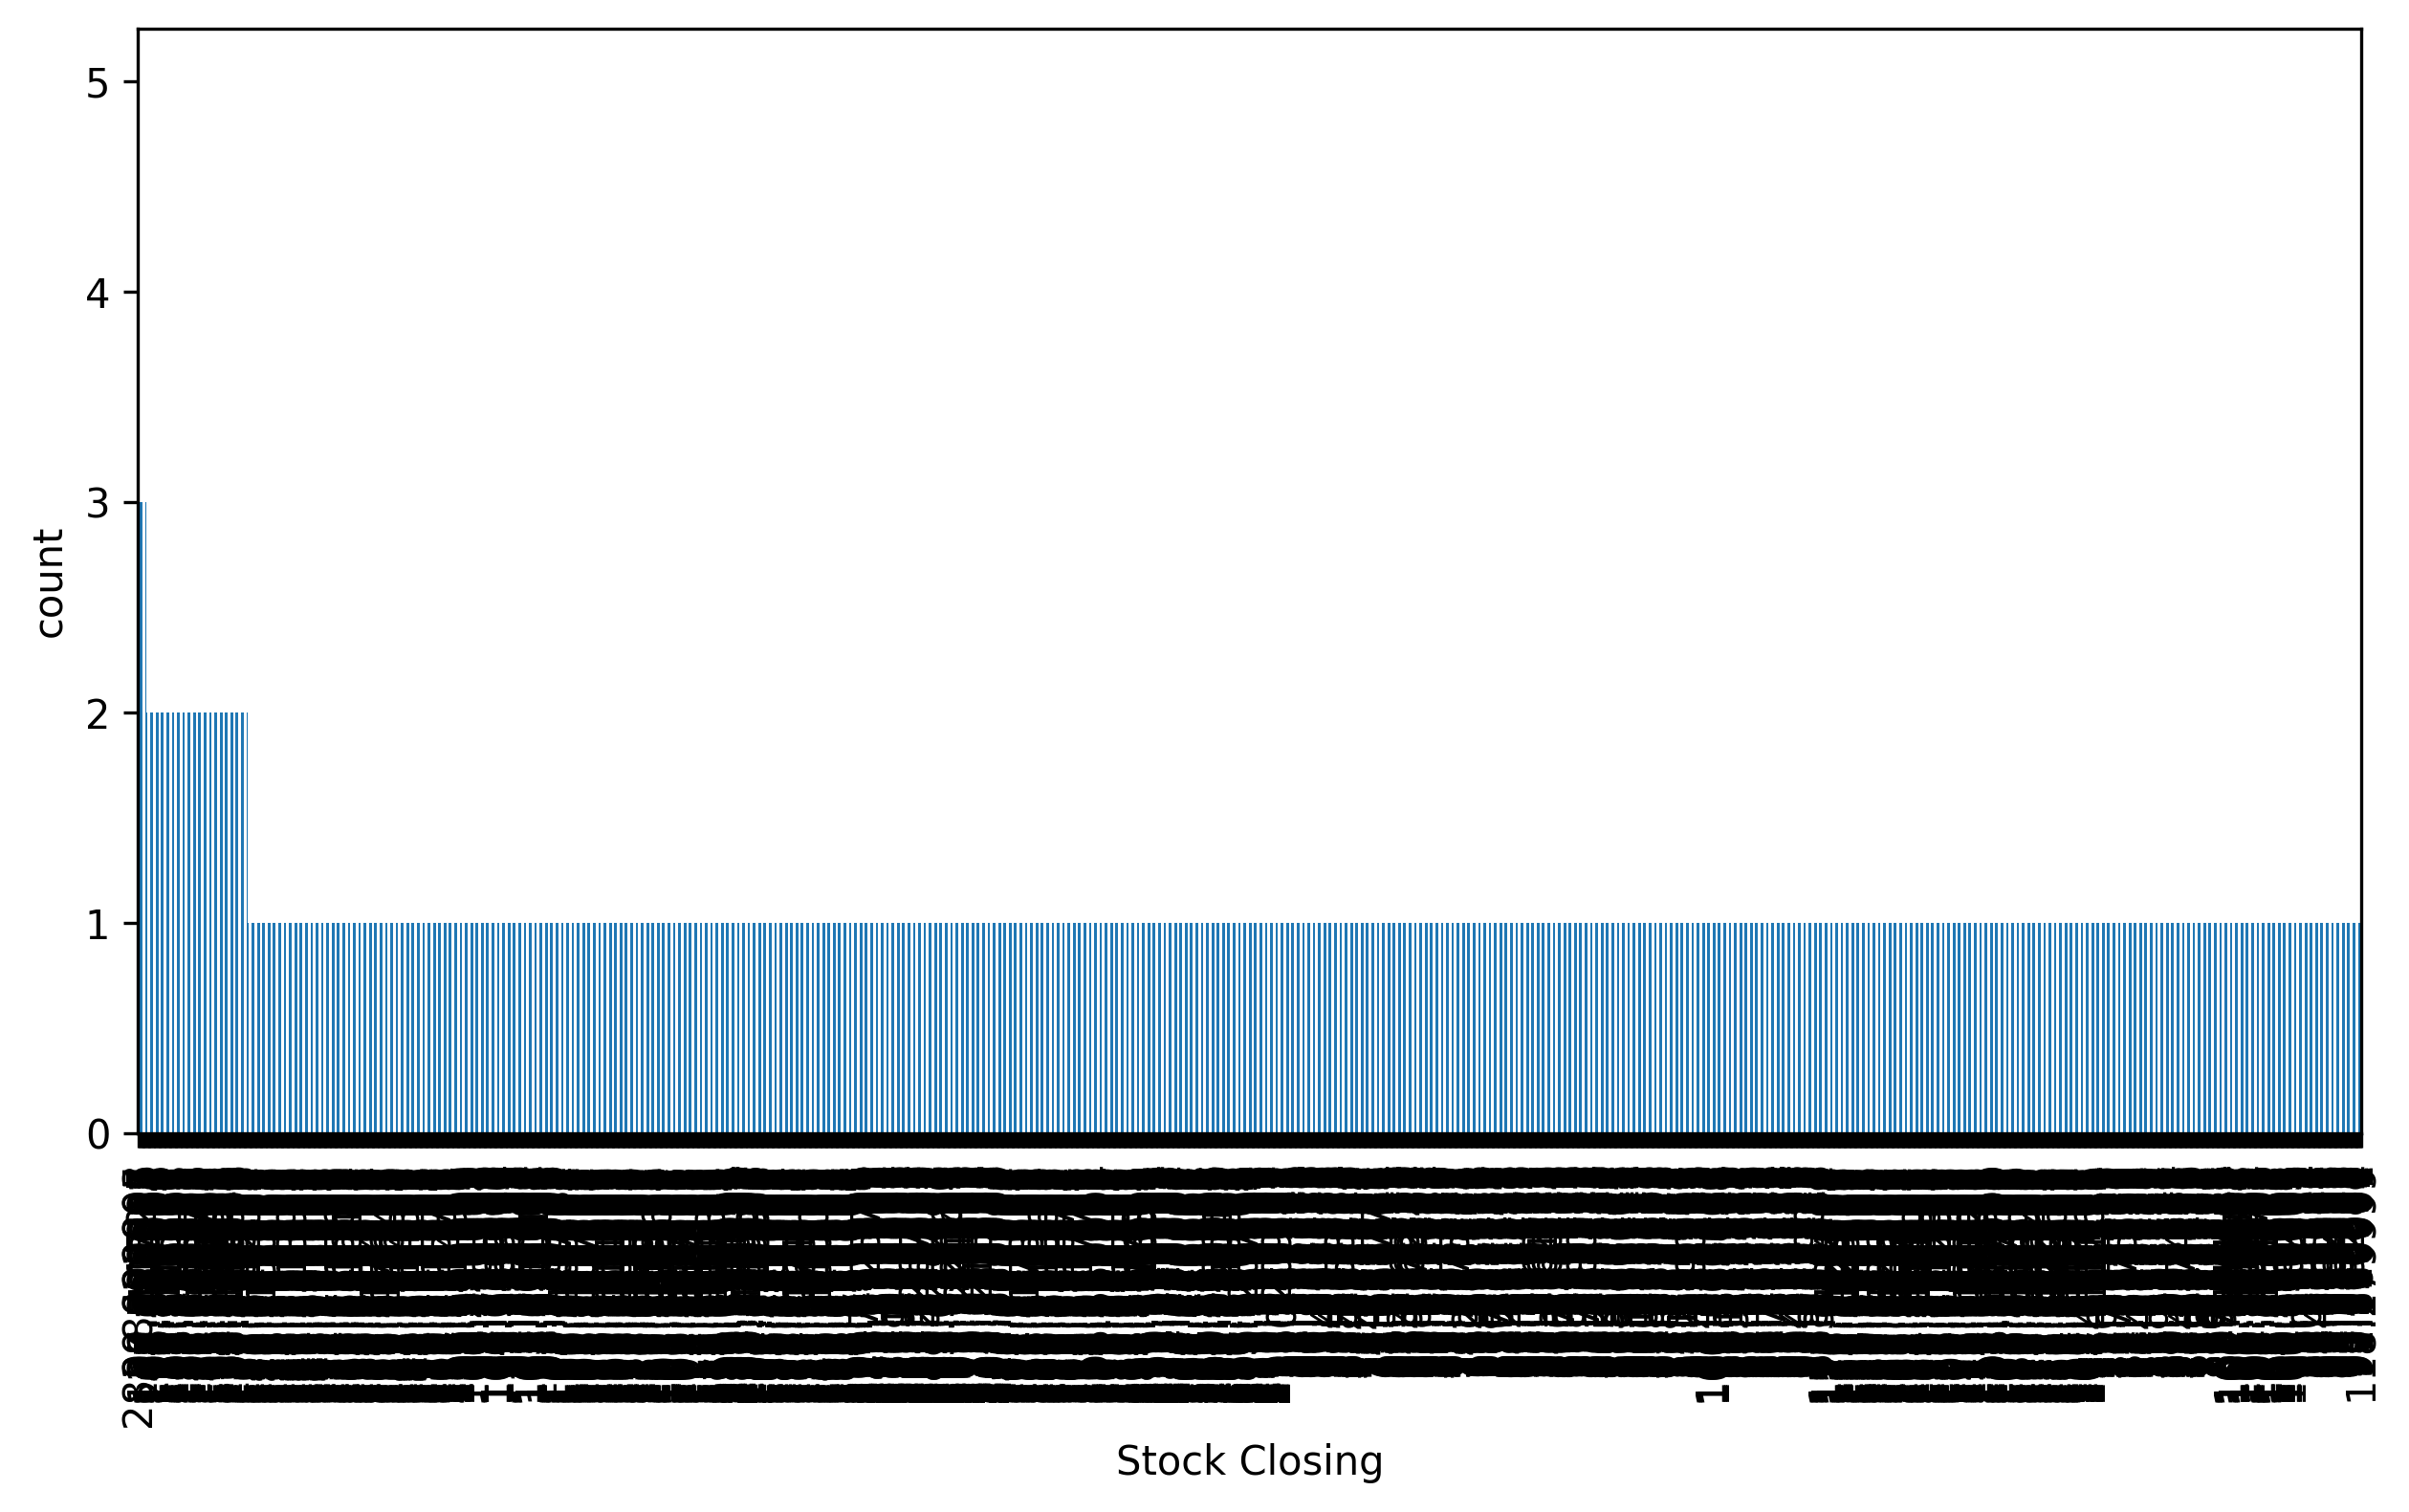

In [151]:
## Visulaization
## Conclusion - it is on imbalanced dataset
df.Close.value_counts().plot(kind="bar")
plt.xlabel("Stock Closing")
plt.ylabel("count")
plt.show()

In [152]:
for columns in df.columns:
    sns.histplot(df[columns], kde=True)

Error in callback <function _draw_all_if_interactive at 0x000002B86075CF70> (for post_execute):


ValueError: Date ordinal -7269805.984999701 converts to -17935-12-12T00:21:36.025856 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -7269805.984999701 converts to -17935-12-12T00:21:36.025856 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 3000x1500 with 1 Axes>

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

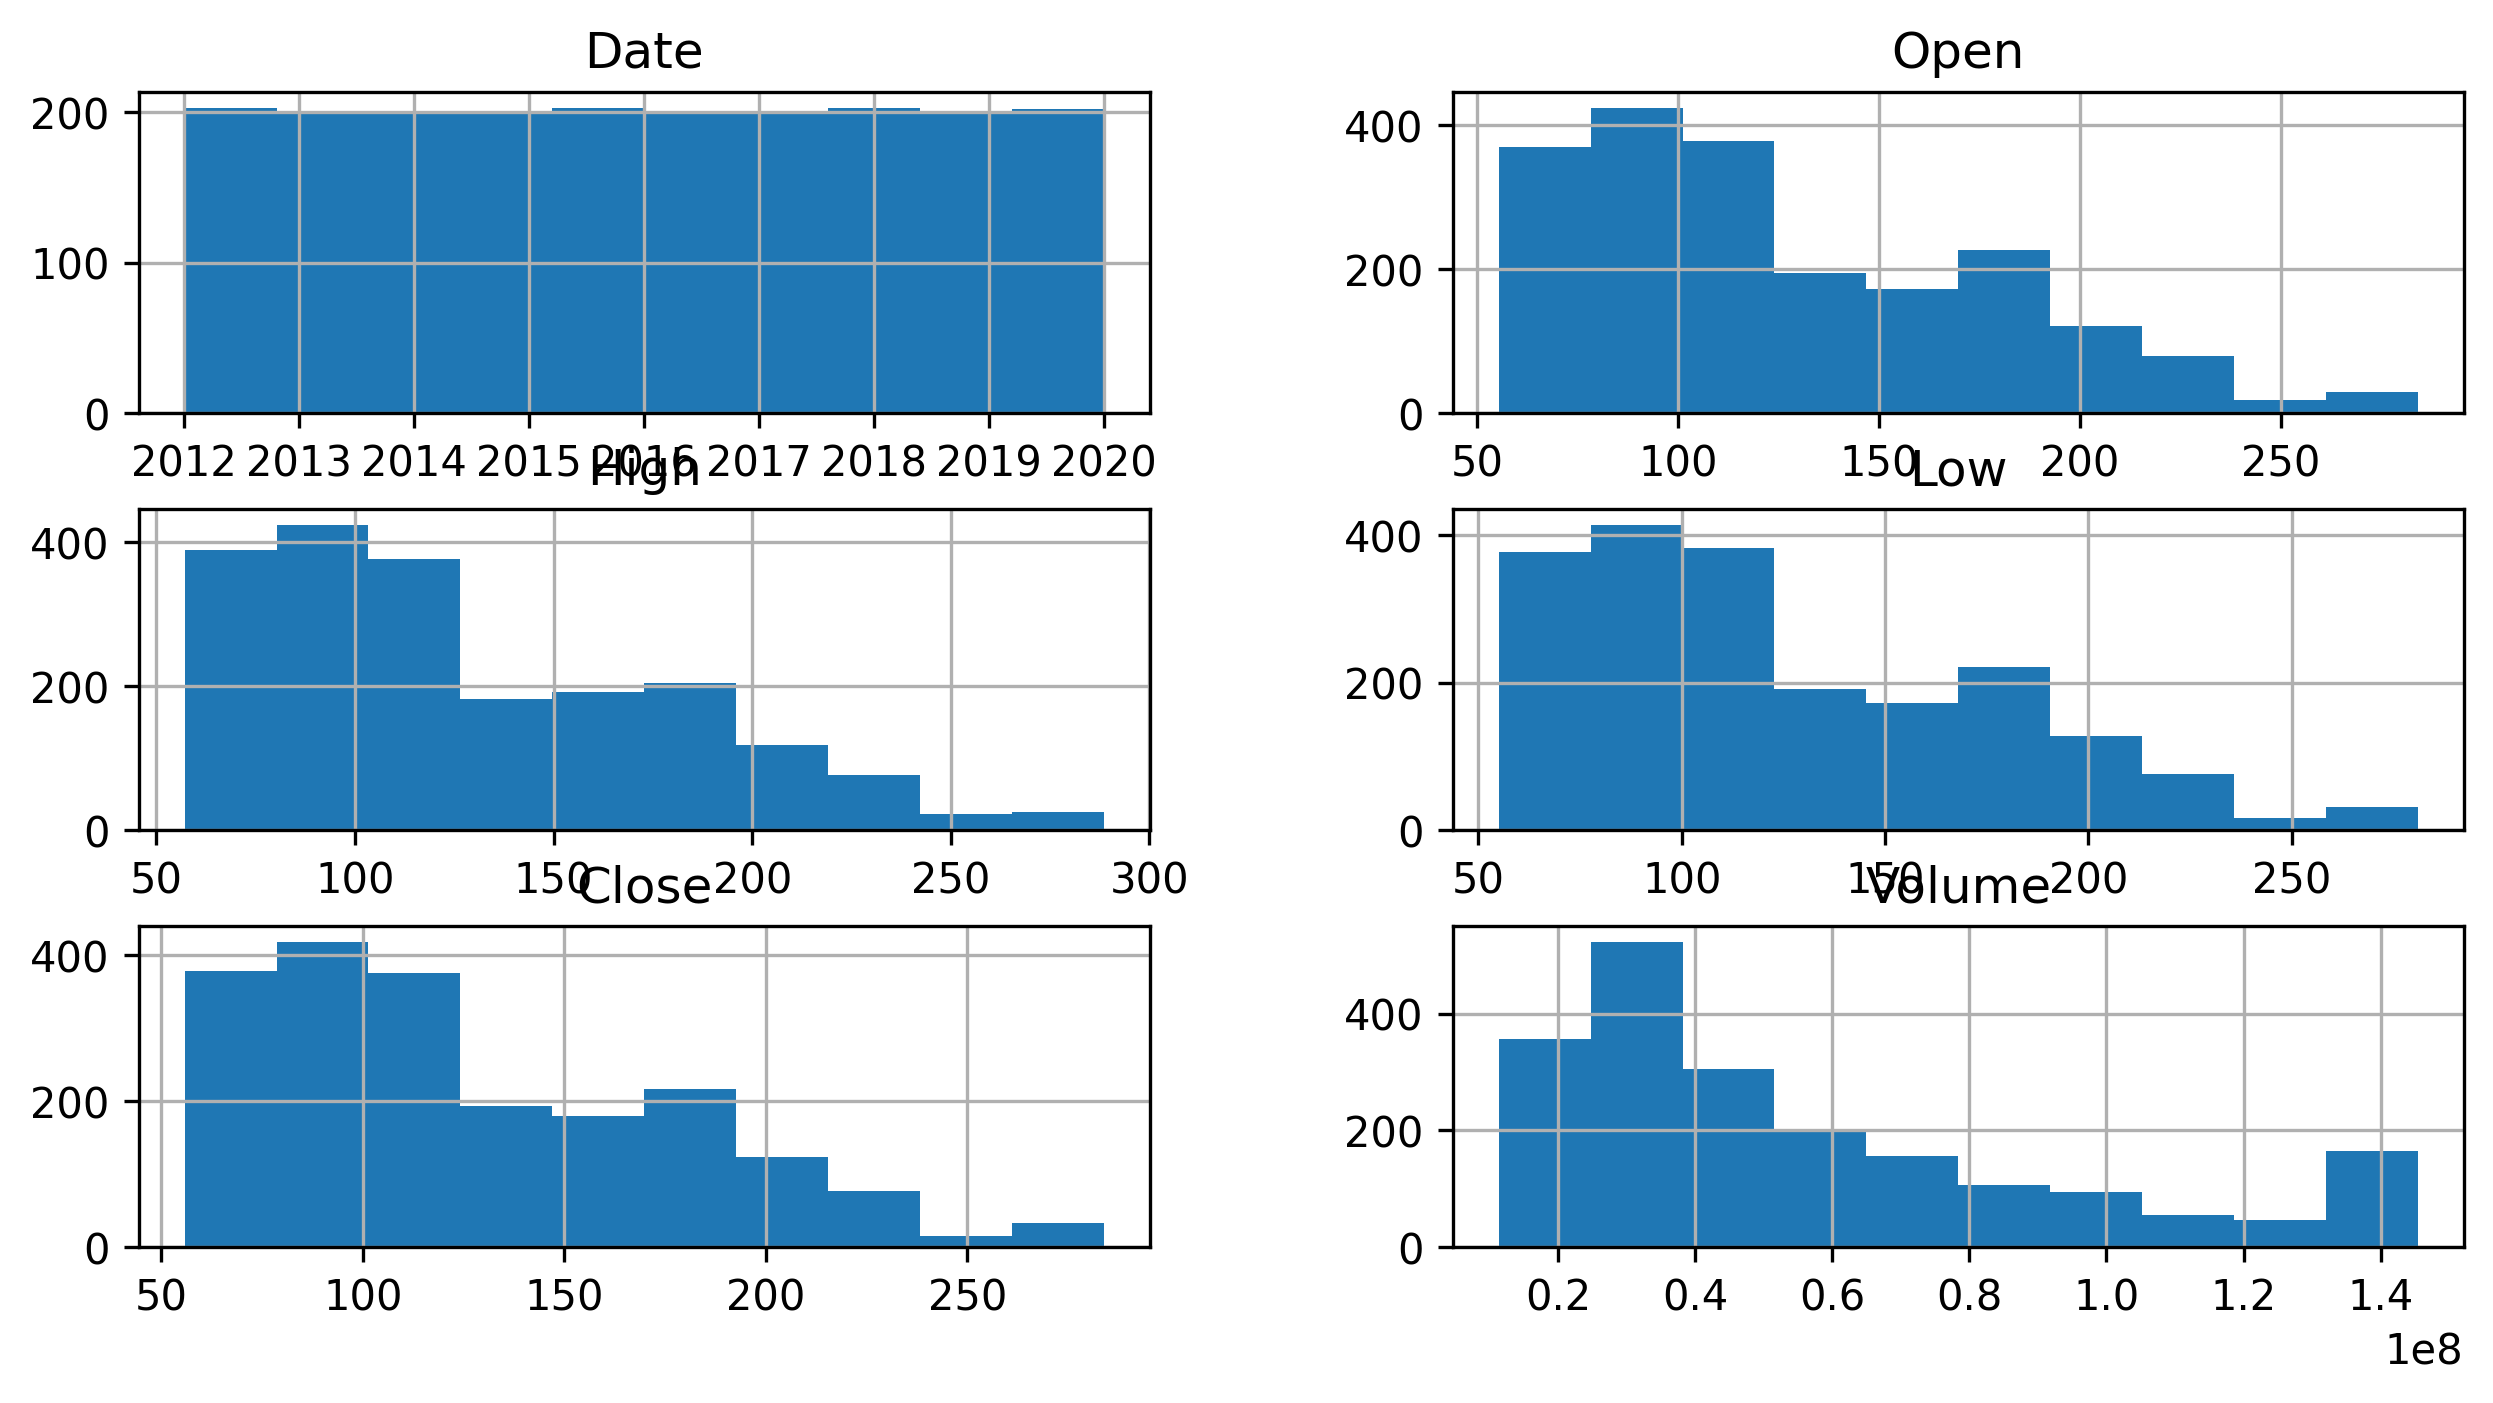

In [153]:
df.hist()

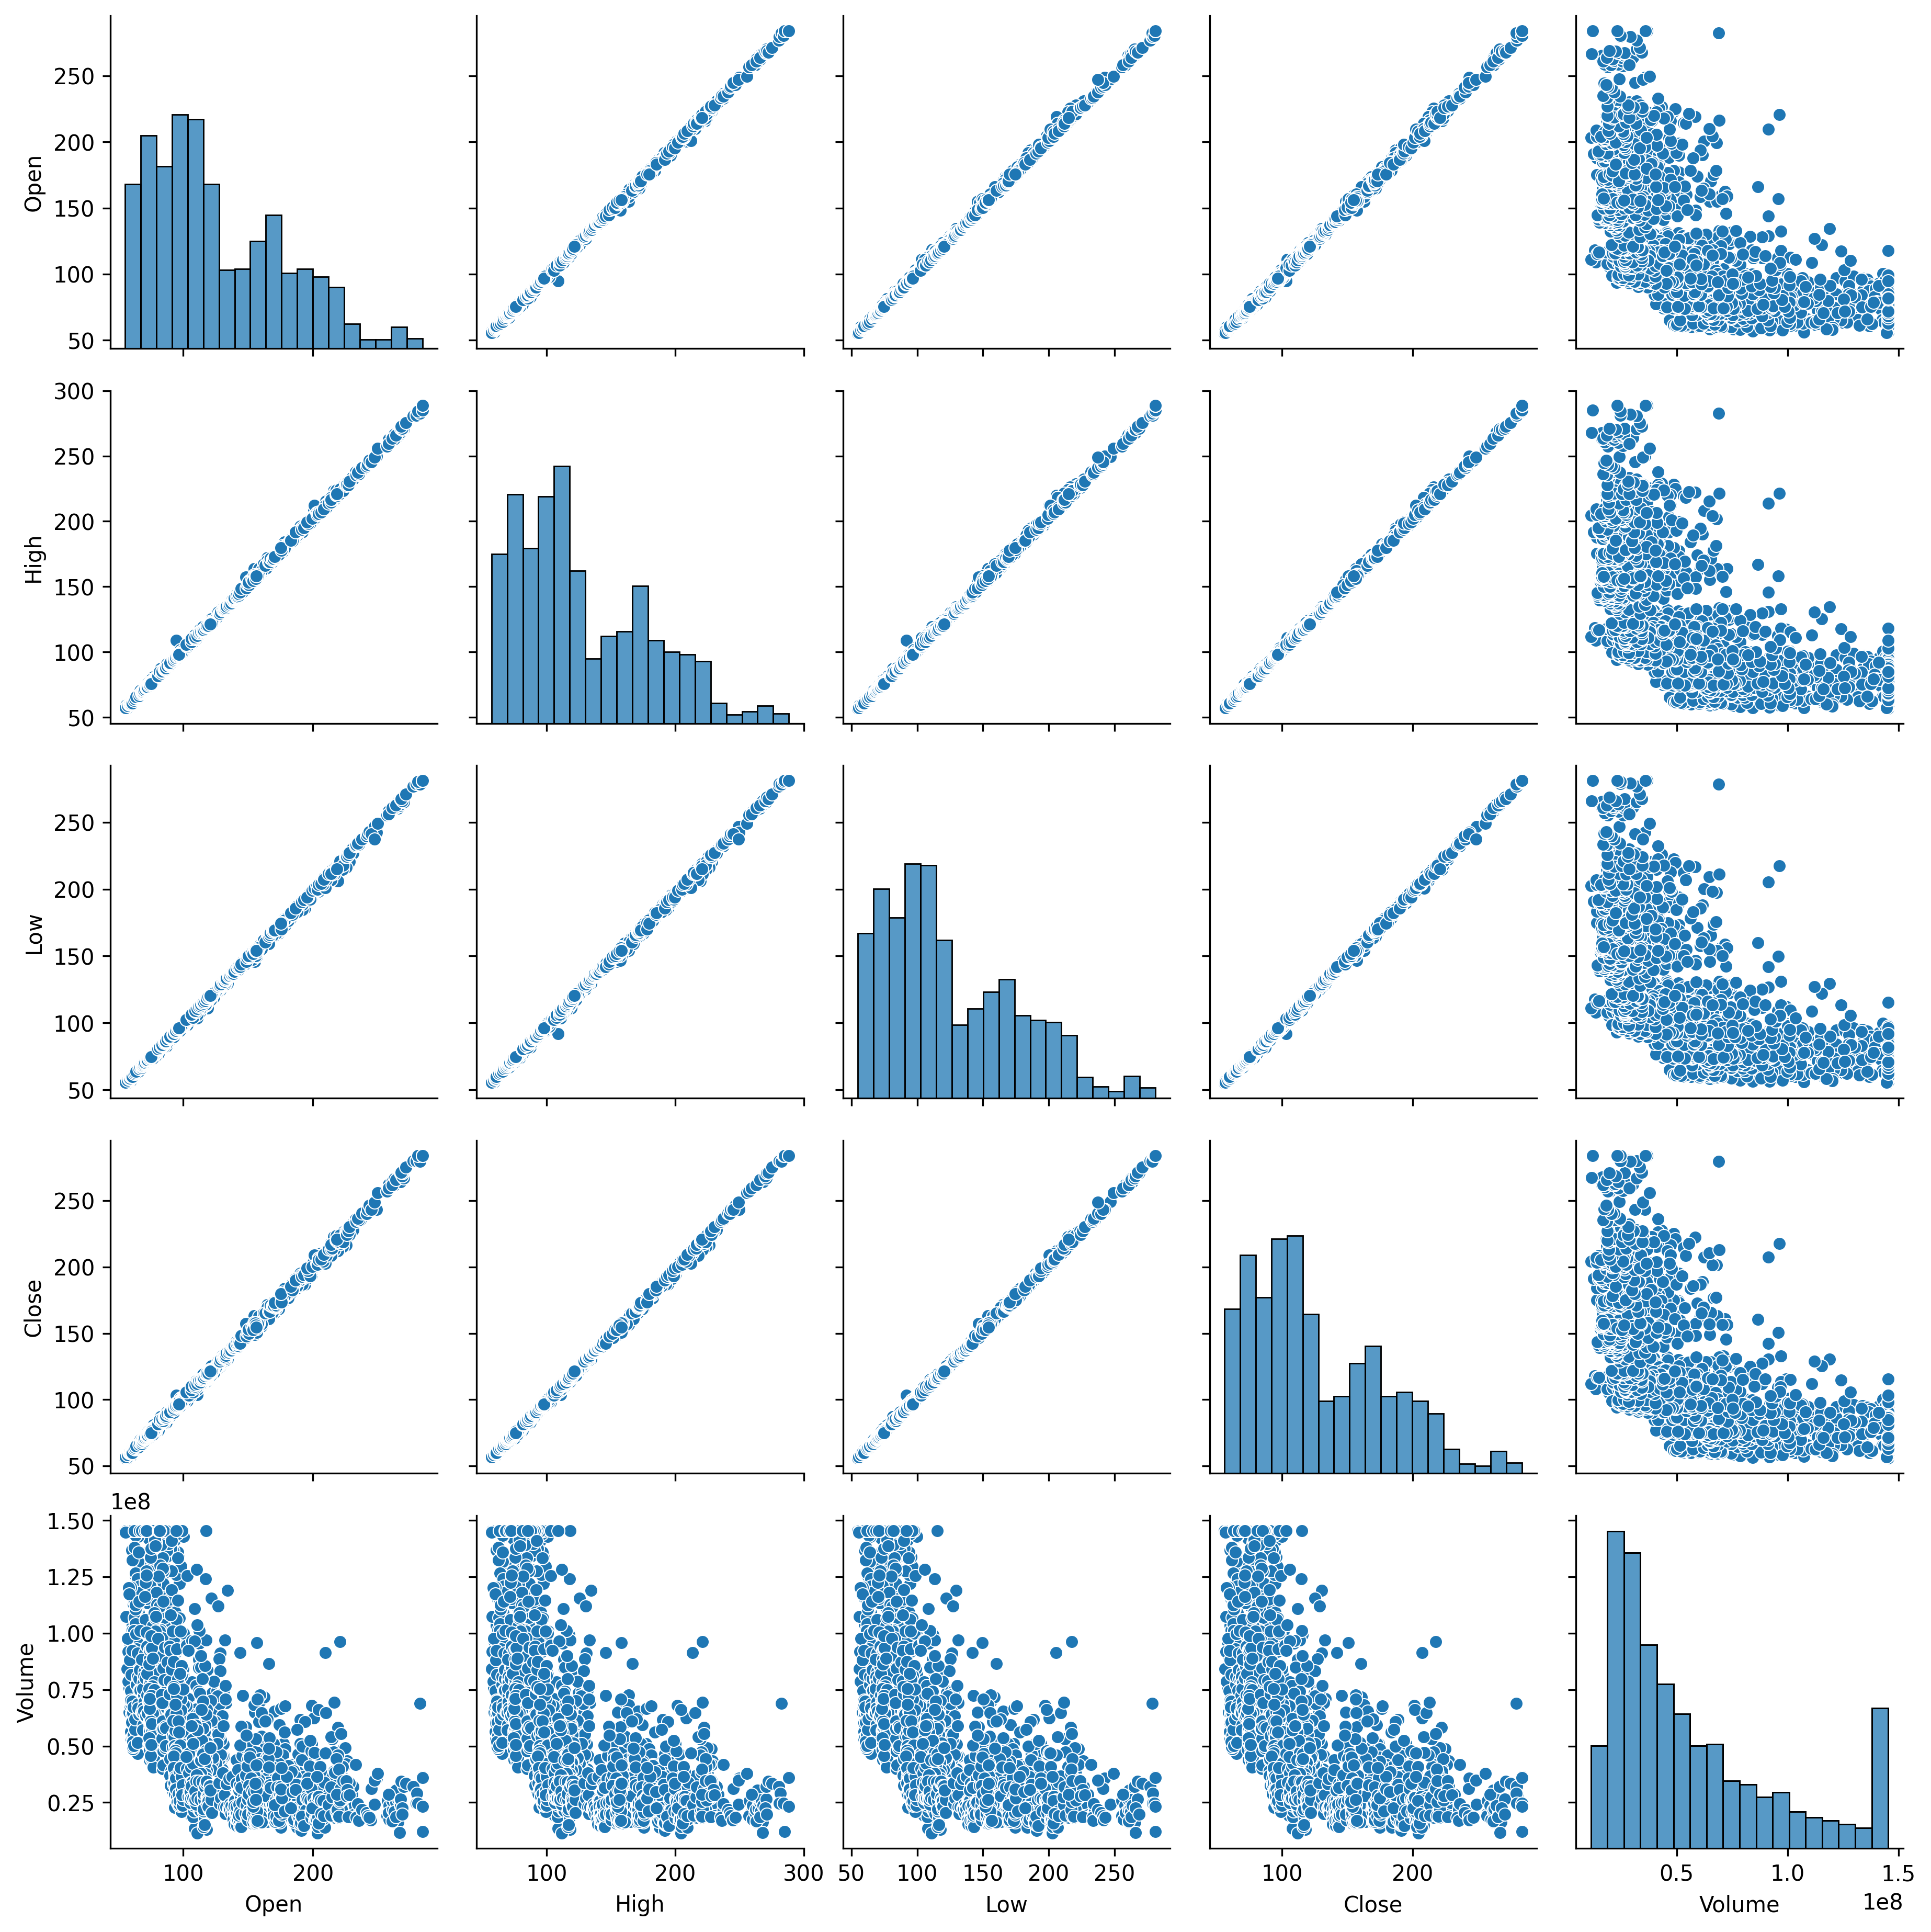

In [154]:
#univariate, bivariate, multivariate analysis
sns.pairplot(df)

<Axes: >

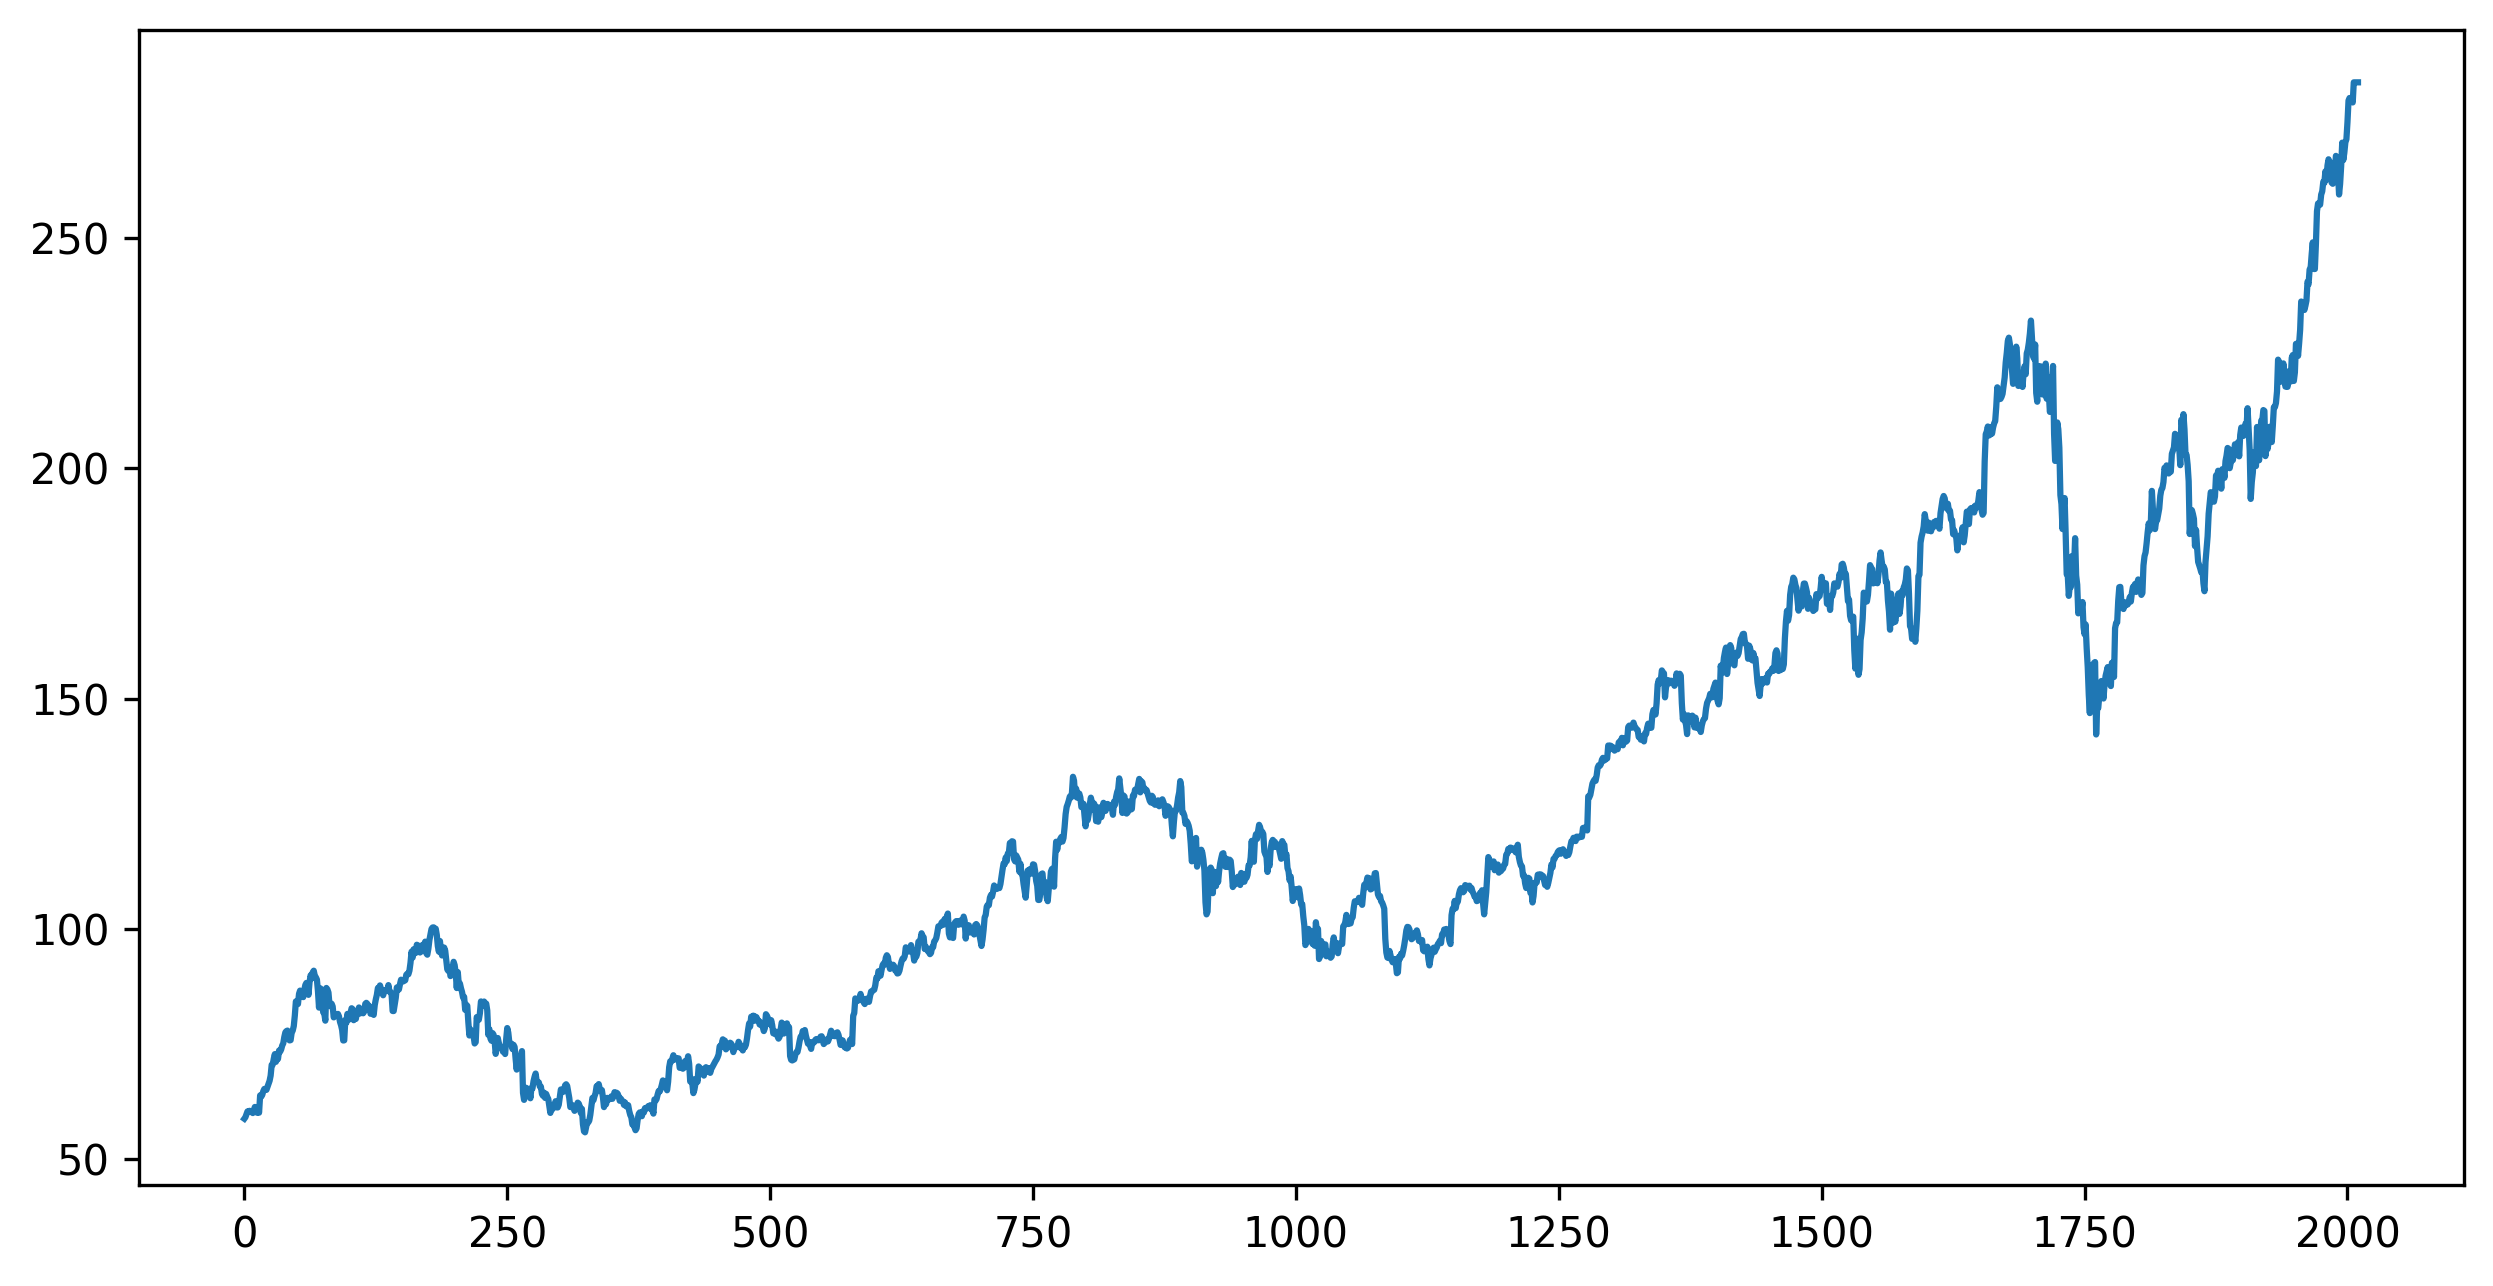

In [155]:
df["Close"].plot()

<Axes: xlabel='Open', ylabel='Close'>

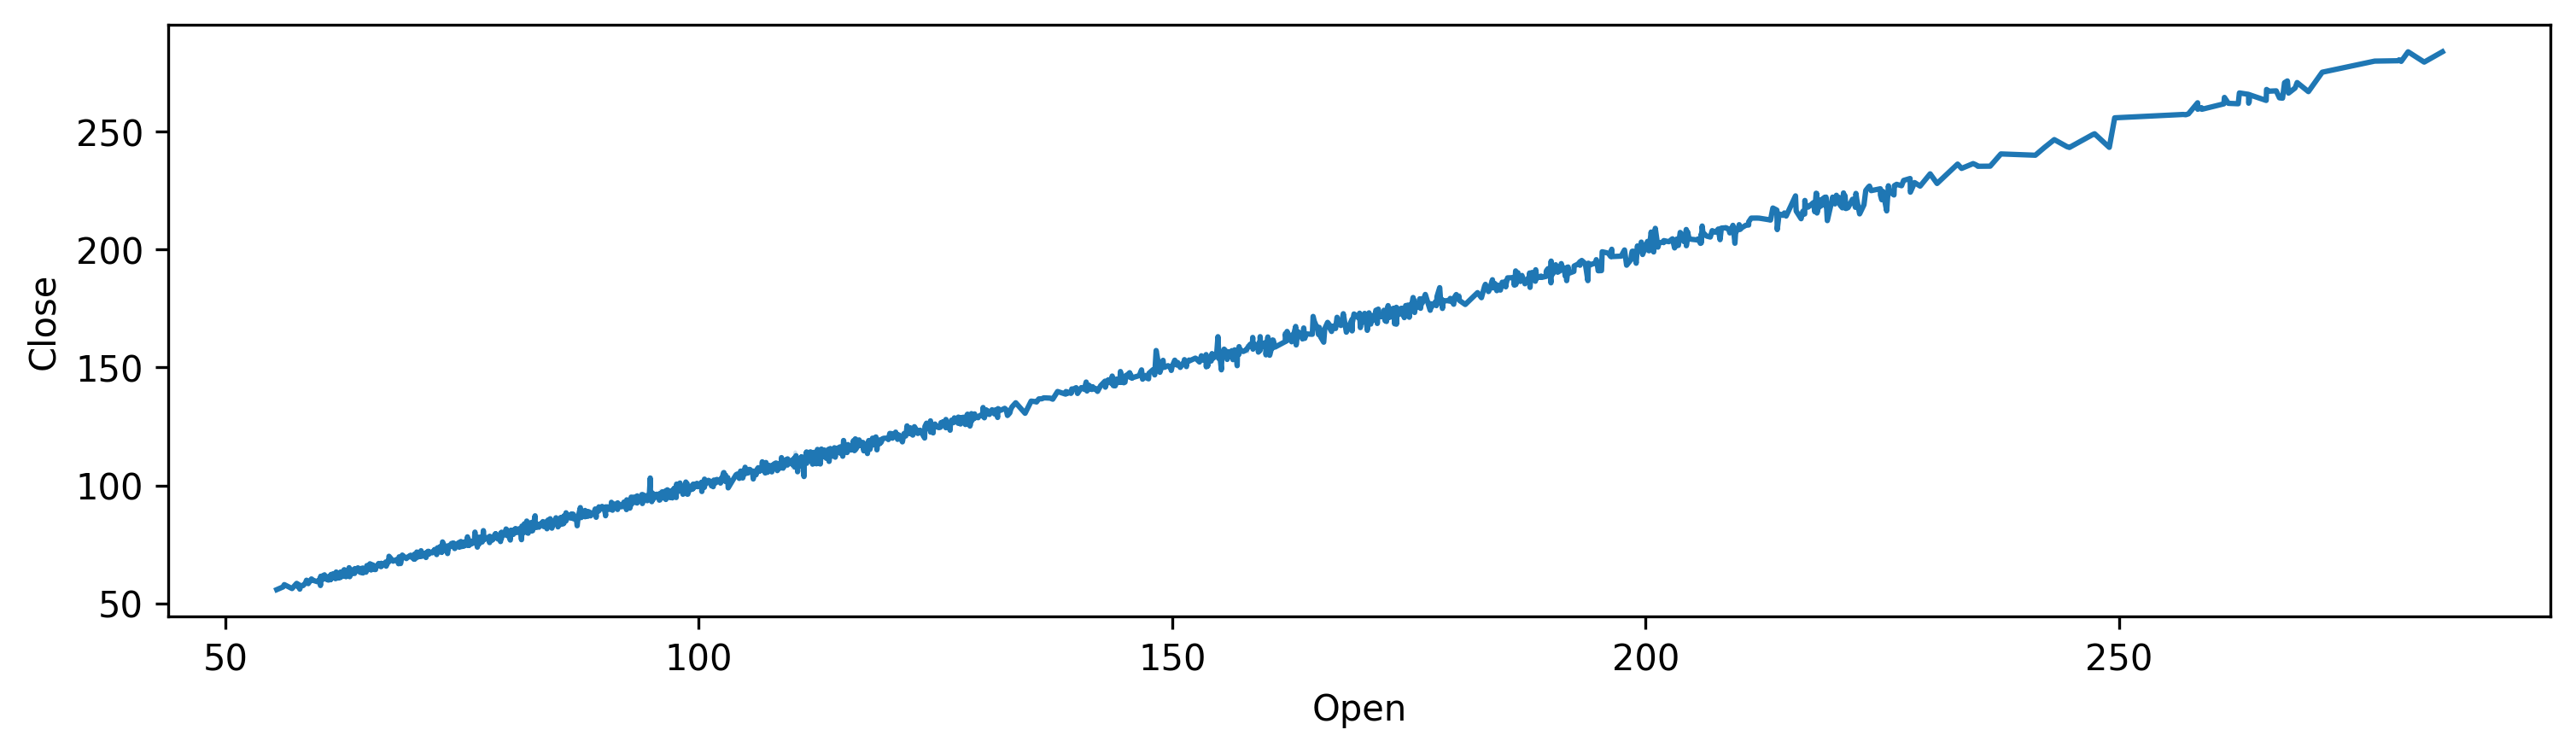

In [156]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Open",y="Close",data=df)

In [157]:
df

Date        Open        High         Low       Close    Volume
0    2012-01-03   58.485714   58.928570   58.428570   58.747143  75555200
1    2012-01-04   58.571430   59.240002   58.468571   59.062859  65005500
2    2012-01-05   59.278572   59.792858   58.952858   59.718571  67817400
3    2012-01-06   59.967144   60.392857   59.888573   60.342857  79573200
4    2012-01-09   60.785713   61.107143   60.192856   60.247143  98506100
...         ...         ...         ...         ...         ...       ...
2006 2019-12-23  280.529999  284.250000  280.369995  283.809289  24643000
2007 2019-12-24  284.150718  284.890015  280.977848  283.809289  12119700
2008 2019-12-26  284.150718  288.448204  280.977848  283.809289  23280300
2009 2019-12-27  284.150718  288.448204  280.977848  283.809289  36566500
2010 2019-12-30  284.150718  288.448204  280.977848  283.809289  36028600

[2011 rows x 6 columns]